### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [135]:
def StringUDF(x) :
    return str(x).split("-")[2]

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [136]:
dfUser = pd.read_csv("user.csv")
dfItem = pd.read_csv("item.csv")
dfData = pd.read_csv("Data (1).csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [137]:
myDf = pd.DataFrame()

In [138]:
myDF = dfUser.copy()
myDF.info()
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

shape
(943, 5)

describe
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

any nulls in these columns?
 user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

isnull
      user id    age  gender  occupation  zip code
0      False  False   False       False     False
1      False  Fals

In [139]:
myDF = dfItem.copy()
print (myDF.info())
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [140]:
myDF = dfData.copy()

myDF.info()
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

shape
(100000, 4)

describe
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

any nulls in 

There are no nulls in the data

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [141]:
# use sum on the default axis
dfItem.iloc[:, 3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [142]:
#hint: use sum on the axis = 1

In [143]:
dfTitles = pd.DataFrame()
dfTitles = dfItem['movie title'].copy()
dfGenres = pd.DataFrame()
dfGenres = dfItem.iloc[:, 3:]

In [144]:
dfGenresSum = pd.DataFrame(dfGenres.sum(axis=1), columns = ['GenreSumForMovie'])

In [145]:
dfTitlesAndGenres = pd.DataFrame()
dfTitlesAndGenres = pd.concat([dfTitles, dfGenresSum], axis=1)
groupedMoreThanOneGenre = dfTitlesAndGenres.groupby(['GenreSumForMovie'])

In [147]:
dfTitlesAndGenres[dfTitlesAndGenres['GenreSumForMovie'] > 1]
# there are 849 movies having > 1 Genre, and number of Genres the movie has.

,movie title,GenreSumForMovie
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [148]:
dfItem[dfItem['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
dfItem.drop(1371, axis=0, inplace = True)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [150]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [151]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [152]:
#your answers here

In [153]:
stringYears = pd.Series(dtype=str)

In [154]:
stringYears = dfItem["release date"].apply(StringUDF)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text major ticklabel objects>)

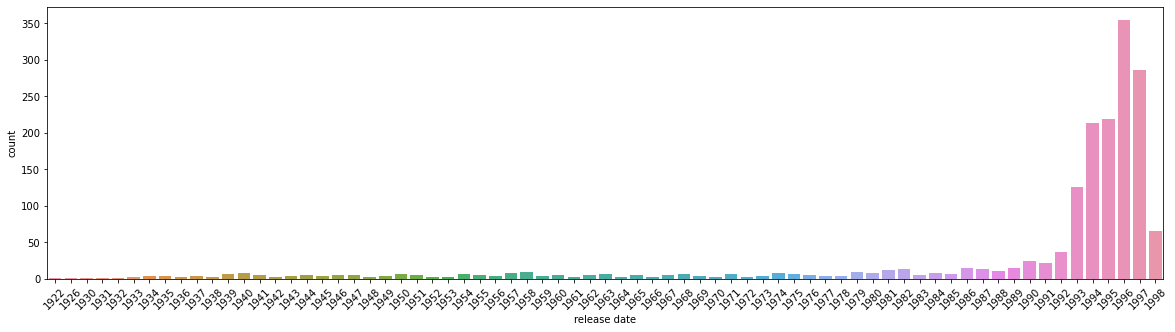

In [155]:
plt.figure(figsize=(20, 5))
sns.countplot(stringYears)
plt.xticks(rotation=45)

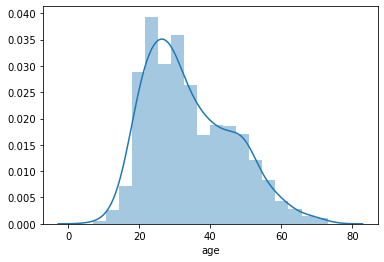

In [156]:
sns.distplot(dfUser["age"])

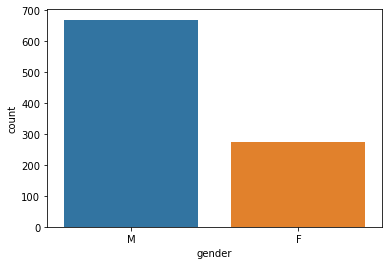

In [157]:
sns.countplot(dfUser['gender'])

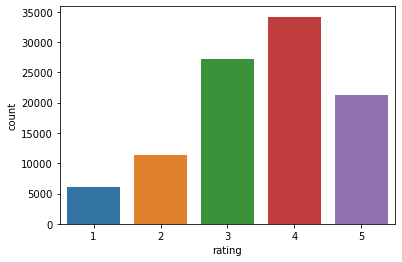

In [158]:
sns.countplot(dfData['rating'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

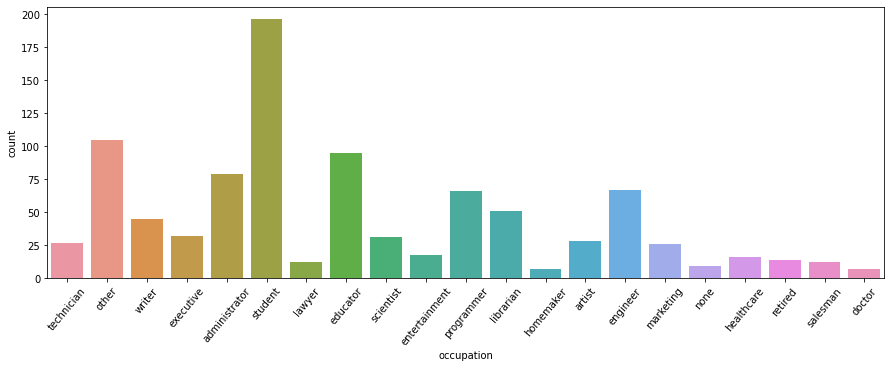

In [159]:
plt.figure(figsize=(15, 5))
sns.countplot(dfUser['occupation'])
plt.xticks(rotation=50)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [160]:
#Your answer here

In [161]:
# create a new df by adding the column stringYears to dfItem.
# then group by stringYears.
# sum each genre for each stringYear.

In [162]:
dfNoReleaseDate = pd.DataFrame()
dfNoReleaseDate = dfItem.drop(columns = 'release date', axis=1)

In [163]:
dfPopularity = pd.DataFrame()

In [164]:
dfPopularity = pd.concat([stringYears, dfNoReleaseDate], axis = 1)

In [165]:
listGenres = dfPopularity.columns
listGenres[4:]

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [166]:
dfPopularity.groupby("release date")[listGenres[4:]].sum()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


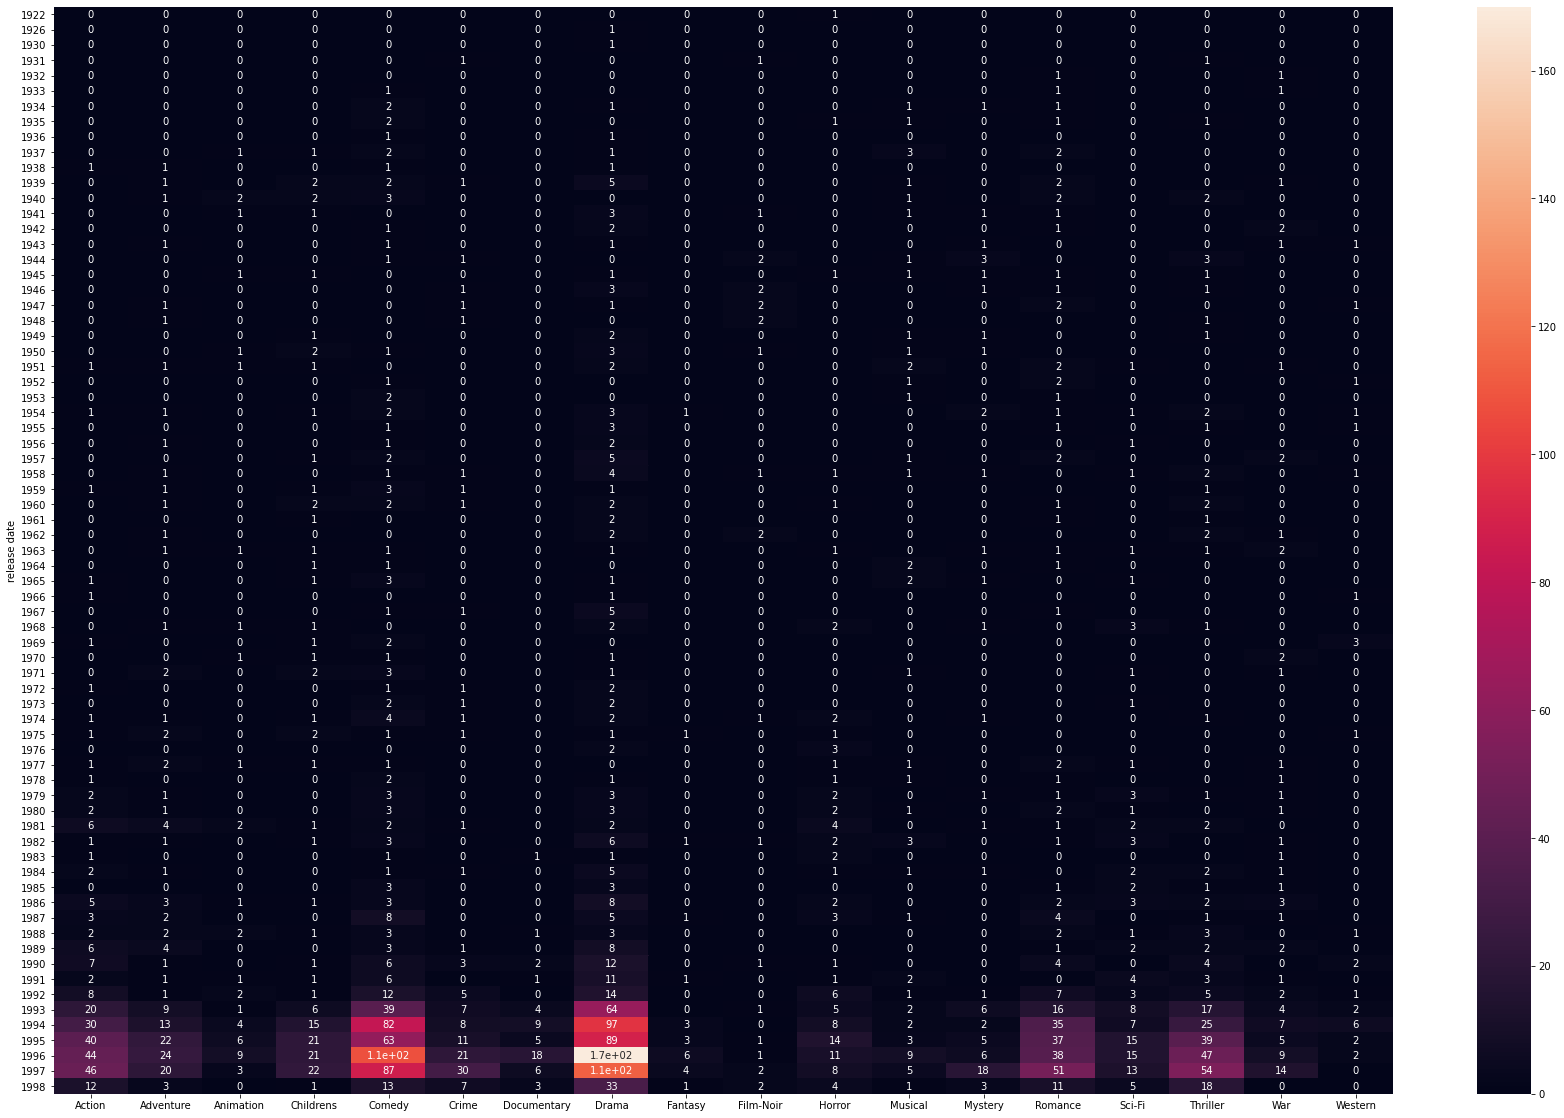

In [167]:
plt.figure(figsize=(30, 20))
sns.heatmap(dfPopularity.groupby("release date")[listGenres[4:]].sum(), annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [168]:
dfDataRatingCountAndSum = pd.DataFrame(columns=['RatingCount', 'RatingSum'])
dfDataRatingCountAndSum = pd.concat([dfData.groupby('movie id')['rating'].count(), dfData.groupby('movie id')['rating'].sum()], axis=1)

In [169]:
dfRatingCount = pd.DataFrame( dfData.groupby('movie id')['rating'].count())
dfRatingSum = pd.DataFrame( dfData.groupby('movie id')['rating'].sum() )
dfRatingSum.rename(columns = {'rating' : 'Rating Sum'}, inplace = True)
dfRatingCount.rename(columns = {'rating' : 'Rating Count'}, inplace = True)

print(dfRatingCount.head())
dfRatingSum.head()

          Rating Count
movie id              
1                  452
2                  131
3                   90
4                  209
5                   86


,Rating Sum
movie id,
1,1753
2,420
3,273
4,742
5,284


In [170]:
dfRatingAverage = pd.concat([dfRatingCount, dfRatingSum], axis = 1)
dfRatingAverage['Average Rating'] = 0
for j in range(len(dfRatingAverage)) :
    dfRatingAverage.iloc[j, 2] = dfRatingAverage.iloc[j, 1] / dfRatingAverage.iloc[j, 0]
dfRatingAverage.head()

,Rating Count,Rating Sum,Average Rating
movie id,,,
1,452,1753,3.878319
2,131,420,3.206107
3,90,273,3.033333
4,209,742,3.550239
5,86,284,3.302326


In [171]:
(dfRatingAverage['Rating Count'] > 100).sum()

334

In [172]:
dfRatingAverage.sort_values([ 'Rating Count'], axis = 0, ascending=False, inplace = True)

In [173]:
dfRatingAverage[dfRatingAverage['Rating Count'] > 100 ]

,Rating Count,Rating Sum,Average Rating
movie id,,,
50,583,2541,4.358491
258,509,1936,3.803536
100,508,2111,4.155512
181,507,2032,4.007890
294,485,1531,3.156701
...,...,...,...
378,101,376,3.722772
404,101,371,3.673267
708,101,351,3.475248


In [174]:
dfRatingAverage[dfRatingAverage['Rating Count'] > 100 ].sort_values([ 'Average Rating'], axis = 0, ascending=False).head(25)
# need to use the isin function, and merge function.

,Rating Count,Rating Sum,Average Rating
movie id,,,
408,112,503,4.491071
318,298,1331,4.466443
169,118,527,4.466102
483,243,1083,4.456790
64,283,1258,4.445230
603,209,917,4.387560
12,267,1171,4.385768
50,583,2541,4.358491
178,125,543,4.344000


In [175]:
#your answer here

print ("The top 25 Movie IDs, ranked by ratings, for movies with more than 100 ratings are:\n")
print ( list (dfRatingAverage[dfRatingAverage['Rating Count'] > 100 ].sort_values([ 'Average Rating'], axis = 0, ascending=False).head(25).index ) )

The top 25 Movie IDs, ranked by ratings, for movies with more than 100 ratings are:

[408, 318, 169, 483, 64, 603, 12, 50, 178, 134, 427, 357, 98, 480, 127, 285, 272, 657, 474, 174, 479, 313, 511, 484, 172]


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [189]:
dfWhoRatedWhat3 = pd.DataFrame(columns = ['sex', 'drama', 'sci fi', 'romance'])
dfWhoRatedWhat = pd.concat([dfData[['user id', 'movie id']], dfWhoRatedWhat3], axis = 1)
#myIndex = dfWhoRatedWhat[dfWhoRatedWhat['movie id'] == 267 ].index
#dfWhoRatedWhat.drop(labels = myIndex, axis = 0, inplace=True)

In [231]:
# Get user id, ratings, and gender in a dataframe:
# (there is no movie id = 267 in dfItem)
for k in range(len(dfWhoRatedWhat) ) :
    userID = dfWhoRatedWhat.iloc[k, 0]
    userGender = dfUser.iloc[(userID - 1), 2]
    dfWhoRatedWhat.iloc[k, 2] = userGender
    movieID = dfWhoRatedWhat.iloc[k, 1]  
    if not dfItem[dfItem['movie id'] == movieID]['movie id'].empty :
        isDrama = int ( dfItem[dfItem['movie id'] == movieID]['Drama'])
        isSciFi = int ( dfItem[dfItem['movie id'] == movieID]['Sci-Fi'])
        isRomance = int ( dfItem[dfItem['movie id'] == movieID]['Romance'])
        dfWhoRatedWhat.iloc[k, 3] = isDrama
        dfWhoRatedWhat.iloc[k, 4] = isSciFi
        dfWhoRatedWhat.iloc[k, 5] = isRomance
dfWhoRatedWhat

0  k  242 0 0 0
1  k  302 0 0 0
2  k  377 0 0 0
3  k  51 1 0 1
4  k  346 1 0 0
5  k  474 0 1 0
6  k  265 0 0 0
7  k  465 0 0 1
8  k  451 0 0 1
9  k  86 1 0 0
10  k  257 0 1 0
11  k  1014 0 0 0
12  k  222 0 1 0
13  k  40 0 0 0
14  k  29 0 0 0
15  k  785 0 0 1
16  k  387 1 0 0
17  k  274 0 0 1
18  k  1042 0 0 0
19  k  1184 0 0 0
20  k  392 1 0 0
21  k  486 0 0 1
22  k  144 0 0 0
23  k  118 0 0 0
24  k  1 0 0 0
25  k  546 0 0 0
26  k  95 0 0 0
27  k  768 0 0 0
28  k  277 1 0 0
29  k  234 0 0 0
30  k  246 1 0 1
31  k  98 1 0 0
32  k  193 1 0 0
33  k  88 0 0 1
34  k  194 0 0 0
35  k  274 0 0 1
36  k  1081 0 0 0
37  k  603 0 0 0
38  k  796 0 0 1
39  k  32 0 0 0
40  k  16 0 0 1
41  k  304 0 0 0
42  k  979 1 0 0
43  k  564 0 0 0
44  k  327 1 0 0
45  k  201 0 0 0
46  k  1137 1 0 1
47  k  241 0 0 1
48  k  4 1 0 0
49  k  332 1 0 0
50  k  100 1 0 0
51  k  432 0 0 0
52  k  322 0 0 0
53  k  181 0 1 1
54  k  196 1 0 0
55  k  679 0 0 0
56  k  384 0 0 0
57  k  143 0 0 0
58  k  423 1 1 0
59  k  515 1 0 

478  k  20 1 0 1
479  k  404 0 0 0
480  k  305 1 0 0
481  k  210 0 0 0
482  k  278 1 0 1
483  k  568 0 0 1
484  k  770 0 0 0
485  k  191 1 0 0
486  k  252 0 1 0
487  k  156 0 0 0
488  k  1110 0 1 0
489  k  1067 0 0 0
490  k  430 0 0 0
491  k  350 0 0 0
492  k  480 0 0 0
493  k  246 1 0 1
494  k  419 0 0 0
495  k  431 0 0 0
496  k  475 1 0 0
497  k  182 1 0 0
498  k  357 1 0 0
499  k  50 0 1 1
500  k  526 1 0 0
501  k  303 1 0 0
502  k  294 0 0 0
503  k  365 1 0 0
504  k  135 1 1 0
505  k  187 1 0 0
506  k  289 1 0 0
507  k  229 0 1 0
508  k  486 0 0 1
509  k  185 0 0 1
510  k  712 1 0 0
511  k  94 0 0 0
512  k  742 1 0 0
513  k  762 1 0 0
514  k  732 0 0 1
515  k  168 0 0 0
516  k  550 0 0 0
517  k  174 0 0 0
518  k  200 0 0 0
519  k  849 0 0 1
520  k  54 1 0 0
521  k  406 0 0 0
522  k  150 1 0 0
523  k  77 1 0 0
524  k  869 0 0 1
525  k  184 0 1 0
526  k  338 0 0 0
527  k  109 0 1 0
528  k  371 1 0 1
529  k  720 1 0 1
530  k  845 0 0 0
531  k  873 0 0 1
532  k  229 0 1 0
533  k  381 0

938  k  56 1 0 0
939  k  318 1 0 0
940  k  393 0 0 0
941  k  91 0 0 0
942  k  477 0 0 0
943  k  472 0 0 0
944  k  761 0 0 0
945  k  56 1 0 0
946  k  741 1 0 0
947  k  1286 0 0 1
948  k  8 1 0 0
949  k  202 0 0 1
950  k  93 1 0 0
951  k  56 1 0 0
952  k  305 1 0 0
953  k  742 1 0 0
954  k  644 0 0 0
955  k  13 0 0 0
956  k  117 0 0 0
957  k  1 0 0 0
958  k  347 1 0 0
959  k  164 0 1 0
960  k  982 0 0 0
961  k  491 0 0 0
962  k  287 1 0 0
963  k  89 0 1 0
964  k  68 0 0 1
965  k  250 0 1 0
966  k  206 0 1 0
967  k  756 0 0 0
968  k  216 0 0 1
969  k  194 0 0 0
970  k  511 0 0 0
971  k  1 0 0 0
972  k  117 0 0 0
973  k  583 0 0 0
974  k  397 0 0 0
975  k  162 1 0 0
976  k  258 1 1 0
977  k  513 0 0 0
978  k  69 0 0 1
979  k  375 1 0 0
980  k  642 1 0 0
981  k  38 0 1 0
982  k  522 1 0 0
983  k  873 0 0 1
984  k  418 0 0 0
985  k  518 1 0 0
986  k  858 0 0 0
987  k  131 1 0 1
988  k  228 0 1 0
989  k  87 1 0 0
990  k  725 0 0 0
991  k  182 1 0 0
992  k  433 0 0 0
993  k  234 0 0 0
994  k  

1379  k  1 0 0 0
1380  k  255 0 0 1
1381  k  96 0 1 0
1382  k  253 1 0 1
1383  k  182 1 0 0
1384  k  568 0 0 1
1385  k  177 0 0 0
1386  k  69 0 0 1
1387  k  13 0 0 0
1388  k  134 1 0 0
1389  k  739 0 0 1
1390  k  428 0 0 0
1391  k  208 0 0 0
1392  k  272 1 0 0
1393  k  1350 1 0 0
1394  k  56 1 0 0
1395  k  363 0 0 0
1396  k  748 0 0 1
1397  k  419 0 0 0
1398  k  559 1 0 0
1399  k  919 0 1 0
1400  k  268 1 0 1
1401  k  209 1 0 0
1402  k  274 0 0 1
1403  k  740 1 0 1
1404  k  77 1 0 0
1405  k  277 1 0 0
1406  k  88 0 0 1
1407  k  161 0 0 1
1408  k  418 0 0 0
1409  k  300 0 0 0
1410  k  1346 1 0 0
1411  k  1119 1 0 1
1412  k  674 0 0 0
1413  k  14 1 0 1
1414  k  1041 0 0 1
1415  k  277 1 0 0
1416  k  411 0 1 1
1417  k  527 1 0 0
1418  k  648 0 0 1
1419  k  573 0 1 0
1420  k  215 1 0 0
1421  k  1397 1 0 0
1422  k  546 0 0 0
1423  k  15 1 0 0
1424  k  239 1 1 0
1425  k  516 0 0 0
1426  k  187 1 0 0
1427  k  81 0 0 1
1428  k  54 1 0 0
1429  k  220 0 0 1
1430  k  196 1 0 0
1431  k  282 1 0 0


1817  k  154 0 0 0
1818  k  501 0 0 0
1819  k  87 1 0 0
1820  k  379 0 0 0
1821  k  157 1 0 0
1822  k  1208 1 0 0
1823  k  243 0 0 0
1824  k  1157 0 0 0
1825  k  576 0 0 0
1826  k  404 0 0 0
1827  k  768 0 0 0
1828  k  808 1 0 0
1829  k  282 1 0 0
1830  k  1079 0 0 0
1831  k  823 0 0 0
1832  k  258 1 1 0
1833  k  496 1 0 0
1834  k  790 0 0 0
1835  k  510 1 0 0
1836  k  906 1 0 1
1837  k  716 1 0 1
1838  k  535 0 0 1
1839  k  338 0 0 0
1840  k  568 0 0 1
1841  k  172 1 1 1
1842  k  470 0 0 0
1843  k  583 0 0 0
1844  k  282 1 0 0
1845  k  1286 0 0 1
1846  k  714 1 0 1
1847  k  235 0 1 0
1848  k  140 0 0 0
1849  k  977 0 0 0
1850  k  357 1 0 0
1851  k  199 1 0 0
1852  k  80 0 0 0
1853  k  480 0 0 0
1854  k  939 1 0 0
1855  k  354 0 0 1
1856  k  163 0 0 0
1857  k  738 0 0 1
1858  k  873 0 0 1
1859  k  252 0 1 0
1860  k  208 0 0 0
1861  k  13 0 0 0
1862  k  197 1 0 1
1863  k  9 1 0 0
1864  k  195 0 1 0
1865  k  79 0 0 0
1866  k  68 0 0 1
1867  k  405 0 0 0
1868  k  665 0 1 0
1869  k  88 0 0

2259  k  320 0 0 0
2260  k  63 0 0 0
2261  k  863 1 0 0
2262  k  410 0 0 0
2263  k  509 1 0 0
2264  k  298 0 1 0
2265  k  47 1 0 0
2266  k  237 1 0 1
2267  k  82 0 1 0
2268  k  385 0 0 1
2269  k  257 0 1 0
2270  k  82 0 1 0
2271  k  96 0 1 0
2272  k  491 0 0 0
2273  k  393 0 0 0
2274  k  393 0 0 0
2275  k  61 1 0 0
2276  k  156 0 0 0
2277  k  180 1 0 0
2278  k  298 0 1 0
2279  k  258 1 1 0
2280  k  965 0 0 0
2281  k  528 1 0 0
2282  k  949 1 0 1
2283  k  239 1 1 0
2284  k  652 1 0 0
2285  k  431 0 0 0
2286  k  211 0 0 0
2287  k  604 0 0 0
2288  k  1059 0 0 0
2289  k  451 0 0 1
2290  k  69 0 0 1
2291  k  340 1 0 0
2292  k  882 1 0 0
2293  k  604 0 0 0
2294  k  152 0 1 0
2295  k  50 0 1 1
2296  k  448 0 0 0
2297  k  172 1 1 1
2298  k  582 1 0 1
2299  k  127 1 0 0
2300  k  203 0 0 0
2301  k  470 0 0 0
2302  k  148 0 0 0
2303  k  161 0 0 1
2304  k  143 0 0 0
2305  k  960 1 0 0
2306  k  147 0 0 0
2307  k  340 1 0 0
2308  k  493 0 0 0
2309  k  281 0 0 0
2310  k  275 1 0 1
2311  k  82 0 1 0
2

2694  k  615 0 0 0
2695  k  100 1 0 0
2696  k  15 1 0 0
2697  k  528 1 0 0
2698  k  50 0 1 1
2699  k  167 0 0 0
2700  k  471 1 0 0
2701  k  234 0 0 0
2702  k  418 0 0 0
2703  k  496 1 0 0
2704  k  570 0 0 0
2705  k  843 0 0 0
2706  k  268 1 0 1
2707  k  347 1 0 0
2708  k  474 0 1 0
2709  k  58 1 0 0
2710  k  921 1 0 1
2711  k  849 0 0 1
2712  k  321 0 0 0
2713  k  746 0 0 0
2714  k  842 1 0 0
2715  k  215 1 0 0
2716  k  844 0 0 0
2717  k  465 0 0 1
2718  k  165 1 0 0
2719  k  652 1 0 0
2720  k  300 0 0 0
2721  k  420 0 0 0
2722  k  328 0 0 1
2723  k  100 1 0 0
2724  k  590 0 1 0
2725  k  68 0 0 1
2726  k  1230 0 0 0
2727  k  182 1 0 0
2728  k  13 0 0 0
2729  k  253 1 0 1
2730  k  530 0 0 0
2731  k  1 0 0 0
2732  k  157 1 0 0
2733  k  188 1 0 0
2734  k  100 1 0 0
2735  k  631 1 0 1
2736  k  78 1 0 0
2737  k  1324 1 0 0
2738  k  332 1 0 0
2739  k  685 0 0 0
2740  k  73 0 0 0
2741  k  423 1 1 0
2742  k  1206 0 0 0
2743  k  106 1 0 0
2744  k  895 0 0 0
2745  k  1149 1 0 0
2746  k  665 0 1 

3142  k  1208 1 0 0
3143  k  67 0 0 0
3144  k  248 0 0 0
3145  k  37 1 0 0
3146  k  748 0 0 1
3147  k  508 1 0 0
3148  k  288 0 0 0
3149  k  333 0 0 0
3150  k  172 1 1 1
3151  k  191 1 0 0
3152  k  313 1 0 1
3153  k  306 1 0 1
3154  k  91 0 0 0
3155  k  845 0 0 0
3156  k  260 0 1 0
3157  k  307 0 0 0
3158  k  183 0 1 0
3159  k  211 0 0 0
3160  k  517 1 0 1
3161  k  164 0 1 0
3162  k  746 0 0 0
3163  k  1025 1 0 0
3164  k  70 0 0 1
3165  k  1322 0 0 0
3166  k  508 1 0 0
3167  k  396 0 0 0
3168  k  150 1 0 0
3169  k  1364 0 0 0
3170  k  511 0 0 0
3171  k  266 0 0 0
3172  k  727 1 0 1
3173  k  194 0 0 0
3174  k  1035 0 0 0
3175  k  355 0 1 0
3176  k  828 0 0 0
3177  k  327 1 0 0
3178  k  680 0 0 0
3179  k  228 0 1 0
3180  k  771 0 1 0
3181  k  151 0 0 0
3182  k  92 0 0 1
3183  k  410 0 0 0
3184  k  121 0 1 0
3185  k  1157 0 0 0
3186  k  462 1 0 1
3187  k  31 1 0 0
3188  k  238 0 0 0
3189  k  79 0 0 0
3190  k  226 0 0 0
3191  k  121 0 1 0
3192  k  246 1 0 1
3193  k  548 0 0 0
3194  k  751 

3585  k  72 0 0 0
3586  k  23 1 0 0
3587  k  56 1 0 0
3588  k  319 0 0 1
3589  k  102 0 0 0
3590  k  483 1 0 1
3591  k  58 1 0 0
3592  k  213 1 0 1
3593  k  89 0 1 0
3594  k  268 1 0 1
3595  k  549 1 0 1
3596  k  411 0 1 1
3597  k  7 1 1 0
3598  k  282 1 0 0
3599  k  47 1 0 0
3600  k  879 0 0 0
3601  k  102 0 0 0
3602  k  1035 0 0 0
3603  k  69 0 0 1
3604  k  67 0 0 0
3605  k  99 0 0 0
3606  k  682 0 0 0
3607  k  79 0 0 0
3608  k  210 0 0 0
3609  k  864 0 0 0
3610  k  597 0 0 0
3611  k  298 0 1 0
3612  k  705 0 0 1
3613  k  470 0 0 0
3614  k  496 1 0 0
3615  k  172 1 1 1
3616  k  183 0 1 0
3617  k  403 1 0 0
3618  k  1009 1 0 0
3619  k  720 1 0 1
3620  k  97 1 0 0
3621  k  290 0 0 0
3622  k  2 0 0 0
3623  k  751 0 0 1
3624  k  685 0 0 0
3625  k  250 0 1 0
3626  k  134 1 0 0
3627  k  695 1 0 0
3628  k  391 0 0 0
3629  k  500 0 0 0
3630  k  25 0 0 0
3631  k  278 1 0 1
3632  k  271 0 1 0
3633  k  750 1 0 0
3634  k  237 1 0 1
3635  k  318 1 0 0
3636  k  283 1 0 1
3637  k  467 1 0 0
3638  k

4022  k  770 0 0 0
4023  k  566 0 0 0
4024  k  682 0 0 0
4025  k  310 1 0 0
4026  k  157 1 0 0
4027  k  300 0 0 0
4028  k  742 1 0 0
4029  k  405 0 0 0
4030  k  1007 0 0 0
4031  k  282 1 0 0
4032  k  218 0 0 0
4033  k  635 0 0 0
4034  k  8 1 0 0
4035  k  1129 1 0 1
4036  k  300 0 0 0
4037  k  431 0 0 0
4038  k  291 0 0 0
4039  k  185 0 0 1
4040  k  318 1 0 0
4041  k  126 1 0 0
4042  k  553 1 0 1
4043  k  427 1 0 0
4044  k  180 1 0 0
4045  k  100 1 0 0
4046  k  451 0 0 1
4047  k  318 1 0 0
4048  k  655 1 0 0
4049  k  174 0 0 0
4050  k  971 0 0 0
4051  k  150 1 0 0
4052  k  69 0 0 1
4053  k  322 0 0 0
4054  k  1135 1 0 0
4055  k  76 1 0 0
4056  k  546 0 0 0
4057  k  234 0 0 0
4058  k  22 1 0 0
4059  k  218 0 0 0
4060  k  1082 1 0 0
4061  k  50 0 1 1
4062  k  381 0 0 1
4063  k  143 0 0 0
4064  k  174 0 0 0
4065  k  413 0 0 0
4066  k  69 0 0 1
4067  k  727 1 0 1
4068  k  526 1 0 0
4069  k  531 1 0 1
4070  k  260 0 1 0
4071  k  129 1 0 1
4072  k  488 0 0 0
4073  k  273 0 0 0
4074  k  222 0 

4459  k  32 0 0 0
4460  k  169 0 0 0
4461  k  262 1 0 0
4462  k  211 0 0 0
4463  k  1098 0 0 0
4464  k  1248 0 0 0
4465  k  408 0 0 0
4466  k  1413 0 0 0
4467  k  301 0 0 0
4468  k  484 0 0 0
4469  k  51 1 0 1
4470  k  2 0 0 0
4471  k  232 0 0 0
4472  k  55 1 0 1
4473  k  716 1 0 1
4474  k  529 1 0 0
4475  k  421 1 0 1
4476  k  56 1 0 0
4477  k  484 0 0 0
4478  k  475 1 0 0
4479  k  488 0 0 0
4480  k  584 1 0 0
4481  k  1067 0 0 0
4482  k  515 1 0 0
4483  k  830 0 0 0
4484  k  268 1 0 1
4485  k  56 1 0 0
4486  k  924 1 0 0
4487  k  210 0 0 0
4488  k  511 0 0 0
4489  k  742 1 0 0
4490  k  258 1 1 0
4491  k  610 0 0 0
4492  k  405 0 0 0
4493  k  120 0 0 0
4494  k  98 1 0 0
4495  k  162 1 0 0
4496  k  393 0 0 0
4497  k  976 0 1 0
4498  k  252 0 1 0
4499  k  298 0 1 0
4500  k  453 0 0 0
4501  k  845 0 0 0
4502  k  124 1 0 0
4503  k  1119 1 0 1
4504  k  176 0 1 0
4505  k  71 0 0 0
4506  k  50 0 1 1
4507  k  313 1 0 1
4508  k  473 0 0 0
4509  k  495 0 0 0
4510  k  22 1 0 0
4511  k  357 1 0 0

4895  k  755 0 1 0
4896  k  229 0 1 0
4897  k  931 0 1 0
4898  k  33 0 0 1
4899  k  125 1 0 1
4900  k  405 0 0 0
4901  k  277 1 0 0
4902  k  527 1 0 0
4903  k  17 0 0 0
4904  k  743 0 0 0
4905  k  50 0 1 1
4906  k  930 0 0 0
4907  k  107 1 0 0
4908  k  7 1 1 0
4909  k  289 1 0 0
4910  k  948 0 0 1
4911  k  143 0 0 0
4912  k  126 1 0 0
4913  k  483 1 0 1
4914  k  117 0 0 0
4915  k  93 1 0 0
4916  k  856 1 0 0
4917  k  202 0 0 1
4918  k  1212 1 0 1
4919  k  140 0 0 0
4920  k  183 0 1 0
4921  k  173 0 0 1
4922  k  372 0 0 0
4923  k  519 0 0 0
4924  k  550 0 0 0
4925  k  198 0 0 0
4926  k  172 1 1 1
4927  k  117 0 0 0
4928  k  642 1 0 0
4929  k  286 1 0 1
4930  k  568 0 0 1
4931  k  23 1 0 0
4932  k  135 1 1 0
4933  k  241 0 0 1
4934  k  382 1 0 0
4935  k  480 0 0 0
4936  k  826 0 0 0
4937  k  127 1 0 0
4938  k  227 0 1 0
4939  k  591 1 0 0
4940  k  85 0 0 0
4941  k  709 0 0 1
4942  k  502 0 0 0
4943  k  117 0 0 0
4944  k  251 0 0 0
4945  k  792 0 0 0
4946  k  326 1 0 0
4947  k  79 0 0 0
4

5343  k  293 1 0 0
5344  k  186 0 0 0
5345  k  580 0 0 1
5346  k  551 0 0 0
5347  k  1047 0 0 0
5348  k  9 1 0 0
5349  k  1498 0 0 0
5350  k  343 0 1 0
5351  k  288 0 0 0
5352  k  782 1 0 0
5353  k  722 0 0 0
5354  k  528 1 0 0
5355  k  693 1 0 0
5356  k  678 1 0 0
5357  k  216 0 0 1
5358  k  38 0 1 0
5359  k  879 0 0 0
5360  k  82 0 1 0
5361  k  440 0 0 0
5362  k  378 1 0 0
5363  k  224 1 0 0
5364  k  83 0 0 1
5365  k  127 1 0 0
5366  k  233 0 0 0
5367  k  83 0 0 1
5368  k  678 1 0 0
5369  k  97 1 0 0
5370  k  288 0 0 0
5371  k  202 0 0 1
5372  k  471 1 0 0
5373  k  145 0 1 0
5374  k  210 0 0 0
5375  k  64 1 0 0
5376  k  339 1 0 0
5377  k  849 0 0 1
5378  k  90 0 0 1
5379  k  93 1 0 0
5380  k  26 0 0 0
5381  k  748 0 0 1
5382  k  496 1 0 0
5383  k  129 1 0 1
5384  k  1225 0 0 0
5385  k  820 0 0 0
5386  k  52 1 0 0
5387  k  627 1 0 0
5388  k  955 1 0 1
5389  k  198 0 0 0
5390  k  39 0 1 0
5391  k  317 1 0 0
5392  k  414 0 0 0
5393  k  525 0 0 0
5394  k  705 0 0 1
5395  k  24 0 0 0
5396

5777  k  373 0 1 0
5778  k  238 0 0 0
5779  k  98 1 0 0
5780  k  64 1 0 0
5781  k  155 0 0 1
5782  k  367 0 0 0
5783  k  328 0 0 1
5784  k  1039 1 0 0
5785  k  127 1 0 0
5786  k  310 1 0 0
5787  k  31 1 0 0
5788  k  1016 0 0 0
5789  k  129 1 0 1
5790  k  258 1 1 0
5791  k  249 0 0 0
5792  k  28 1 0 0
5793  k  507 1 0 0
5794  k  932 0 0 0
5795  k  286 1 0 1
5796  k  480 0 0 0
5797  k  713 1 0 0
5798  k  172 1 1 1
5799  k  313 1 0 1
5800  k  286 1 0 1
5801  k  764 0 0 1
5802  k  322 0 0 0
5803  k  1126 1 0 0
5804  k  552 0 1 0
5805  k  354 0 0 1
5806  k  526 1 0 0
5807  k  693 1 0 0
5808  k  402 0 0 1
5809  k  213 1 0 1
5810  k  143 0 0 0
5811  k  160 1 0 0
5812  k  546 0 0 0
5813  k  300 0 0 0
5814  k  248 0 0 0
5815  k  181 0 1 1
5816  k  498 0 0 1
5817  k  501 0 0 0
5818  k  172 1 1 1
5819  k  121 0 1 0
5820  k  404 0 0 0
5821  k  123 0 0 0
5822  k  274 0 0 1
5823  k  432 0 0 0
5824  k  1289 0 0 1
5825  k  216 0 0 1
5826  k  632 1 0 0
5827  k  514 0 0 1
5828  k  117 0 0 0
5829  k  44 

6222  k  385 0 0 1
6223  k  655 1 0 0
6224  k  404 0 0 0
6225  k  404 0 0 0
6226  k  213 1 0 1
6227  k  248 0 0 0
6228  k  544 1 0 1
6229  k  619 1 0 0
6230  k  475 1 0 0
6231  k  228 0 1 0
6232  k  850 0 0 0
6233  k  232 0 0 0
6234  k  233 0 0 0
6235  k  304 0 0 0
6236  k  1040 0 0 1
6237  k  228 0 1 0
6238  k  630 0 0 0
6239  k  250 0 1 0
6240  k  194 0 0 0
6241  k  462 1 0 1
6242  k  322 0 0 0
6243  k  185 0 0 1
6244  k  1206 0 0 0
6245  k  410 0 0 0
6246  k  300 0 0 0
6247  k  631 1 0 1
6248  k  76 1 0 0
6249  k  48 0 0 0
6250  k  89 0 1 0
6251  k  1312 1 0 0
6252  k  233 0 0 0
6253  k  222 0 1 0
6254  k  233 0 0 0
6255  k  313 1 0 1
6256  k  260 0 1 0
6257  k  855 1 0 1
6258  k  569 1 0 0
6259  k  313 1 0 1
6260  k  212 1 0 0
6261  k  408 0 0 0
6262  k  216 0 0 1
6263  k  735 1 0 0
6264  k  288 0 0 0
6265  k  231 0 0 0
6266  k  537 1 0 0
6267  k  240 0 0 0
6268  k  683 0 0 0
6269  k  823 0 0 0
6270  k  294 0 0 0
6271  k  172 1 1 1
6272  k  509 1 0 0
6273  k  840 1 0 0
6274  k  313

6663  k  646 0 0 0
6664  k  172 1 1 1
6665  k  272 1 0 0
6666  k  118 0 0 0
6667  k  30 1 0 0
6668  k  133 1 0 1
6669  k  289 1 0 0
6670  k  307 0 0 0
6671  k  747 0 0 1
6672  k  194 0 0 0
6673  k  481 1 0 0
6674  k  204 0 1 0
6675  k  269 0 0 0
6676  k  319 0 0 1
6677  k  268 1 0 1
6678  k  451 0 0 1
6679  k  675 0 0 0
6680  k  79 0 0 0
6681  k  7 1 1 0
6682  k  480 0 0 0
6683  k  657 0 0 0
6684  k  806 1 0 0
6685  k  89 0 1 0
6686  k  676 1 0 0
6687  k  421 1 0 1
6688  k  272 1 0 0
6689  k  432 0 0 0
6690  k  244 1 0 0
6691  k  1098 0 0 0
6692  k  1253 0 0 0
6693  k  327 1 0 0
6694  k  417 1 0 0
6695  k  239 1 1 0
6696  k  506 1 0 0
6697  k  405 0 0 0
6698  k  306 1 0 1
6699  k  702 0 0 1
6700  k  742 1 0 0
6701  k  187 1 0 0
6702  k  702 0 0 1
6703  k  279 1 0 0
6704  k  179 0 1 0
6705  k  422 0 0 0
6706  k  663 0 0 0
6707  k  20 1 0 1
6708  k  441 0 0 0
6709  k  1124 0 0 1
6710  k  748 0 0 1
6711  k  735 1 0 0
6712  k  452 0 0 0
6713  k  470 0 0 0
6714  k  281 0 0 0
6715  k  412 0 

7097  k  223 1 0 0
7098  k  526 1 0 0
7099  k  660 1 0 0
7100  k  273 0 0 0
7101  k  143 0 0 0
7102  k  258 1 1 0
7103  k  559 1 0 0
7104  k  805 0 0 0
7105  k  448 0 0 0
7106  k  22 1 0 0
7107  k  301 0 0 0
7108  k  315 1 0 0
7109  k  783 0 0 1
7110  k  334 0 0 0
7111  k  99 0 0 0
7112  k  223 1 0 0
7113  k  389 0 0 0
7114  k  505 0 0 0
7115  k  873 0 0 1
7116  k  83 0 0 1
7117  k  250 0 1 0
7118  k  351 0 0 0
7119  k  472 0 0 0
7120  k  1051 0 0 0
7121  k  703 1 0 0
7122  k  526 1 0 0
7123  k  562 0 0 0
7124  k  746 0 0 0
7125  k  174 0 0 0
7126  k  286 1 0 1
7127  k  1 0 0 0
7128  k  806 1 0 0
7129  k  569 1 0 0
7130  k  875 1 0 1
7131  k  1013 0 0 0
7132  k  237 1 0 1
7133  k  976 0 1 0
7134  k  169 0 0 0
7135  k  794 1 0 1
7136  k  818 0 0 0
7137  k  596 0 0 0
7138  k  474 0 1 0
7139  k  25 0 0 0
7140  k  173 0 0 1
7141  k  934 1 0 0
7142  k  627 1 0 0
7143  k  120 0 0 0
7144  k  13 0 0 0
7145  k  587 1 0 0
7146  k  411 0 1 1
7147  k  933 1 0 0
7148  k  741 1 0 0
7149  k  65 1 0 0

7536  k  131 1 0 1
7537  k  693 1 0 0
7538  k  192 1 0 0
7539  k  479 0 0 0
7540  k  22 1 0 0
7541  k  271 0 1 0
7542  k  265 0 0 0
7543  k  379 0 0 0
7544  k  815 1 0 1
7545  k  168 0 0 0
7546  k  510 1 0 0
7547  k  423 1 1 0
7548  k  157 1 0 0
7549  k  114 0 0 0
7550  k  603 0 0 0
7551  k  232 0 0 0
7552  k  63 0 0 0
7553  k  762 1 0 0
7554  k  425 0 0 0
7555  k  112 0 0 0
7556  k  1232 0 0 0
7557  k  727 1 0 1
7558  k  129 1 0 1
7559  k  357 1 0 0
7560  k  96 0 1 0
7561  k  175 0 1 0
7562  k  618 1 0 0
7563  k  546 0 0 0
7564  k  45 1 0 0
7565  k  294 0 0 0
7566  k  1017 1 0 0
7567  k  523 1 0 0
7568  k  1316 1 0 0
7569  k  71 0 0 0
7570  k  141 0 1 0
7571  k  636 0 1 0
7572  k  485 0 0 1
7573  k  204 0 1 0
7574  k  516 0 0 0
7575  k  118 0 0 0
7576  k  332 1 0 0
7577  k  318 1 0 0
7578  k  993 0 0 0
7579  k  229 0 1 0
7580  k  336 0 0 0
7581  k  52 1 0 0
7582  k  604 0 0 0
7583  k  476 0 0 0
7584  k  325 1 0 0
7585  k  588 0 0 0
7586  k  344 1 0 0
7587  k  23 1 0 0
7588  k  28 1 0 

7986  k  480 0 0 0
7987  k  208 0 0 0
7988  k  748 0 0 1
7989  k  655 1 0 0
7990  k  735 1 0 0
7991  k  419 0 0 0
7992  k  736 1 0 1
7993  k  107 1 0 0
7994  k  32 0 0 0
7995  k  124 1 0 0
7996  k  952 0 0 0
7997  k  52 1 0 0
7998  k  297 1 0 0
7999  k  902 0 0 0
8000  k  864 0 0 0
8001  k  402 0 0 1
8002  k  313 1 0 1
8003  k  1017 1 0 0
8004  k  392 1 0 0
8005  k  50 0 1 1
8006  k  286 1 0 1
8007  k  204 0 1 0
8008  k  781 0 0 1
8009  k  148 0 0 0
8010  k  238 0 0 0
8011  k  492 1 0 0
8012  k  294 0 0 0
8013  k  135 1 1 0
8014  k  596 0 0 0
8015  k  167 0 0 0
8016  k  362 0 0 0
8017  k  135 1 1 0
8018  k  28 1 0 0
8019  k  521 1 0 0
8020  k  530 0 0 0
8021  k  765 0 0 1
8022  k  275 1 0 1
8023  k  436 0 0 0
8024  k  147 0 0 0
8025  k  906 1 0 1
8026  k  183 0 1 0
8027  k  272 1 0 0
8028  k  51 1 0 1
8029  k  755 0 1 0
8030  k  209 1 0 0
8031  k  674 0 0 0
8032  k  96 0 1 0
8033  k  318 1 0 0
8034  k  196 1 0 0
8035  k  64 1 0 0
8036  k  288 0 0 0
8037  k  317 1 0 0
8038  k  724 1 0 1

8429  k  660 1 0 0
8430  k  286 1 0 1
8431  k  49 0 0 1
8432  k  277 1 0 0
8433  k  107 1 0 0
8434  k  32 0 0 0
8435  k  128 0 0 0
8436  k  15 1 0 0
8437  k  610 0 0 0
8438  k  387 1 0 0
8439  k  315 1 0 0
8440  k  165 1 0 0
8441  k  435 0 0 0
8442  k  827 0 0 0
8443  k  784 1 0 0
8444  k  508 1 0 0
8445  k  511 0 0 0
8446  k  114 0 0 0
8447  k  589 0 0 0
8448  k  327 1 0 0
8449  k  8 1 0 0
8450  k  509 1 0 0
8451  k  33 0 0 1
8452  k  284 0 0 1
8453  k  177 0 0 0
8454  k  151 0 0 0
8455  k  265 0 0 0
8456  k  478 0 0 1
8457  k  509 1 0 0
8458  k  275 1 0 1
8459  k  365 1 0 0
8460  k  324 0 0 0
8461  k  55 1 0 1
8462  k  56 1 0 0
8463  k  194 0 0 0
8464  k  121 0 1 0
8465  k  136 1 0 0
8466  k  222 0 1 0
8467  k  17 0 0 0
8468  k  203 0 0 0
8469  k  502 0 0 0
8470  k  716 1 0 1
8471  k  571 0 0 0
8472  k  33 0 0 1
8473  k  169 0 0 0
8474  k  168 0 0 0
8475  k  685 0 0 0
8476  k  1289 0 0 1
8477  k  271 0 1 0
8478  k  357 1 0 0
8479  k  1012 1 0 0
8480  k  38 0 1 0
8481  k  1143 0 0 0
8

8865  k  173 0 0 1
8866  k  405 0 0 0
8867  k  505 0 0 0
8868  k  235 0 1 0
8869  k  380 0 1 0
8870  k  176 0 1 0
8871  k  7 1 1 0
8872  k  71 0 0 0
8873  k  266 0 0 0
8874  k  2 0 0 0
8875  k  792 0 0 0
8876  k  258 1 1 0
8877  k  849 0 0 1
8878  k  195 0 1 0
8879  k  15 1 0 0
8880  k  100 1 0 0
8881  k  111 0 0 1
8882  k  118 0 0 0
8883  k  607 0 0 1
8884  k  250 0 1 0
8885  k  1110 0 1 0
8886  k  509 1 0 0
8887  k  1073 0 0 0
8888  k  182 1 0 0
8889  k  498 0 0 1
8890  k  69 0 0 1
8891  k  729 1 0 0
8892  k  203 0 0 0
8893  k  531 1 0 1
8894  k  121 0 1 0
8895  k  313 1 0 1
8896  k  322 0 0 0
8897  k  423 1 1 0
8898  k  117 0 0 0
8899  k  713 1 0 0
8900  k  269 0 0 0
8901  k  1041 0 0 1
8902  k  971 0 0 0
8903  k  780 0 0 0
8904  k  56 1 0 0
8905  k  433 0 0 0
8906  k  1303 0 0 0
8907  k  245 1 0 0
8908  k  748 0 0 1
8909  k  122 0 0 0
8910  k  813 0 0 0
8911  k  25 0 0 0
8912  k  67 0 0 0
8913  k  312 1 0 0
8914  k  773 0 0 0
8915  k  742 1 0 0
8916  k  81 0 0 1
8917  k  281 0 0 0


9299  k  136 1 0 0
9300  k  153 0 0 0
9301  k  504 1 0 0
9302  k  14 1 0 1
9303  k  117 0 0 0
9304  k  8 1 0 0
9305  k  637 0 0 0
9306  k  135 1 1 0
9307  k  53 0 0 0
9308  k  1221 1 0 0
9309  k  740 1 0 1
9310  k  527 1 0 0
9311  k  478 0 0 1
9312  k  100 1 0 0
9313  k  87 1 0 0
9314  k  183 0 1 0
9315  k  1016 0 0 0
9316  k  353 0 1 0
9317  k  313 1 0 1
9318  k  196 1 0 0
9319  k  52 1 0 0
9320  k  448 0 0 0
9321  k  265 0 0 0
9322  k  100 1 0 0
9323  k  806 1 0 0
9324  k  567 0 0 0
9325  k  168 0 0 0
9326  k  292 1 0 0
9327  k  240 0 0 0
9328  k  325 1 0 0
9329  k  64 1 0 0
9330  k  186 0 0 0
9331  k  475 1 0 0
9332  k  258 1 1 0
9333  k  19 1 0 0
9334  k  483 1 0 1
9335  k  1 0 0 0
9336  k  654 0 0 0
9337  k  746 0 0 0
9338  k  760 0 1 0
9339  k  387 1 0 0
9340  k  637 0 0 0
9341  k  294 0 0 0
9342  k  277 1 0 0
9343  k  511 0 0 0
9344  k  370 1 0 0
9345  k  693 1 0 0
9346  k  127 1 0 0
9347  k  228 0 1 0
9348  k  218 0 0 0
9349  k  321 0 0 0
9350  k  624 0 0 0
9351  k  151 0 0 0
9

9747  k  135 1 1 0
9748  k  125 1 0 1
9749  k  269 0 0 0
9750  k  493 0 0 0
9751  k  6 1 0 0
9752  k  509 1 0 0
9753  k  427 1 0 0
9754  k  232 0 0 0
9755  k  233 0 0 0
9756  k  1101 1 0 0
9757  k  596 0 0 0
9758  k  139 0 0 0
9759  k  204 0 1 0
9760  k  514 0 0 1
9761  k  780 0 0 0
9762  k  24 0 0 0
9763  k  143 0 0 0
9764  k  135 1 1 0
9765  k  4 1 0 0
9766  k  694 0 0 1
9767  k  209 1 0 0
9768  k  269 0 0 0
9769  k  202 0 0 1
9770  k  272 1 0 0
9771  k  143 0 0 0
9772  k  455 0 0 0
9773  k  209 1 0 0
9774  k  22 1 0 0
9775  k  354 0 0 1
9776  k  269 0 0 0
9777  k  122 0 0 0
9778  k  465 0 0 1
9779  k  94 0 0 0
9780  k  581 1 0 0
9781  k  244 1 0 0
9782  k  1018 1 0 0
9783  k  831 0 1 0
9784  k  98 1 0 0
9785  k  168 0 0 0
9786  k  64 1 0 0
9787  k  1007 0 0 0
9788  k  199 1 0 0
9789  k  33 0 0 1
9790  k  628 1 0 0
9791  k  576 0 0 0
9792  k  1190 0 0 1
9793  k  164 0 1 0
9794  k  132 1 0 0
9795  k  768 0 0 0
9796  k  515 1 0 0
9797  k  183 0 1 0
9798  k  342 0 0 0
9799  k  89 0 1 0


10179  k  1231 1 0 0
10180  k  953 1 0 0
10181  k  316 1 0 0
10182  k  1 0 0 0
10183  k  164 0 1 0
10184  k  248 0 0 0
10185  k  182 1 0 0
10186  k  271 0 1 0
10187  k  286 1 0 1
10188  k  942 1 0 0
10189  k  22 1 0 0
10190  k  806 1 0 0
10191  k  885 0 0 0
10192  k  443 0 0 0
10193  k  262 1 0 0
10194  k  181 0 1 1
10195  k  291 0 0 0
10196  k  504 1 0 0
10197  k  255 0 0 1
10198  k  294 0 0 0
10199  k  716 1 0 1
10200  k  582 1 0 1
10201  k  381 0 0 1
10202  k  574 0 0 1
10203  k  286 1 0 1
10204  k  7 1 1 0
10205  k  405 0 0 0
10206  k  32 0 0 0
10207  k  183 0 1 0
10208  k  231 0 0 0
10209  k  587 1 0 0
10210  k  186 0 0 0
10211  k  454 1 0 0
10212  k  128 0 0 0
10213  k  222 0 1 0
10214  k  77 1 0 0
10215  k  245 1 0 0
10216  k  990 1 0 1
10217  k  19 1 0 0
10218  k  682 0 0 0
10219  k  150 1 0 0
10220  k  423 1 1 0
10221  k  433 0 0 0
10222  k  12 0 0 0
10223  k  546 0 0 0
10224  k  70 0 0 1
10225  k  452 0 0 0
10226  k  177 0 0 0
10227  k  48 0 0 0
10228  k  45 1 0 0
10229  k  5

10593  k  961 1 0 0
10594  k  64 1 0 0
10595  k  1011 0 0 0
10596  k  96 0 1 0
10597  k  783 0 0 1
10598  k  319 0 0 1
10599  k  642 1 0 0
10600  k  952 0 0 0
10601  k  597 0 0 0
10602  k  370 1 0 0
10603  k  924 1 0 0
10604  k  183 0 1 0
10605  k  298 0 1 0
10606  k  278 1 0 1
10607  k  117 0 0 0
10608  k  679 0 0 0
10609  k  461 1 0 0
10610  k  280 1 0 1
10611  k  270 1 1 0
10612  k  705 0 0 1
10613  k  294 0 0 0
10614  k  744 1 0 0
10615  k  748 0 0 1
10616  k  228 0 1 0
10617  k  403 1 0 0
10618  k  948 0 0 1
10619  k  385 0 0 1
10620  k  261 0 0 0
10621  k  709 0 0 1
10622  k  156 0 0 0
10623  k  937 1 0 0
10624  k  11 0 0 0
10625  k  68 0 0 1
10626  k  392 1 0 0
10627  k  99 0 0 0
10628  k  1094 0 0 0
10629  k  1194 1 0 0
10630  k  418 0 0 0
10631  k  596 0 0 0
10632  k  307 0 0 0
10633  k  367 0 0 0
10634  k  131 1 0 1
10635  k  489 0 0 1
10636  k  710 0 0 0
10637  k  472 0 0 0
10638  k  467 1 0 0
10639  k  449 0 1 0
10640  k  331 0 0 0
10641  k  90 0 0 1
10642  k  228 0 1 0
106

11024  k  33 0 0 1
11025  k  705 0 0 1
11026  k  180 1 0 0
11027  k  328 0 0 1
11028  k  286 1 0 1
11029  k  433 0 0 0
11030  k  527 1 0 0
11031  k  454 1 0 0
11032  k  737 1 0 0
11033  k  22 1 0 0
11034  k  554 0 0 0
11035  k  878 0 0 0
11036  k  86 1 0 0
11037  k  157 1 0 0
11038  k  168 0 0 0
11039  k  69 0 0 1
11040  k  218 0 0 0
11041  k  7 1 1 0
11042  k  452 0 0 0
11043  k  355 0 1 0
11044  k  213 1 0 1
11045  k  378 1 0 0
11046  k  431 0 0 0
11047  k  896 1 0 0
11048  k  633 1 0 0
11049  k  198 0 0 0
11050  k  1028 0 0 1
11051  k  1019 0 0 0
11052  k  425 0 0 0
11053  k  727 1 0 1
11054  k  451 0 0 1
11055  k  289 1 0 0
11056  k  125 1 0 1
11057  k  754 0 0 0
11058  k  290 0 0 0
11059  k  751 0 0 1
11060  k  515 1 0 0
11061  k  921 1 0 1
11062  k  524 0 0 0
11063  k  243 0 0 0
11064  k  232 0 0 0
11065  k  443 0 0 0
11066  k  294 0 0 0
11067  k  249 0 0 0
11068  k  291 0 0 0
11069  k  478 0 0 1
11070  k  64 1 0 0
11071  k  333 0 0 0
11072  k  720 1 0 1
11073  k  619 1 0 0
11074

11440  k  208 0 0 0
11441  k  993 0 0 0
11442  k  251 0 0 0
11443  k  597 0 0 0
11444  k  286 1 0 1
11445  k  124 1 0 0
11446  k  583 0 0 0
11447  k  1153 1 0 0
11448  k  961 1 0 0
11449  k  1039 1 0 0
11450  k  428 0 0 0
11451  k  82 0 1 0
11452  k  180 1 0 0
11453  k  121 0 1 0
11454  k  66 0 0 1
11455  k  209 1 0 0
11456  k  819 0 0 0
11457  k  203 0 0 0
11458  k  171 0 1 0
11459  k  28 1 0 0
11460  k  227 0 1 0
11461  k  705 0 0 1
11462  k  632 1 0 0
11463  k  181 0 1 1
11464  k  29 0 0 0
11465  k  1265 1 0 0
11466  k  184 0 1 0
11467  k  117 0 0 0
11468  k  931 0 1 0
11469  k  631 1 0 1
11470  k  204 0 1 0
11471  k  100 1 0 0
11472  k  603 0 0 0
11473  k  82 0 1 0
11474  k  183 0 1 0
11475  k  514 0 0 1
11476  k  237 1 0 1
11477  k  357 1 0 0
11478  k  230 0 1 0
11479  k  417 1 0 0
11480  k  109 0 1 0
11481  k  1016 0 0 0
11482  k  63 0 0 0
11483  k  665 0 1 0
11484  k  132 1 0 0
11485  k  595 0 0 0
11486  k  345 1 0 0
11487  k  183 0 1 0
11488  k  88 0 0 1
11489  k  62 0 1 0
1149

11860  k  406 0 0 0
11861  k  82 0 1 0
11862  k  275 1 0 1
11863  k  729 1 0 0
11864  k  473 0 0 0
11865  k  331 0 0 0
11866  k  1019 0 0 0
11867  k  185 0 0 1
11868  k  347 1 0 0
11869  k  470 0 0 0
11870  k  97 1 0 0
11871  k  402 0 0 1
11872  k  181 0 1 1
11873  k  162 1 0 0
11874  k  474 0 1 0
11875  k  560 0 1 1
11876  k  237 1 0 1
11877  k  418 0 0 0
11878  k  613 0 0 0
11879  k  685 0 0 0
11880  k  141 0 1 0
11881  k  564 0 0 0
11882  k  200 0 0 0
11883  k  1202 0 0 0
11884  k  1052 0 0 0
11885  k  8 1 0 0
11886  k  663 0 0 0
11887  k  803 1 0 0
11888  k  102 0 0 0
11889  k  517 1 0 1
11890  k  14 1 0 1
11891  k  7 1 1 0
11892  k  603 0 0 0
11893  k  97 1 0 0
11894  k  550 0 0 0
11895  k  62 0 1 0
11896  k  64 1 0 0
11897  k  160 1 0 0
11898  k  406 0 0 0
11899  k  249 0 0 0
11900  k  391 0 0 0
11901  k  219 0 0 0
11902  k  307 0 0 0
11903  k  591 1 0 0
11904  k  744 1 0 0
11905  k  124 1 0 0
11906  k  702 0 0 1
11907  k  276 1 0 1
11908  k  283 1 0 1
11909  k  521 1 0 0
11910  

12272  k  747 0 0 1
12273  k  1239 0 0 1
12274  k  869 0 0 1
12275  k  111 0 0 1
12276  k  56 1 0 0
12277  k  511 0 0 0
12278  k  155 0 0 1
12279  k  284 0 0 1
12280  k  117 0 0 0
12281  k  785 0 0 1
12282  k  588 0 0 0
12283  k  1459 0 0 0
12284  k  391 0 0 0
12285  k  1226 1 0 0
12286  k  654 0 0 0
12287  k  563 0 0 0
12288  k  542 0 0 1
12289  k  1048 0 0 1
12290  k  496 1 0 0
12291  k  690 1 0 0
12292  k  558 1 0 0
12293  k  4 1 0 0
12294  k  709 0 0 1
12295  k  933 1 0 0
12296  k  91 0 0 0
12297  k  815 1 0 1
12298  k  690 1 0 0
12299  k  336 0 0 0
12300  k  249 0 0 0
12301  k  492 1 0 0
12302  k  269 0 0 0
12303  k  1021 1 0 0
12304  k  919 0 1 0
12305  k  648 0 0 1
12306  k  251 0 0 0
12307  k  281 0 0 0
12308  k  239 1 1 0
12309  k  869 0 0 1
12310  k  5 1 0 0
12311  k  238 0 0 0
12312  k  55 1 0 1
12313  k  617 1 0 0
12314  k  1536 1 0 0
12315  k  1047 0 0 0
12316  k  597 0 0 0
12317  k  269 0 0 0
12318  k  456 0 0 0
12319  k  1024 0 0 1
12320  k  665 0 1 0
12321  k  546 0 0 0

12684  k  278 1 0 1
12685  k  213 1 0 1
12686  k  282 1 0 0
12687  k  249 0 0 0
12688  k  1095 0 0 0
12689  k  289 1 0 0
12690  k  423 1 1 0
12691  k  48 0 0 0
12692  k  840 1 0 0
12693  k  88 0 0 1
12694  k  558 1 0 0
12695  k  422 0 0 0
12696  k  194 0 0 0
12697  k  185 0 0 1
12698  k  363 0 0 0
12699  k  153 0 0 0
12700  k  124 1 0 0
12701  k  222 0 1 0
12702  k  543 1 0 0
12703  k  22 1 0 0
12704  k  195 0 1 0
12705  k  515 1 0 0
12706  k  165 1 0 0
12707  k  463 0 0 0
12708  k  1045 1 0 0
12709  k  628 1 0 0
12710  k  152 0 1 0
12711  k  22 1 0 0
12712  k  294 0 0 0
12713  k  1462 1 0 1
12714  k  235 0 1 0
12715  k  202 0 0 1
12716  k  1161 1 0 0
12717  k  272 1 0 0
12718  k  1432 1 0 0
12719  k  205 1 0 0
12720  k  638 1 0 0
12721  k  66 0 0 1
12722  k  285 1 0 0
12723  k  892 0 0 0
12724  k  508 1 0 0
12725  k  963 1 0 0
12726  k  729 1 0 0
12727  k  216 0 0 1
12728  k  735 1 0 0
12729  k  305 1 0 0
12730  k  1035 0 0 0
12731  k  190 1 0 0
12732  k  952 0 0 0
12733  k  127 1 0 0

13102  k  921 1 0 1
13103  k  175 0 1 0
13104  k  286 1 0 1
13105  k  194 0 0 0
13106  k  182 1 0 0
13107  k  97 1 0 0
13108  k  770 0 0 0
13109  k  196 1 0 0
13110  k  195 0 1 0
13111  k  332 1 0 0
13112  k  631 1 0 1
13113  k  418 0 0 0
13114  k  1089 0 0 1
13115  k  216 0 0 1
13116  k  73 0 0 0
13117  k  172 1 1 1
13118  k  673 0 0 0
13119  k  231 0 0 0
13120  k  210 0 0 0
13121  k  333 0 0 0
13122  k  1230 0 0 0
13123  k  953 1 0 0
13124  k  471 1 0 0
13125  k  684 0 0 0
13126  k  672 0 0 0
13127  k  705 0 0 1
13128  k  22 1 0 0
13129  k  425 0 0 0
13130  k  201 0 0 0
13131  k  198 0 0 0
13132  k  151 0 0 0
13133  k  523 1 0 0
13134  k  216 0 0 1
13135  k  164 0 1 0
13136  k  686 1 0 0
13137  k  508 1 0 0
13138  k  326 1 0 0
13139  k  238 0 0 0
13140  k  21 0 0 0
13141  k  183 0 1 0
13142  k  130 0 0 0
13143  k  28 1 0 0
13144  k  1195 1 0 0
13145  k  823 0 0 0
13146  k  584 1 0 0
13147  k  1230 0 0 0
13148  k  318 1 0 0
13149  k  264 0 1 0
13150  k  597 0 0 0
13151  k  199 1 0 0
1

13528  k  751 0 0 1
13529  k  1142 0 0 0
13530  k  662 1 0 1
13531  k  663 0 0 0
13532  k  100 1 0 0
13533  k  175 0 1 0
13534  k  435 0 0 0
13535  k  1022 0 0 0
13536  k  692 1 0 1
13537  k  1139 0 0 0
13538  k  382 1 0 0
13539  k  402 0 0 1
13540  k  46 1 0 0
13541  k  1133 0 0 0
13542  k  10 1 0 0
13543  k  1074 1 0 0
13544  k  75 0 0 0
13545  k  63 0 0 0
13546  k  391 0 0 0
13547  k  122 0 0 0
13548  k  773 0 0 0
13549  k  55 1 0 1
13550  k  285 1 0 0
13551  k  121 0 1 0
13552  k  692 1 0 1
13553  k  732 0 0 1
13554  k  324 0 0 0
13555  k  26 0 0 0
13556  k  663 0 0 0
13557  k  285 1 0 0
13558  k  1179 0 0 0
13559  k  403 1 0 0
13560  k  57 1 0 0
13561  k  603 0 0 0
13562  k  654 0 0 0
13563  k  295 0 0 0
13564  k  488 0 0 0
13565  k  436 0 0 0
13566  k  50 0 1 1
13567  k  471 1 0 0
13568  k  286 1 0 1
13569  k  1051 0 0 0
13570  k  222 0 1 0
13571  k  357 1 0 0
13572  k  174 0 0 0
13573  k  881 0 0 0
13574  k  843 0 0 0
13575  k  254 0 0 0
13576  k  534 1 0 0
13577  k  401 0 0 0
1

13948  k  950 1 0 0
13949  k  724 1 0 1
13950  k  227 0 1 0
13951  k  56 1 0 0
13952  k  447 0 0 0
13953  k  15 1 0 0
13954  k  520 0 0 0
13955  k  200 0 0 0
13956  k  201 0 0 0
13957  k  243 0 0 0
13958  k  405 0 0 0
13959  k  410 0 0 0
13960  k  288 0 0 0
13961  k  288 0 0 0
13962  k  636 0 1 0
13963  k  640 1 0 0
13964  k  322 0 0 0
13965  k  866 0 0 1
13966  k  148 0 0 0
13967  k  1069 1 0 0
13968  k  732 0 0 1
13969  k  583 0 0 0
13970  k  381 0 0 1
13971  k  1047 0 0 0
13972  k  493 0 0 0
13973  k  674 0 0 0
13974  k  636 0 1 0
13975  k  288 0 0 0
13976  k  246 1 0 1
13977  k  98 1 0 0
13978  k  813 0 0 0
13979  k  588 0 0 0
13980  k  483 1 0 1
13981  k  479 0 0 0
13982  k  847 1 0 0
13983  k  429 1 1 0
13984  k  357 1 0 0
13985  k  845 0 0 0
13986  k  739 0 0 1
13987  k  288 0 0 0
13988  k  616 0 1 0
13989  k  29 0 0 0
13990  k  722 0 0 0
13991  k  487 0 0 1
13992  k  176 0 1 0
13993  k  153 0 0 0
13994  k  173 0 0 1
13995  k  528 1 0 0
13996  k  633 1 0 0
13997  k  430 0 0 0
13

14360  k  13 0 0 0
14361  k  258 1 1 0
14362  k  164 0 1 0
14363  k  405 0 0 0
14364  k  231 0 0 0
14365  k  286 1 0 1
14366  k  951 0 0 0
14367  k  1 0 0 0
14368  k  597 0 0 0
14369  k  178 1 0 0
14370  k  86 1 0 0
14371  k  559 1 0 0
14372  k  342 0 0 0
14373  k  462 1 0 1
14374  k  436 0 0 0
14375  k  56 1 0 0
14376  k  742 1 0 0
14377  k  433 0 0 0
14378  k  208 0 0 0
14379  k  96 0 1 0
14380  k  614 1 0 0
14381  k  327 1 0 0
14382  k  204 0 1 0
14383  k  172 1 1 1
14384  k  1149 1 0 0
14385  k  211 0 0 0
14386  k  86 1 0 0
14387  k  96 0 1 0
14388  k  56 1 0 0
14389  k  520 0 0 0
14390  k  40 0 0 0
14391  k  100 1 0 0
14392  k  567 0 0 0
14393  k  313 1 0 1
14394  k  1054 0 0 0
14395  k  659 0 0 0
14396  k  168 0 0 0
14397  k  474 0 1 0
14398  k  15 1 0 0
14399  k  629 0 0 0
14400  k  171 0 1 0
14401  k  1 0 0 0
14402  k  761 0 0 0
14403  k  79 0 0 0
14404  k  1095 0 0 0
14405  k  143 0 0 0
14406  k  1565 1 0 0
14407  k  1101 1 0 0
14408  k  642 1 0 0
14409  k  55 1 0 1
14410  k  

14791  k  187 1 0 0
14792  k  103 0 0 0
14793  k  97 1 0 0
14794  k  151 0 0 0
14795  k  216 0 0 1
14796  k  1139 0 0 0
14797  k  614 1 0 0
14798  k  449 0 1 0
14799  k  345 1 0 0
14800  k  879 0 0 0
14801  k  866 0 0 1
14802  k  636 0 1 0
14803  k  942 1 0 0
14804  k  780 0 0 0
14805  k  154 0 0 0
14806  k  122 0 0 0
14807  k  464 1 0 0
14808  k  83 0 0 1
14809  k  206 0 1 0
14810  k  505 0 0 0
14811  k  340 1 0 0
14812  k  474 0 1 0
14813  k  682 0 0 0
14814  k  293 1 0 0
14815  k  772 1 0 0
14816  k  735 1 0 0
14817  k  597 0 0 0
14818  k  191 1 0 0
14819  k  789 1 0 0
14820  k  520 0 0 0
14821  k  168 0 0 0
14822  k  825 0 1 0
14823  k  215 1 0 0
14824  k  931 0 1 0
14825  k  1046 0 0 0
14826  k  823 0 0 0
14827  k  421 1 0 1
14828  k  124 1 0 0
14829  k  1210 0 1 0
14830  k  722 0 0 0
14831  k  147 0 0 0
14832  k  872 0 0 1
14833  k  87 1 0 0
14834  k  403 1 0 0
14835  k  127 1 0 0
14836  k  1531 0 0 0
14837  k  834 0 0 0
14838  k  1172 0 0 0
14839  k  704 1 0 1
14840  k  699 1 0 

15207  k  853 0 0 0
15208  k  1210 0 1 0
15209  k  275 1 0 1
15210  k  49 0 0 1
15211  k  1048 0 0 1
15212  k  214 1 0 0
15213  k  151 0 0 0
15214  k  379 0 0 0
15215  k  321 0 0 0
15216  k  209 1 0 0
15217  k  699 1 0 0
15218  k  292 1 0 0
15219  k  243 0 0 0
15220  k  825 0 1 0
15221  k  575 0 0 0
15222  k  186 0 0 0
15223  k  385 0 0 1
15224  k  781 0 0 1
15225  k  21 0 0 0
15226  k  126 1 0 0
15227  k  100 1 0 0
15228  k  164 0 1 0
15229  k  350 0 0 0
15230  k  783 0 0 1
15231  k  347 1 0 0
15232  k  684 0 0 0
15233  k  191 1 0 0
15234  k  61 1 0 0
15235  k  879 0 0 0
15236  k  432 0 0 0
15237  k  24 0 0 0
15238  k  482 0 0 0
15239  k  746 0 0 0
15240  k  422 0 0 0
15241  k  517 1 0 1
15242  k  72 0 0 0
15243  k  1197 1 0 0
15244  k  252 0 1 0
15245  k  509 1 0 0
15246  k  150 1 0 0
15247  k  687 0 0 0
15248  k  7 1 1 0
15249  k  189 0 0 0
15250  k  501 0 0 0
15251  k  1061 1 0 0
15252  k  252 0 1 0
15253  k  984 0 0 0
15254  k  763 0 0 0
15255  k  603 0 0 0
15256  k  1028 0 0 1
15

15624  k  156 0 0 0
15625  k  747 0 0 1
15626  k  1219 0 0 1
15627  k  845 0 0 0
15628  k  248 0 0 0
15629  k  68 0 0 1
15630  k  451 0 0 1
15631  k  58 1 0 0
15632  k  432 0 0 0
15633  k  772 1 0 0
15634  k  923 1 0 0
15635  k  685 0 0 0
15636  k  181 0 1 1
15637  k  428 0 0 0
15638  k  86 1 0 0
15639  k  39 0 1 0
15640  k  527 1 0 0
15641  k  892 0 0 0
15642  k  181 0 1 1
15643  k  173 0 0 1
15644  k  1174 1 0 0
15645  k  152 0 1 0
15646  k  943 0 0 0
15647  k  182 1 0 0
15648  k  518 1 0 0
15649  k  1 0 0 0
15650  k  328 0 0 1
15651  k  1248 0 0 0
15652  k  717 1 0 0
15653  k  86 1 0 0
15654  k  150 1 0 0
15655  k  195 0 1 0
15656  k  161 0 0 1
15657  k  300 0 0 0
15658  k  64 1 0 0
15659  k  552 0 1 0
15660  k  479 0 0 0
15661  k  436 0 0 0
15662  k  763 0 0 0
15663  k  473 0 0 0
15664  k  474 0 1 0
15665  k  998 0 0 0
15666  k  313 1 0 1
15667  k  433 0 0 0
15668  k  655 1 0 0
15669  k  287 1 0 0
15670  k  682 0 0 0
15671  k  50 0 1 1
15672  k  174 0 0 0
15673  k  254 0 0 0
15674 

16035  k  512 1 0 1
16036  k  344 1 0 0
16037  k  14 1 0 1
16038  k  333 0 0 0
16039  k  991 0 0 0
16040  k  554 0 0 0
16041  k  22 1 0 0
16042  k  332 1 0 0
16043  k  181 0 1 1
16044  k  683 0 0 0
16045  k  414 0 0 0
16046  k  1101 1 0 0
16047  k  198 0 0 0
16048  k  186 0 0 0
16049  k  126 1 0 0
16050  k  606 1 0 0
16051  k  136 1 0 0
16052  k  214 1 0 0
16053  k  164 0 1 0
16054  k  578 0 1 0
16055  k  71 0 0 0
16056  k  132 1 0 0
16057  k  482 0 0 0
16058  k  218 0 0 0
16059  k  326 1 0 0
16060  k  1346 1 0 0
16061  k  764 0 0 1
16062  k  498 0 0 1
16063  k  180 1 0 0
16064  k  108 0 0 0
16065  k  134 1 0 0
16066  k  120 0 0 0
16067  k  222 0 1 0
16068  k  144 0 0 0
16069  k  154 0 0 0
16070  k  591 1 0 0
16071  k  9 1 0 0
16072  k  1377 0 0 1
16073  k  511 0 0 0
16074  k  306 1 0 1
16075  k  483 1 0 1
16076  k  88 0 0 1
16077  k  602 0 0 1
16078  k  635 0 0 0
16079  k  597 0 0 0
16080  k  8 1 0 0
16081  k  69 0 0 1
16082  k  378 1 0 0
16083  k  94 0 0 0
16084  k  817 1 0 0
16085  

16456  k  485 0 0 1
16457  k  189 0 0 0
16458  k  849 0 0 1
16459  k  340 1 0 0
16460  k  325 1 0 0
16461  k  650 1 0 0
16462  k  250 0 1 0
16463  k  621 0 0 0
16464  k  230 0 1 0
16465  k  154 0 0 0
16466  k  444 0 1 0
16467  k  294 0 0 0
16468  k  1028 0 0 1
16469  k  281 0 0 0
16470  k  186 0 0 0
16471  k  1050 1 0 1
16472  k  675 0 0 0
16473  k  151 0 0 0
16474  k  116 0 0 0
16475  k  332 1 0 0
16476  k  631 1 0 1
16477  k  1156 1 0 0
16478  k  654 0 0 0
16479  k  293 1 0 0
16480  k  523 1 0 0
16481  k  780 0 0 0
16482  k  480 0 0 0
16483  k  418 0 0 0
16484  k  1165 1 0 0
16485  k  50 0 1 1
16486  k  455 0 0 0
16487  k  204 0 1 0
16488  k  1406 1 0 1
16489  k  1221 1 0 0
16490  k  257 0 1 0
16491  k  118 0 0 0
16492  k  739 0 0 1
16493  k  1438 1 0 0
16494  k  1119 1 0 1
16495  k  129 1 0 1
16496  k  321 0 0 0
16497  k  250 0 1 0
16498  k  89 0 1 0
16499  k  55 1 0 1
16500  k  173 0 0 1
16501  k  447 0 0 0
16502  k  1316 1 0 0
16503  k  659 0 0 0
16504  k  304 0 0 0
16505  k  276 

16870  k  331 0 0 0
16871  k  655 1 0 0
16872  k  1397 1 0 0
16873  k  963 1 0 0
16874  k  484 0 0 0
16875  k  175 0 1 0
16876  k  824 0 0 0
16877  k  90 0 0 1
16878  k  135 1 1 0
16879  k  629 0 0 0
16880  k  99 0 0 0
16881  k  260 0 1 0
16882  k  584 1 0 0
16883  k  13 0 0 0
16884  k  255 0 0 1
16885  k  860 0 0 0
16886  k  215 1 0 0
16887  k  191 1 0 0
16888  k  748 0 0 1
16889  k  419 0 0 0
16890  k  479 0 0 0
16891  k  642 1 0 0
16892  k  941 1 0 0
16893  k  1126 1 0 0
16894  k  202 0 0 1
16895  k  655 1 0 0
16896  k  175 0 1 0
16897  k  558 1 0 0
16898  k  566 0 0 0
16899  k  289 1 0 0
16900  k  448 0 0 0
16901  k  321 0 0 0
16902  k  298 0 1 0
16903  k  514 0 0 1
16904  k  135 1 1 0
16905  k  975 0 0 0
16906  k  327 1 0 0
16907  k  642 1 0 0
16908  k  13 0 0 0
16909  k  51 1 0 1
16910  k  161 0 0 1
16911  k  1505 1 0 0
16912  k  531 1 0 1
16913  k  274 0 0 1
16914  k  1047 0 0 0
16915  k  98 1 0 0
16916  k  9 1 0 0
16917  k  515 1 0 0
16918  k  7 1 1 0
16919  k  652 1 0 0
16920 

17294  k  286 1 0 1
17295  k  21 0 0 0
17296  k  122 0 0 0
17297  k  190 1 0 0
17298  k  216 0 0 1
17299  k  1 0 0 0
17300  k  1165 1 0 0
17301  k  511 0 0 0
17302  k  181 0 1 1
17303  k  245 1 0 0
17304  k  303 1 0 0
17305  k  902 0 0 0
17306  k  195 0 1 0
17307  k  56 1 0 0
17308  k  209 1 0 0
17309  k  870 0 0 1
17310  k  196 1 0 0
17311  k  451 0 0 1
17312  k  222 0 1 0
17313  k  997 0 0 0
17314  k  324 0 0 0
17315  k  189 0 0 0
17316  k  887 1 0 0
17317  k  150 1 0 0
17318  k  1175 0 0 1
17319  k  300 0 0 0
17320  k  926 0 0 0
17321  k  368 0 0 0
17322  k  132 1 0 0
17323  k  69 0 0 1
17324  k  280 1 0 1
17325  k  471 1 0 0
17326  k  866 0 0 1
17327  k  1232 0 0 0
17328  k  756 0 0 0
17329  k  633 1 0 0
17330  k  603 0 0 0
17331  k  302 0 0 0
17332  k  157 1 0 0
17333  k  20 1 0 1
17334  k  1503 0 0 0
17335  k  121 0 1 0
17336  k  520 0 0 0
17337  k  508 1 0 0
17338  k  492 1 0 0
17339  k  544 1 0 1
17340  k  114 0 0 0
17341  k  58 1 0 0
17342  k  237 1 0 1
17343  k  455 0 0 0
173

17708  k  686 1 0 0
17709  k  67 0 0 0
17710  k  203 0 0 0
17711  k  660 1 0 0
17712  k  218 0 0 0
17713  k  896 1 0 0
17714  k  707 1 0 0
17715  k  479 0 0 0
17716  k  325 1 0 0
17717  k  109 0 1 0
17718  k  823 0 0 0
17719  k  508 1 0 0
17720  k  197 1 0 1
17721  k  977 0 0 0
17722  k  328 0 0 1
17723  k  73 0 0 0
17724  k  950 1 0 0
17725  k  755 0 1 0
17726  k  173 0 0 1
17727  k  29 0 0 0
17728  k  221 1 0 0
17729  k  479 0 0 0
17730  k  22 1 0 0
17731  k  117 0 0 0
17732  k  1395 1 0 0
17733  k  771 0 1 0
17734  k  208 0 0 0
17735  k  135 1 1 0
17736  k  100 1 0 0
17737  k  410 0 0 0
17738  k  237 1 0 1
17739  k  659 0 0 0
17740  k  482 0 0 0
17741  k  133 1 0 1
17742  k  423 1 1 0
17743  k  485 0 0 1
17744  k  72 0 0 0
17745  k  871 0 0 0
17746  k  952 0 0 0
17747  k  597 0 0 0
17748  k  99 0 0 0
17749  k  755 0 1 0
17750  k  283 1 0 1
17751  k  286 1 0 1
17752  k  652 1 0 0
17753  k  54 1 0 0
17754  k  122 0 0 0
17755  k  614 1 0 0
17756  k  1070 0 0 0
17757  k  33 0 0 1
17758 

18126  k  186 0 0 0
18127  k  651 1 0 0
18128  k  882 1 0 0
18129  k  13 0 0 0
18130  k  785 0 0 1
18131  k  100 1 0 0
18132  k  239 1 1 0
18133  k  211 0 0 0
18134  k  162 1 0 0
18135  k  1562 0 0 0
18136  k  649 1 0 0
18137  k  194 0 0 0
18138  k  476 0 0 0
18139  k  663 0 0 0
18140  k  269 0 0 0
18141  k  258 1 1 0
18142  k  343 0 1 0
18143  k  70 0 0 1
18144  k  768 0 0 0
18145  k  234 0 0 0
18146  k  136 1 0 0
18147  k  255 0 0 1
18148  k  144 0 0 0
18149  k  307 0 0 0
18150  k  586 0 0 0
18151  k  168 0 0 0
18152  k  248 0 0 0
18153  k  40 0 0 0
18154  k  154 0 0 0
18155  k  741 1 0 0
18156  k  337 1 0 0
18157  k  410 0 0 0
18158  k  301 0 0 0
18159  k  166 1 0 0
18160  k  975 0 0 0
18161  k  7 1 1 0
18162  k  742 1 0 0
18163  k  329 1 0 0
18164  k  1035 0 0 0
18165  k  396 0 0 0
18166  k  514 0 0 1
18167  k  756 0 0 0
18168  k  294 0 0 0
18169  k  741 1 0 0
18170  k  426 0 1 0
18171  k  382 1 0 0
18172  k  222 0 1 0
18173  k  258 1 1 0
18174  k  690 1 0 0
18175  k  461 1 0 0
181

18539  k  217 0 0 1
18540  k  604 0 0 0
18541  k  239 1 1 0
18542  k  229 0 1 0
18543  k  168 0 0 0
18544  k  286 1 0 1
18545  k  181 0 1 1
18546  k  419 0 0 0
18547  k  132 1 0 0
18548  k  2 0 0 0
18549  k  1425 1 0 0
18550  k  260 0 1 0
18551  k  759 0 0 0
18552  k  927 1 0 0
18553  k  673 0 0 0
18554  k  315 1 0 0
18555  k  199 1 0 0
18556  k  51 1 0 1
18557  k  589 0 0 0
18558  k  145 0 1 0
18559  k  846 1 0 1
18560  k  83 0 0 1
18561  k  493 0 0 0
18562  k  214 1 0 0
18563  k  526 1 0 0
18564  k  1093 0 0 0
18565  k  7 1 1 0
18566  k  481 1 0 0
18567  k  381 0 0 1
18568  k  449 0 1 0
18569  k  276 1 0 1
18570  k  132 1 0 0
18571  k  92 0 0 1
18572  k  506 1 0 0
18573  k  856 1 0 0
18574  k  284 0 0 1
18575  k  740 1 0 1
18576  k  1032 0 0 0
18577  k  268 1 0 1
18578  k  269 0 0 0
18579  k  204 0 1 0
18580  k  275 1 0 1
18581  k  44 1 0 0
18582  k  619 1 0 0
18583  k  89 0 1 0
18584  k  357 1 0 0
18585  k  654 0 0 0
18586  k  652 1 0 0
18587  k  1063 1 0 0
18588  k  100 1 0 0
18589

18951  k  652 1 0 0
18952  k  815 1 0 1
18953  k  175 0 1 0
18954  k  1012 1 0 0
18955  k  654 0 0 0
18956  k  1187 0 0 0
18957  k  959 0 0 0
18958  k  1017 1 0 0
18959  k  52 1 0 0
18960  k  554 0 0 0
18961  k  89 0 1 0
18962  k  229 0 1 0
18963  k  272 1 0 0
18964  k  333 0 0 0
18965  k  161 0 0 1
18966  k  14 1 0 1
18967  k  1294 0 0 0
18968  k  495 0 0 0
18969  k  80 0 0 0
18970  k  802 0 0 0
18971  k  121 0 1 0
18972  k  720 1 0 1
18973  k  273 0 0 0
18974  k  183 0 1 0
18975  k  222 0 1 0
18976  k  479 0 0 0
18977  k  405 0 0 0
18978  k  732 0 0 1
18979  k  97 1 0 0
18980  k  410 0 0 0
18981  k  77 1 0 0
18982  k  476 0 0 0
18983  k  1456 1 0 0
18984  k  237 1 0 1
18985  k  527 1 0 0
18986  k  709 0 0 1
18987  k  644 0 0 0
18988  k  295 0 0 0
18989  k  928 1 0 0
18990  k  50 0 1 1
18991  k  14 1 0 1
18992  k  186 0 0 0
18993  k  1047 0 0 0
18994  k  332 1 0 0
18995  k  739 0 0 1
18996  k  1224 1 0 0
18997  k  411 0 1 1
18998  k  88 0 0 1
18999  k  1245 0 0 0
19000  k  91 0 0 0
19

19379  k  110 0 0 0
19380  k  925 0 1 0
19381  k  13 0 0 0
19382  k  993 0 0 0
19383  k  173 0 0 1
19384  k  257 0 1 0
19385  k  176 0 1 0
19386  k  810 0 0 0
19387  k  191 1 0 0
19388  k  143 0 0 0
19389  k  129 1 0 1
19390  k  472 0 0 0
19391  k  127 1 0 0
19392  k  327 1 0 0
19393  k  100 1 0 0
19394  k  226 0 0 0
19395  k  298 0 1 0
19396  k  508 1 0 0
19397  k  52 1 0 0
19398  k  652 1 0 0
19399  k  36 1 0 1
19400  k  340 1 0 0
19401  k  173 0 0 1
19402  k  210 0 0 0
19403  k  433 0 0 0
19404  k  1263 1 0 0
19405  k  250 0 1 0
19406  k  219 0 0 0
19407  k  270 1 1 0
19408  k  449 0 1 0
19409  k  657 0 0 0
19410  k  173 0 0 1
19411  k  721 0 0 0
19412  k  237 1 0 1
19413  k  986 0 0 0
19414  k  100 1 0 0
19415  k  152 0 1 0
19416  k  969 0 0 0
19417  k  340 1 0 0
19418  k  344 1 0 0
19419  k  747 0 0 1
19420  k  97 1 0 0
19421  k  282 1 0 0
19422  k  866 0 0 1
19423  k  671 0 0 0
19424  k  13 0 0 0
19425  k  215 1 0 0
19426  k  114 0 0 0
19427  k  1162 0 0 0
19428  k  326 1 0 0
194

19806  k  294 0 0 0
19807  k  864 0 0 0
19808  k  1199 0 0 0
19809  k  38 0 1 0
19810  k  717 1 0 0
19811  k  1013 0 0 0
19812  k  512 1 0 1
19813  k  270 1 1 0
19814  k  24 0 0 0
19815  k  934 1 0 0
19816  k  955 1 0 1
19817  k  262 1 0 0
19818  k  176 0 1 0
19819  k  491 0 0 0
19820  k  652 1 0 0
19821  k  18 1 0 0
19822  k  136 1 0 0
19823  k  191 1 0 0
19824  k  420 0 0 0
19825  k  265 0 0 0
19826  k  98 1 0 0
19827  k  202 0 0 1
19828  k  561 1 0 0
19829  k  494 0 0 0
19830  k  216 0 0 1
19831  k  697 1 0 0
19832  k  133 1 0 1
19833  k  102 0 0 0
19834  k  317 1 0 0
19835  k  576 0 0 0
19836  k  1009 1 0 0
19837  k  1104 1 0 0
19838  k  313 1 0 1
19839  k  1214 1 0 0
19840  k  118 0 0 0
19841  k  300 0 0 0
19842  k  31 1 0 0
19843  k  268 1 0 1
19844  k  1108 1 0 0
19845  k  176 0 1 0
19846  k  255 0 0 1
19847  k  526 1 0 0
19848  k  227 0 1 0
19849  k  351 0 0 0
19850  k  73 0 0 0
19851  k  632 1 0 0
19852  k  1314 0 0 0
19853  k  690 1 0 0
19854  k  347 1 0 0
19855  k  567 0 0 0

20235  k  118 0 0 0
20236  k  1030 0 0 0
20237  k  98 1 0 0
20238  k  224 1 0 0
20239  k  527 1 0 0
20240  k  324 0 0 0
20241  k  926 0 0 0
20242  k  89 0 1 0
20243  k  245 1 0 0
20244  k  762 1 0 0
20245  k  448 0 0 0
20246  k  474 0 1 0
20247  k  137 1 0 0
20248  k  259 0 0 0
20249  k  667 0 0 0
20250  k  214 1 0 0
20251  k  1028 0 0 1
20252  k  708 1 0 0
20253  k  966 0 0 1
20254  k  23 1 0 0
20255  k  965 0 0 0
20256  k  15 1 0 0
20257  k  97 1 0 0
20258  k  597 0 0 0
20259  k  710 0 0 0
20260  k  211 0 0 0
20261  k  52 1 0 0
20262  k  183 0 1 0
20263  k  358 0 1 0
20264  k  815 1 0 1
20265  k  573 0 1 0
20266  k  405 0 0 0
20267  k  315 1 0 0
20268  k  193 1 0 0
20269  k  289 1 0 0
20270  k  305 1 0 0
20271  k  166 1 0 0
20272  k  1 0 0 0
20273  k  27 0 0 0
20274  k  405 0 0 0
20275  k  595 0 0 0
20276  k  525 0 0 0
20277  k  405 0 0 0
20278  k  164 0 1 0
20279  k  529 1 0 0
20280  k  355 0 1 0
20281  k  323 0 0 0
20282  k  9 1 0 0
20283  k  617 1 0 0
20284  k  269 0 0 0
20285  k 

20664  k  382 1 0 0
20665  k  1066 0 0 0
20666  k  825 0 1 0
20667  k  977 0 0 0
20668  k  501 0 0 0
20669  k  302 0 0 0
20670  k  114 0 0 0
20671  k  524 0 0 0
20672  k  1039 1 0 0
20673  k  308 1 0 0
20674  k  409 1 0 0
20675  k  151 0 0 0
20676  k  847 1 0 0
20677  k  797 0 1 0
20678  k  271 0 1 0
20679  k  471 1 0 0
20680  k  1132 1 0 1
20681  k  323 0 0 0
20682  k  237 1 0 1
20683  k  11 0 0 0
20684  k  461 1 0 0
20685  k  89 0 1 0
20686  k  413 0 0 0
20687  k  528 1 0 0
20688  k  511 0 0 0
20689  k  295 0 0 0
20690  k  889 0 0 1
20691  k  13 0 0 0
20692  k  387 1 0 0
20693  k  211 0 0 0
20694  k  394 0 0 1
20695  k  111 0 0 1
20696  k  110 0 0 0
20697  k  1203 0 0 1
20698  k  595 0 0 0
20699  k  846 1 0 1
20700  k  216 0 0 1
20701  k  183 0 1 0
20702  k  190 1 0 0
20703  k  689 0 0 0
20704  k  291 0 0 0
20705  k  111 0 0 1
20706  k  381 0 0 1
20707  k  447 0 0 0
20708  k  946 0 0 0
20709  k  193 1 0 0
20710  k  471 1 0 0
20711  k  28 1 0 0
20712  k  918 0 0 1
20713  k  23 1 0 0
2

21077  k  520 0 0 0
21078  k  825 0 1 0
21079  k  953 1 0 0
21080  k  494 0 0 0
21081  k  89 0 1 0
21082  k  428 0 0 0
21083  k  95 0 0 0
21084  k  123 0 0 0
21085  k  736 1 0 1
21086  k  255 0 0 1
21087  k  225 0 0 0
21088  k  604 0 0 0
21089  k  132 1 0 0
21090  k  197 1 0 1
21091  k  313 1 0 1
21092  k  50 0 1 1
21093  k  979 1 0 0
21094  k  588 0 0 0
21095  k  173 0 0 1
21096  k  211 0 0 0
21097  k  925 0 1 0
21098  k  15 1 0 0
21099  k  751 0 0 1
21100  k  692 1 0 1
21101  k  333 0 0 0
21102  k  767 0 0 0
21103  k  919 0 1 0
21104  k  273 0 0 0
21105  k  137 1 0 0
21106  k  180 1 0 0
21107  k  946 0 0 0
21108  k  633 1 0 0
21109  k  194 0 0 0
21110  k  486 0 0 1
21111  k  558 1 0 0
21112  k  231 0 0 0
21113  k  1339 1 0 0
21114  k  1014 0 0 0
21115  k  433 0 0 0
21116  k  428 0 0 0
21117  k  748 0 0 1
21118  k  89 0 1 0
21119  k  258 1 1 0
21120  k  538 0 0 0
21121  k  96 0 1 0
21122  k  127 1 0 0
21123  k  639 1 0 0
21124  k  121 0 1 0
21125  k  965 0 0 0
21126  k  135 1 1 0
2112

21498  k  659 0 0 0
21499  k  443 0 0 0
21500  k  281 0 0 0
21501  k  382 1 0 0
21502  k  358 0 1 0
21503  k  408 0 0 0
21504  k  781 0 0 1
21505  k  189 0 0 0
21506  k  176 0 1 0
21507  k  308 1 0 0
21508  k  654 0 0 0
21509  k  286 1 0 1
21510  k  366 1 0 0
21511  k  896 1 0 0
21512  k  410 0 0 0
21513  k  64 1 0 0
21514  k  393 0 0 0
21515  k  269 0 0 0
21516  k  689 0 0 0
21517  k  310 1 0 0
21518  k  659 0 0 0
21519  k  879 0 0 0
21520  k  518 1 0 0
21521  k  338 0 0 0
21522  k  44 1 0 0
21523  k  1014 0 0 0
21524  k  770 0 0 0
21525  k  143 0 0 0
21526  k  491 0 0 0
21527  k  182 1 0 0
21528  k  223 1 0 0
21529  k  475 1 0 0
21530  k  448 0 0 0
21531  k  288 0 0 0
21532  k  415 0 0 0
21533  k  1188 0 0 0
21534  k  269 0 0 0
21535  k  92 0 0 1
21536  k  1014 0 0 0
21537  k  225 0 0 0
21538  k  793 0 0 0
21539  k  761 0 0 0
21540  k  558 1 0 0
21541  k  300 0 0 0
21542  k  124 1 0 0
21543  k  117 0 0 0
21544  k  174 0 0 0
21545  k  178 1 0 0
21546  k  723 1 0 0
21547  k  161 0 0 1


21920  k  1315 1 0 1
21921  k  806 1 0 0
21922  k  121 0 1 0
21923  k  774 0 0 0
21924  k  815 1 0 1
21925  k  167 0 0 0
21926  k  210 0 0 0
21927  k  272 1 0 0
21928  k  31 1 0 0
21929  k  318 1 0 0
21930  k  200 0 0 0
21931  k  269 0 0 0
21932  k  331 0 0 0
21933  k  553 1 0 1
21934  k  1404 0 0 0
21935  k  949 1 0 1
21936  k  327 1 0 0
21937  k  50 0 1 1
21938  k  24 0 0 0
21939  k  73 0 0 0
21940  k  744 1 0 0
21941  k  809 1 0 0
21942  k  7 1 1 0
21943  k  794 1 0 1
21944  k  609 0 0 0
21945  k  280 1 0 1
21946  k  435 0 0 0
21947  k  135 1 1 0
21948  k  228 0 1 0
21949  k  53 0 0 0
21950  k  962 1 0 0
21951  k  273 0 0 0
21952  k  300 0 0 0
21953  k  1286 0 0 1
21954  k  673 0 0 0
21955  k  394 0 0 1
21956  k  658 1 0 0
21957  k  728 0 1 0
21958  k  620 1 0 0
21959  k  230 0 1 0
21960  k  568 0 0 1
21961  k  15 1 0 0
21962  k  467 1 0 0
21963  k  491 0 0 0
21964  k  675 0 0 0
21965  k  300 0 0 0
21966  k  568 0 0 1
21967  k  529 1 0 0
21968  k  496 1 0 0
21969  k  237 1 0 1
21970

22335  k  51 1 0 1
22336  k  866 0 0 1
22337  k  135 1 1 0
22338  k  151 0 0 0
22339  k  12 0 0 0
22340  k  660 1 0 0
22341  k  80 0 0 0
22342  k  333 0 0 0
22343  k  251 0 0 0
22344  k  388 0 0 0
22345  k  684 0 0 0
22346  k  11 0 0 0
22347  k  338 0 0 0
22348  k  120 0 0 0
22349  k  322 0 0 0
22350  k  611 0 0 0
22351  k  204 0 1 0
22352  k  588 0 0 0
22353  k  50 0 1 1
22354  k  326 1 0 0
22355  k  1218 0 0 0
22356  k  220 0 0 1
22357  k  509 1 0 0
22358  k  56 1 0 0
22359  k  471 1 0 0
22360  k  294 0 0 0
22361  k  346 1 0 0
22362  k  1240 0 1 0
22363  k  202 0 0 1
22364  k  748 0 0 1
22365  k  161 0 0 1
22366  k  288 0 0 0
22367  k  633 1 0 0
22368  k  727 1 0 1
22369  k  426 0 1 0
22370  k  48 0 0 0
22371  k  523 1 0 0
22372  k  216 0 0 1
22373  k  285 1 0 0
22374  k  172 1 1 1
22375  k  40 0 0 0
22376  k  380 0 1 0
22377  k  612 1 0 0
22378  k  845 0 0 0
22379  k  89 0 1 0
22380  k  181 0 1 1
22381  k  234 0 0 0
22382  k  305 1 0 0
22383  k  292 1 0 0
22384  k  81 0 0 1
22385  k

22756  k  137 1 0 0
22757  k  813 0 0 0
22758  k  162 1 0 0
22759  k  12 0 0 0
22760  k  70 0 0 1
22761  k  1074 1 0 0
22762  k  4 1 0 0
22763  k  154 0 0 0
22764  k  919 0 1 0
22765  k  1267 1 0 0
22766  k  633 1 0 0
22767  k  528 1 0 0
22768  k  56 1 0 0
22769  k  1566 1 0 0
22770  k  269 0 0 0
22771  k  11 0 0 0
22772  k  174 0 0 0
22773  k  257 0 1 0
22774  k  809 1 0 0
22775  k  195 0 1 0
22776  k  193 1 0 0
22777  k  946 0 0 0
22778  k  89 0 1 0
22779  k  1109 1 0 0
22780  k  76 1 0 0
22781  k  1392 1 0 0
22782  k  1 0 0 0
22783  k  391 0 0 0
22784  k  66 0 0 1
22785  k  25 0 0 0
22786  k  544 1 0 1
22787  k  1031 0 0 0
22788  k  10 1 0 0
22789  k  231 0 0 0
22790  k  553 1 0 1
22791  k  8 1 0 0
22792  k  405 0 0 0
22793  k  887 1 0 0
22794  k  185 0 0 1
22795  k  756 0 0 0
22796  k  846 1 0 1
22797  k  1021 1 0 0
22798  k  185 0 0 1
22799  k  1139 0 0 0
22800  k  410 0 0 0
22801  k  245 1 0 0
22802  k  328 0 0 1
22803  k  286 1 0 1
22804  k  158 0 0 0
22805  k  506 1 0 0
22806  

23173  k  258 1 1 0
23174  k  193 1 0 0
23175  k  515 1 0 0
23176  k  997 0 0 0
23177  k  1095 0 0 0
23178  k  134 1 0 0
23179  k  1188 0 0 0
23180  k  144 0 0 0
23181  k  629 0 0 0
23182  k  412 0 0 0
23183  k  527 1 0 0
23184  k  1134 1 0 0
23185  k  272 1 0 0
23186  k  194 0 0 0
23187  k  324 0 0 0
23188  k  154 0 0 0
23189  k  108 0 0 0
23190  k  1401 1 0 0
23191  k  1090 0 0 0
23192  k  2 0 0 0
23193  k  87 1 0 0
23194  k  90 0 0 1
23195  k  640 1 0 0
23196  k  1034 0 0 0
23197  k  50 0 1 1
23198  k  770 0 0 0
23199  k  141 0 1 0
23200  k  713 1 0 0
23201  k  1 0 0 0
23202  k  588 0 0 0
23203  k  300 0 0 0
23204  k  988 0 0 1
23205  k  87 1 0 0
23206  k  739 0 0 1
23207  k  826 0 0 0
23208  k  163 0 0 0
23209  k  241 0 0 1
23210  k  76 1 0 0
23211  k  634 0 0 0
23212  k  89 0 1 0
23213  k  1047 0 0 0
23214  k  178 1 0 0
23215  k  427 1 0 0
23216  k  660 1 0 0
23217  k  31 1 0 0
23218  k  1033 0 0 0
23219  k  216 0 0 1
23220  k  174 0 0 0
23221  k  1132 1 0 1
23222  k  212 1 0 0
23

23587  k  91 0 0 0
23588  k  239 1 1 0
23589  k  831 0 1 0
23590  k  13 0 0 0
23591  k  10 1 0 0
23592  k  86 1 0 0
23593  k  605 0 0 0
23594  k  387 1 0 0
23595  k  56 1 0 0
23596  k  284 0 0 1
23597  k  597 0 0 0
23598  k  595 0 0 0
23599  k  283 1 0 1
23600  k  105 0 0 0
23601  k  181 0 1 1
23602  k  56 1 0 0
23603  k  1188 0 0 0
23604  k  845 0 0 0
23605  k  337 1 0 0
23606  k  53 0 0 0
23607  k  1513 0 0 0
23608  k  955 1 0 1
23609  k  281 0 0 0
23610  k  512 1 0 1
23611  k  181 0 1 1
23612  k  294 0 0 0
23613  k  1235 0 0 0
23614  k  169 0 0 0
23615  k  42 0 0 0
23616  k  405 0 0 0
23617  k  451 0 0 1
23618  k  745 0 0 0
23619  k  603 0 0 0
23620  k  840 1 0 0
23621  k  833 0 0 0
23622  k  694 0 0 1
23623  k  1091 0 0 0
23624  k  1 0 0 0
23625  k  480 0 0 0
23626  k  62 0 1 0
23627  k  482 0 0 0
23628  k  203 0 0 0
23629  k  591 1 0 0
23630  k  845 0 0 0
23631  k  475 1 0 0
23632  k  321 0 0 0
23633  k  61 1 0 0
23634  k  1003 0 0 0
23635  k  294 0 0 0
23636  k  265 0 0 0
23637  

24010  k  874 1 0 0
24011  k  934 1 0 0
24012  k  242 0 0 0
24013  k  245 1 0 0
24014  k  137 1 0 0
24015  k  264 0 1 0
24016  k  114 0 0 0
24017  k  161 0 0 1
24018  k  297 1 0 0
24019  k  28 1 0 0
24020  k  151 0 0 0
24021  k  284 0 0 1
24022  k  132 1 0 0
24023  k  1 0 0 0
24024  k  293 1 0 0
24025  k  323 0 0 0
24026  k  63 0 0 0
24027  k  22 1 0 0
24028  k  674 0 0 0
24029  k  789 1 0 0
24030  k  202 0 0 1
24031  k  70 0 0 1
24032  k  57 1 0 0
24033  k  1021 1 0 0
24034  k  763 0 0 0
24035  k  477 0 0 0
24036  k  1034 0 0 0
24037  k  144 0 0 0
24038  k  431 0 0 0
24039  k  859 0 0 0
24040  k  463 0 0 0
24041  k  121 0 1 0
24042  k  240 0 0 0
24043  k  211 0 0 0
24044  k  210 0 0 0
24045  k  71 0 0 0
24046  k  268 1 0 1
24047  k  246 1 0 1
24048  k  526 1 0 0
24049  k  582 1 0 1
24050  k  679 0 0 0
24051  k  1011 0 0 0
24052  k  1244 0 0 0
24053  k  210 0 0 0
24054  k  475 1 0 0
24055  k  285 1 0 0
24056  k  100 1 0 0
24057  k  169 0 0 0
24058  k  308 1 0 0
24059  k  604 0 0 0
2406

24423  k  288 0 0 0
24424  k  269 0 0 0
24425  k  178 1 0 0
24426  k  83 0 0 1
24427  k  209 1 0 0
24428  k  172 1 1 1
24429  k  1267 1 0 0
24430  k  56 1 0 0
24431  k  292 1 0 0
24432  k  155 0 0 1
24433  k  265 0 0 0
24434  k  732 0 0 1
24435  k  729 1 0 0
24436  k  88 0 0 1
24437  k  405 0 0 0
24438  k  137 1 0 0
24439  k  12 0 0 0
24440  k  82 0 1 0
24441  k  174 0 0 0
24442  k  316 1 0 0
24443  k  196 1 0 0
24444  k  774 0 0 0
24445  k  742 1 0 0
24446  k  879 0 0 0
24447  k  411 0 1 1
24448  k  194 0 0 0
24449  k  258 1 1 0
24450  k  1170 1 0 0
24451  k  288 0 0 0
24452  k  56 1 0 0
24453  k  476 0 0 0
24454  k  927 1 0 0
24455  k  121 0 1 0
24456  k  177 0 0 0
24457  k  55 1 0 1
24458  k  225 0 0 0
24459  k  230 0 1 0
24460  k  408 0 0 0
24461  k  383 0 0 0
24462  k  380 0 1 0
24463  k  180 1 0 0
24464  k  158 0 0 0
24465  k  741 1 0 0
24466  k  504 1 0 0
24467  k  951 0 0 0
24468  k  478 0 0 1
24469  k  170 1 0 1
24470  k  311 1 0 1
24471  k  318 1 0 0
24472  k  28 1 0 0
24473 

24849  k  77 1 0 0
24850  k  198 0 0 0
24851  k  226 0 0 0
24852  k  546 0 0 0
24853  k  1019 0 0 0
24854  k  324 0 0 0
24855  k  419 0 0 0
24856  k  89 0 1 0
24857  k  1313 0 0 0
24858  k  277 1 0 0
24859  k  742 1 0 0
24860  k  209 1 0 0
24861  k  678 1 0 0
24862  k  1208 1 0 0
24863  k  157 1 0 0
24864  k  405 0 0 0
24865  k  147 0 0 0
24866  k  210 0 0 0
24867  k  300 0 0 0
24868  k  317 1 0 0
24869  k  199 1 0 0
24870  k  360 0 0 0
24871  k  627 1 0 0
24872  k  140 0 0 0
24873  k  12 0 0 0
24874  k  547 0 0 0
24875  k  659 0 0 0
24876  k  469 1 0 0
24877  k  1347 1 0 0
24878  k  570 0 0 0
24879  k  951 0 0 0
24880  k  60 1 0 0
24881  k  862 0 0 0
24882  k  884 0 0 0
24883  k  271 0 1 0
24884  k  196 1 0 0
24885  k  105 0 0 0
24886  k  88 0 0 1
24887  k  646 0 0 0
24888  k  137 1 0 0
24889  k  692 1 0 1
24890  k  96 0 1 0
24891  k  280 1 0 1
24892  k  174 0 0 0
24893  k  896 1 0 0
24894  k  1478 1 0 0
24895  k  1231 1 0 0
24896  k  249 0 0 0
24897  k  232 0 0 0
24898  k  1103 1 0 0

25277  k  751 0 0 1
25278  k  101 0 1 0
25279  k  528 1 0 0
25280  k  33 0 0 1
25281  k  180 1 0 0
25282  k  100 1 0 0
25283  k  832 1 0 0
25284  k  202 0 0 1
25285  k  428 0 0 0
25286  k  385 0 0 1
25287  k  333 0 0 0
25288  k  491 0 0 0
25289  k  495 0 0 0
25290  k  93 1 0 0
25291  k  219 0 0 0
25292  k  1041 0 0 1
25293  k  68 0 0 1
25294  k  523 1 0 0
25295  k  877 0 0 1
25296  k  632 1 0 0
25297  k  99 0 0 0
25298  k  925 0 1 0
25299  k  156 0 0 0
25300  k  71 0 0 0
25301  k  423 1 1 0
25302  k  257 0 1 0
25303  k  823 0 0 0
25304  k  211 0 0 0
25305  k  23 1 0 0
25306  k  961 1 0 0
25307  k  405 0 0 0
25308  k  327 1 0 0
25309  k  159 0 0 0
25310  k  659 0 0 0
25311  k  1232 0 0 0
25312  k  1051 0 0 0
25313  k  900 1 0 0
25314  k  1468 1 0 0
25315  k  351 0 0 0
25316  k  690 1 0 0
25317  k  117 0 0 0
25318  k  703 1 0 0
25319  k  156 0 0 0
25320  k  194 0 0 0
25321  k  11 0 0 0
25322  k  271 0 1 0
25323  k  523 1 0 0
25324  k  496 1 0 0
25325  k  1355 1 0 0
25326  k  483 1 0 1
25

25694  k  675 0 0 0
25695  k  327 1 0 0
25696  k  25 0 0 0
25697  k  94 0 0 0
25698  k  508 1 0 0
25699  k  582 1 0 1
25700  k  512 1 0 1
25701  k  535 0 0 1
25702  k  496 1 0 0
25703  k  790 0 0 0
25704  k  820 0 0 0
25705  k  639 1 0 0
25706  k  512 1 0 1
25707  k  158 0 0 0
25708  k  272 1 0 0
25709  k  259 0 0 0
25710  k  951 0 0 0
25711  k  347 1 0 0
25712  k  90 0 0 1
25713  k  401 0 0 0
25714  k  62 0 1 0
25715  k  707 1 0 0
25716  k  440 0 0 0
25717  k  284 0 0 1
25718  k  270 1 1 0
25719  k  362 0 0 0
25720  k  328 0 0 1
25721  k  141 0 1 0
25722  k  519 0 0 0
25723  k  116 0 0 0
25724  k  250 0 1 0
25725  k  502 0 0 0
25726  k  340 1 0 0
25727  k  42 0 0 0
25728  k  663 0 0 0
25729  k  546 0 0 0
25730  k  410 0 0 0
25731  k  430 0 0 0
25732  k  930 0 0 0
25733  k  161 0 0 1
25734  k  323 0 0 0
25735  k  88 0 0 1
25736  k  483 1 0 1
25737  k  117 0 0 0
25738  k  425 0 0 0
25739  k  655 1 0 0
25740  k  14 1 0 1
25741  k  1 0 0 0
25742  k  252 0 1 0
25743  k  570 0 0 0
25744  k 

26123  k  591 1 0 0
26124  k  300 0 0 0
26125  k  468 1 0 0
26126  k  233 0 0 0
26127  k  1268 1 0 0
26128  k  529 1 0 0
26129  k  231 0 0 0
26130  k  284 0 0 1
26131  k  71 0 0 0
26132  k  5 1 0 0
26133  k  12 0 0 0
26134  k  581 1 0 0
26135  k  350 0 0 0
26136  k  484 0 0 0
26137  k  204 0 1 0
26138  k  1253 0 0 0
26139  k  70 0 0 1
26140  k  84 0 1 0
26141  k  199 1 0 0
26142  k  6 1 0 0
26143  k  530 0 0 0
26144  k  531 1 0 1
26145  k  748 0 0 1
26146  k  246 1 0 1
26147  k  147 0 0 0
26148  k  347 1 0 0
26149  k  93 1 0 0
26150  k  367 0 0 0
26151  k  880 1 0 0
26152  k  505 0 0 0
26153  k  12 0 0 0
26154  k  997 0 0 0
26155  k  429 1 1 0
26156  k  239 1 1 0
26157  k  321 0 0 0
26158  k  151 0 0 0
26159  k  1469 0 0 0
26160  k  25 0 0 0
26161  k  50 0 1 1
26162  k  132 1 0 0
26163  k  1444 0 0 0
26164  k  790 0 0 0
26165  k  815 1 0 1
26166  k  155 0 0 1
26167  k  993 0 0 0
26168  k  1290 1 0 1
26169  k  427 1 0 0
26170  k  140 0 0 0
26171  k  941 1 0 0
26172  k  286 1 0 1
26173  

26551  k  300 0 0 0
26552  k  8 1 0 0
26553  k  405 0 0 0
26554  k  100 1 0 0
26555  k  100 1 0 0
26556  k  494 0 0 0
26557  k  121 0 1 0
26558  k  11 0 0 0
26559  k  23 1 0 0
26560  k  1042 0 0 0
26561  k  367 0 0 0
26562  k  315 1 0 0
26563  k  417 1 0 0
26564  k  216 0 0 1
26565  k  21 0 0 0
26566  k  378 1 0 0
26567  k  526 1 0 0
26568  k  215 1 0 0
26569  k  56 1 0 0
26570  k  210 0 0 0
26571  k  474 0 1 0
26572  k  591 1 0 0
26573  k  421 1 0 1
26574  k  248 0 0 0
26575  k  678 1 0 0
26576  k  133 1 0 1
26577  k  1016 0 0 0
26578  k  238 0 0 0
26579  k  78 1 0 0
26580  k  118 0 0 0
26581  k  197 1 0 1
26582  k  172 1 1 1
26583  k  239 1 1 0
26584  k  279 1 0 0
26585  k  559 1 0 0
26586  k  750 1 0 0
26587  k  219 0 0 0
26588  k  286 1 0 1
26589  k  523 1 0 0
26590  k  235 0 1 0
26591  k  31 1 0 0
26592  k  60 1 0 0
26593  k  469 1 0 0
26594  k  559 1 0 0
26595  k  59 1 0 0
26596  k  50 0 1 1
26597  k  322 0 0 0
26598  k  710 0 0 0
26599  k  298 0 1 0
26600  k  318 1 0 0
26601  k 

26977  k  956 1 0 0
26978  k  313 1 0 1
26979  k  509 1 0 0
26980  k  520 0 0 0
26981  k  157 1 0 0
26982  k  410 0 0 0
26983  k  198 0 0 0
26984  k  656 0 0 0
26985  k  61 1 0 0
26986  k  428 0 0 0
26987  k  137 1 0 0
26988  k  1126 1 0 0
26989  k  264 0 1 0
26990  k  972 1 0 0
26991  k  456 0 0 0
26992  k  208 0 0 0
26993  k  289 1 0 0
26994  k  566 0 0 0
26995  k  95 0 0 0
26996  k  558 1 0 0
26997  k  19 1 0 0
26998  k  191 1 0 0
26999  k  272 1 0 0
27000  k  164 0 1 0
27001  k  794 1 0 1
27002  k  159 0 0 0
27003  k  1163 1 0 0
27004  k  423 1 1 0
27005  k  1167 0 0 0
27006  k  204 0 1 0
27007  k  1217 0 0 0
27008  k  352 0 0 0
27009  k  127 1 0 0
27010  k  133 1 0 1
27011  k  70 0 0 1
27012  k  651 1 0 0
27013  k  58 1 0 0
27014  k  411 0 1 1
27015  k  49 0 0 1
27016  k  303 1 0 0
27017  k  1202 0 0 0
27018  k  712 1 0 0
27019  k  164 0 1 0
27020  k  55 1 0 1
27021  k  603 0 0 0
27022  k  909 1 0 0
27023  k  152 0 1 0
27024  k  176 0 1 0
27025  k  298 0 1 0
27026  k  222 0 1 0
27

27401  k  1555 0 0 0
27402  k  293 1 0 0
27403  k  741 1 0 0
27404  k  281 0 0 0
27405  k  196 1 0 0
27406  k  485 0 0 1
27407  k  210 0 0 0
27408  k  462 1 0 1
27409  k  331 0 0 0
27410  k  405 0 0 0
27411  k  229 0 1 0
27412  k  121 0 1 0
27413  k  302 0 0 0
27414  k  877 0 0 1
27415  k  50 0 1 1
27416  k  116 0 0 0
27417  k  549 1 0 1
27418  k  543 1 0 0
27419  k  97 1 0 0
27420  k  188 1 0 0
27421  k  771 0 1 0
27422  k  124 1 0 0
27423  k  194 0 0 0
27424  k  160 1 0 0
27425  k  81 0 0 1
27426  k  128 0 0 0
27427  k  549 1 0 1
27428  k  208 0 0 0
27429  k  783 0 0 1
27430  k  54 1 0 0
27431  k  127 1 0 0
27432  k  281 0 0 0
27433  k  171 0 1 0
27434  k  120 0 0 0
27435  k  422 0 0 0
27436  k  1126 1 0 0
27437  k  735 1 0 0
27438  k  292 1 0 0
27439  k  172 1 1 1
27440  k  568 0 0 1
27441  k  56 1 0 0
27442  k  230 0 1 0
27443  k  277 1 0 0
27444  k  222 0 1 0
27445  k  790 0 0 0
27446  k  42 0 0 0
27447  k  1202 0 0 0
27448  k  93 1 0 0
27449  k  1218 0 0 0
27450  k  286 1 0 1
274

27824  k  615 0 0 0
27825  k  529 1 0 0
27826  k  54 1 0 0
27827  k  1 0 0 0
27828  k  652 1 0 0
27829  k  356 1 0 0
27830  k  211 0 0 0
27831  k  276 1 0 1
27832  k  347 1 0 0
27833  k  234 0 0 0
27834  k  483 1 0 1
27835  k  1549 0 0 0
27836  k  1217 0 0 0
27837  k  480 0 0 0
27838  k  17 0 0 0
27839  k  508 1 0 0
27840  k  411 0 1 1
27841  k  1091 0 0 0
27842  k  792 0 0 0
27843  k  230 0 1 0
27844  k  678 1 0 0
27845  k  1248 0 0 0
27846  k  232 0 0 0
27847  k  371 1 0 1
27848  k  118 0 0 0
27849  k  423 1 1 0
27850  k  200 0 0 0
27851  k  659 0 0 0
27852  k  462 1 0 1
27853  k  161 0 0 1
27854  k  898 1 0 0
27855  k  427 1 0 0
27856  k  405 0 0 0
27857  k  268 1 0 1
27858  k  286 1 0 1
27859  k  1280 0 0 0
27860  k  161 0 0 1
27861  k  81 0 0 1
27862  k  202 0 0 1
27863  k  24 0 0 0
27864  k  900 1 0 0
27865  k  1142 0 0 0
27866  k  159 0 0 0
27867  k  1280 0 0 0
27868  k  400 0 0 0
27869  k  475 1 0 0
27870  k  291 0 0 0
27871  k  746 0 0 0
27872  k  276 1 0 1
27873  k  143 0 0 0

28255  k  22 1 0 0
28256  k  53 0 0 0
28257  k  146 1 0 0
28258  k  748 0 0 1
28259  k  158 0 0 0
28260  k  307 0 0 0
28261  k  789 1 0 0
28262  k  510 1 0 0
28263  k  584 1 0 0
28264  k  317 1 0 0
28265  k  568 0 0 1
28266  k  429 1 1 0
28267  k  628 1 0 0
28268  k  428 0 0 0
28269  k  313 1 0 1
28270  k  769 0 1 0
28271  k  325 1 0 0
28272  k  203 0 0 0
28273  k  780 0 0 0
28274  k  62 0 1 0
28275  k  218 0 0 0
28276  k  562 0 0 0
28277  k  749 0 0 1
28278  k  92 0 0 1
28279  k  508 1 0 0
28280  k  172 1 1 1
28281  k  405 0 0 0
28282  k  258 1 1 0
28283  k  323 0 0 0
28284  k  328 0 0 1
28285  k  462 1 0 1
28286  k  194 0 0 0
28287  k  651 1 0 0
28288  k  97 1 0 0
28289  k  427 1 0 0
28290  k  168 0 0 0
28291  k  117 0 0 0
28292  k  588 0 0 0
28293  k  322 0 0 0
28294  k  193 1 0 0
28295  k  455 0 0 0
28296  k  489 0 0 1
28297  k  739 0 0 1
28298  k  143 0 0 0
28299  k  416 1 0 0
28300  k  569 1 0 0
28301  k  802 0 0 0
28302  k  24 0 0 0
28303  k  131 1 0 1
28304  k  633 1 0 0
28305 

28676  k  12 0 0 0
28677  k  249 0 0 0
28678  k  747 0 0 1
28679  k  276 1 0 1
28680  k  194 0 0 0
28681  k  150 1 0 0
28682  k  203 0 0 0
28683  k  81 0 0 1
28684  k  139 0 0 0
28685  k  208 0 0 0
28686  k  152 0 1 0
28687  k  435 0 0 0
28688  k  849 0 0 1
28689  k  1037 0 0 1
28690  k  125 1 0 1
28691  k  205 1 0 0
28692  k  419 0 0 0
28693  k  649 1 0 0
28694  k  56 1 0 0
28695  k  732 0 0 1
28696  k  715 1 0 0
28697  k  374 0 0 0
28698  k  1558 1 0 0
28699  k  724 1 0 1
28700  k  671 0 0 0
28701  k  92 0 0 1
28702  k  610 0 0 0
28703  k  302 0 0 0
28704  k  71 0 0 0
28705  k  294 0 0 0
28706  k  735 1 0 0
28707  k  73 0 0 0
28708  k  163 0 0 0
28709  k  293 1 0 0
28710  k  274 0 0 1
28711  k  778 1 0 1
28712  k  206 0 1 0
28713  k  736 1 0 1
28714  k  488 0 0 0
28715  k  742 1 0 0
28716  k  174 0 0 0
28717  k  4 1 0 0
28718  k  370 1 0 0
28719  k  748 0 0 1
28720  k  1047 0 0 0
28721  k  302 0 0 0
28722  k  61 1 0 0
28723  k  407 0 0 0
28724  k  210 0 0 0
28725  k  1033 0 0 0
28726

29090  k  963 1 0 0
29091  k  127 1 0 0
29092  k  651 1 0 0
29093  k  274 0 0 1
29094  k  938 0 0 1
29095  k  95 0 0 0
29096  k  1023 0 0 0
29097  k  298 0 1 0
29098  k  468 1 0 0
29099  k  9 1 0 0
29100  k  866 0 0 1
29101  k  428 0 0 0
29102  k  674 0 0 0
29103  k  254 0 0 0
29104  k  85 0 0 0
29105  k  62 0 1 0
29106  k  794 1 0 1
29107  k  237 1 0 1
29108  k  629 0 0 0
29109  k  217 0 0 1
29110  k  242 0 0 0
29111  k  529 1 0 0
29112  k  195 0 1 0
29113  k  425 0 0 0
29114  k  135 1 1 0
29115  k  227 0 1 0
29116  k  99 0 0 0
29117  k  164 0 1 0
29118  k  71 0 0 0
29119  k  118 0 0 0
29120  k  855 1 0 1
29121  k  63 0 0 0
29122  k  441 0 0 0
29123  k  147 0 0 0
29124  k  319 0 0 1
29125  k  1393 0 0 0
29126  k  449 0 1 0
29127  k  189 0 0 0
29128  k  56 1 0 0
29129  k  325 1 0 0
29130  k  156 0 0 0
29131  k  696 1 0 0
29132  k  651 1 0 0
29133  k  97 1 0 0
29134  k  64 1 0 0
29135  k  275 1 0 1
29136  k  176 0 1 0
29137  k  111 0 0 1
29138  k  22 1 0 0
29139  k  1148 1 0 0
29140  k 

29509  k  409 1 0 0
29510  k  275 1 0 1
29511  k  168 0 0 0
29512  k  810 0 0 0
29513  k  162 1 0 0
29514  k  417 1 0 0
29515  k  126 1 0 0
29516  k  386 0 0 0
29517  k  218 0 0 0
29518  k  925 0 1 0
29519  k  310 1 0 0
29520  k  232 0 0 0
29521  k  11 0 0 0
29522  k  91 0 0 0
29523  k  578 0 1 0
29524  k  720 1 0 1
29525  k  68 0 0 1
29526  k  458 1 0 0
29527  k  228 0 1 0
29528  k  634 0 0 0
29529  k  463 0 0 0
29530  k  110 0 0 0
29531  k  3 0 0 0
29532  k  637 0 0 0
29533  k  250 0 1 0
29534  k  366 1 0 0
29535  k  25 0 0 0
29536  k  421 1 0 1
29537  k  136 1 0 0
29538  k  837 1 0 0
29539  k  651 1 0 0
29540  k  520 0 0 0
29541  k  50 0 1 1
29542  k  649 1 0 0
29543  k  435 0 0 0
29544  k  165 1 0 0
29545  k  477 0 0 0
29546  k  185 0 0 1
29547  k  504 1 0 0
29548  k  845 0 0 0
29549  k  89 0 1 0
29550  k  586 0 0 0
29551  k  258 1 1 0
29552  k  232 0 0 0
29553  k  220 0 0 1
29554  k  283 1 0 1
29555  k  1106 1 0 0
29556  k  404 0 0 0
29557  k  294 0 0 0
29558  k  197 1 0 1
29559  

29939  k  831 0 1 0
29940  k  506 1 0 0
29941  k  399 0 0 0
29942  k  118 0 0 0
29943  k  301 0 0 0
29944  k  655 1 0 0
29945  k  14 1 0 1
29946  k  248 0 0 0
29947  k  66 0 0 1
29948  k  117 0 0 0
29949  k  892 0 0 0
29950  k  416 1 0 0
29951  k  68 0 0 1
29952  k  88 0 0 1
29953  k  468 1 0 0
29954  k  216 0 0 1
29955  k  248 0 0 0
29956  k  191 1 0 0
29957  k  184 0 1 0
29958  k  298 0 1 0
29959  k  186 0 0 0
29960  k  344 1 0 0
29961  k  931 0 1 0
29962  k  334 0 0 0
29963  k  299 1 0 0
29964  k  90 0 0 1
29965  k  194 0 0 0
29966  k  301 0 0 0
29967  k  400 0 0 0
29968  k  722 0 0 0
29969  k  478 0 0 1
29970  k  179 0 1 0
29971  k  1265 1 0 0
29972  k  50 0 1 1
29973  k  204 0 1 0
29974  k  593 0 0 0
29975  k  1028 0 0 1
29976  k  1035 0 0 0
29977  k  56 1 0 0
29978  k  96 0 1 0
29979  k  633 1 0 0
29980  k  514 0 0 1
29981  k  47 1 0 0
29982  k  170 1 0 1
29983  k  832 1 0 0
29984  k  73 0 0 0
29985  k  92 0 0 1
29986  k  550 0 0 0
29987  k  515 1 0 0
29988  k  155 0 0 1
29989  k

30357  k  749 0 0 1
30358  k  148 0 0 0
30359  k  357 1 0 0
30360  k  1312 1 0 0
30361  k  241 0 0 1
30362  k  748 0 0 1
30363  k  470 0 0 0
30364  k  283 1 0 1
30365  k  100 1 0 0
30366  k  912 0 0 0
30367  k  498 0 0 1
30368  k  162 1 0 0
30369  k  132 1 0 0
30370  k  269 0 0 0
30371  k  7 1 1 0
30372  k  283 1 0 1
30373  k  228 0 1 0
30374  k  1091 0 0 0
30375  k  144 0 0 0
30376  k  760 0 1 0
30377  k  930 0 0 0
30378  k  323 0 0 0
30379  k  65 1 0 0
30380  k  471 1 0 0
30381  k  449 0 1 0
30382  k  70 0 0 1
30383  k  551 0 0 0
30384  k  462 1 0 1
30385  k  78 1 0 0
30386  k  961 1 0 0
30387  k  60 1 0 0
30388  k  247 0 0 0
30389  k  692 1 0 1
30390  k  1598 0 0 0
30391  k  11 0 0 0
30392  k  872 0 0 1
30393  k  485 0 0 1
30394  k  121 0 1 0
30395  k  105 0 0 0
30396  k  180 1 0 0
30397  k  1185 0 0 0
30398  k  318 1 0 0
30399  k  297 1 0 0
30400  k  511 0 0 0
30401  k  116 0 0 0
30402  k  262 1 0 0
30403  k  405 0 0 0
30404  k  42 0 0 0
30405  k  248 0 0 0
30406  k  160 1 0 0
3040

30775  k  568 0 0 1
30776  k  240 0 0 0
30777  k  225 0 0 0
30778  k  739 0 0 1
30779  k  412 0 0 0
30780  k  645 0 0 0
30781  k  341 0 0 0
30782  k  384 0 0 0
30783  k  86 1 0 0
30784  k  260 0 1 0
30785  k  1039 1 0 0
30786  k  72 0 0 0
30787  k  318 1 0 0
30788  k  403 1 0 0
30789  k  875 1 0 1
30790  k  137 1 0 0
30791  k  56 1 0 0
30792  k  474 0 1 0
30793  k  576 0 0 0
30794  k  347 1 0 0
30795  k  252 0 1 0
30796  k  423 1 1 0
30797  k  508 1 0 0
30798  k  818 0 0 0
30799  k  86 1 0 0
30800  k  26 0 0 0
30801  k  588 0 0 0
30802  k  399 0 0 0
30803  k  654 0 0 0
30804  k  794 1 0 1
30805  k  53 0 0 0
30806  k  286 1 0 1
30807  k  39 0 1 0
30808  k  123 0 0 0
30809  k  204 0 1 0
30810  k  568 0 0 1
30811  k  191 1 0 0
30812  k  92 0 0 1
30813  k  596 0 0 0
30814  k  919 0 1 0
30815  k  524 0 0 0
30816  k  60 1 0 0
30817  k  459 1 0 0
30818  k  582 1 0 1
30819  k  421 1 0 1
30820  k  411 0 1 1
30821  k  507 1 0 0
30822  k  1110 0 1 0
30823  k  284 0 0 1
30824  k  748 0 0 1
30825  

31193  k  1221 1 0 0
31194  k  420 0 0 0
31195  k  284 0 0 1
31196  k  483 1 0 1
31197  k  176 0 1 0
31198  k  269 0 0 0
31199  k  174 0 0 0
31200  k  713 1 0 0
31201  k  887 1 0 0
31202  k  199 1 0 0
31203  k  1028 0 0 1
31204  k  148 0 0 0
31205  k  111 0 0 1
31206  k  38 0 1 0
31207  k  1470 0 0 0
31208  k  472 0 0 0
31209  k  423 1 1 0
31210  k  562 0 0 0
31211  k  124 1 0 0
31212  k  132 1 0 0
31213  k  270 1 1 0
31214  k  15 1 0 0
31215  k  721 0 0 0
31216  k  690 1 0 0
31217  k  871 0 0 0
31218  k  476 0 0 0
31219  k  464 1 0 0
31220  k  685 0 0 0
31221  k  184 0 1 0
31222  k  15 1 0 0
31223  k  765 0 0 1
31224  k  4 1 0 0
31225  k  226 0 0 0
31226  k  369 0 0 0
31227  k  1101 1 0 0
31228  k  902 0 0 0
31229  k  168 0 0 0
31230  k  1399 0 0 0
31231  k  358 0 1 0
31232  k  521 1 0 0
31233  k  151 0 0 0
31234  k  820 0 0 0
31235  k  197 1 0 1
31236  k  258 1 1 0
31237  k  1247 0 0 0
31238  k  715 1 0 0
31239  k  172 1 1 1
31240  k  244 1 0 0
31241  k  930 0 0 0
31242  k  1169 1 0 

31619  k  561 1 0 0
31620  k  297 1 0 0
31621  k  248 0 0 0
31622  k  255 0 0 1
31623  k  97 1 0 0
31624  k  1135 1 0 0
31625  k  173 0 0 1
31626  k  133 1 0 1
31627  k  427 1 0 0
31628  k  471 1 0 0
31629  k  559 1 0 0
31630  k  463 0 0 0
31631  k  234 0 0 0
31632  k  143 0 0 0
31633  k  720 1 0 1
31634  k  109 0 1 0
31635  k  125 1 0 1
31636  k  58 1 0 0
31637  k  1012 1 0 0
31638  k  111 0 0 1
31639  k  192 1 0 0
31640  k  546 0 0 0
31641  k  989 0 0 0
31642  k  538 0 0 0
31643  k  143 0 0 0
31644  k  100 1 0 0
31645  k  295 0 0 0
31646  k  298 0 1 0
31647  k  313 1 0 1
31648  k  265 0 0 0
31649  k  480 0 0 0
31650  k  8 1 0 0
31651  k  183 0 1 0
31652  k  357 1 0 0
31653  k  127 1 0 0
31654  k  367 0 0 0
31655  k  1083 0 0 0
31656  k  584 1 0 0
31657  k  698 1 0 0
31658  k  679 0 0 0
31659  k  240 0 0 0
31660  k  825 0 1 0
31661  k  98 1 0 0
31662  k  419 0 0 0
31663  k  117 0 0 0
31664  k  585 0 0 0
31665  k  478 0 0 1
31666  k  474 0 1 0
31667  k  382 1 0 0
31668  k  237 1 0 1
31

32041  k  395 0 0 0
32042  k  179 0 1 0
32043  k  1046 0 0 0
32044  k  68 0 0 1
32045  k  215 1 0 0
32046  k  248 0 0 0
32047  k  8 1 0 0
32048  k  123 0 0 0
32049  k  33 0 0 1
32050  k  358 0 1 0
32051  k  986 0 0 0
32052  k  322 0 0 0
32053  k  11 0 0 0
32054  k  746 0 0 0
32055  k  395 0 0 0
32056  k  7 1 1 0
32057  k  428 0 0 0
32058  k  98 1 0 0
32059  k  815 1 0 1
32060  k  640 1 0 0
32061  k  258 1 1 0
32062  k  231 0 0 0
32063  k  634 0 0 0
32064  k  333 0 0 0
32065  k  25 0 0 0
32066  k  43 1 0 0
32067  k  250 0 1 0
32068  k  16 0 0 1
32069  k  1188 0 0 0
32070  k  498 0 0 1
32071  k  501 0 0 0
32072  k  705 0 0 1
32073  k  1119 1 0 1
32074  k  230 0 1 0
32075  k  13 0 0 0
32076  k  895 0 0 0
32077  k  1170 1 0 0
32078  k  25 0 0 0
32079  k  228 0 1 0
32080  k  326 1 0 0
32081  k  72 0 0 0
32082  k  1073 0 0 0
32083  k  127 1 0 0
32084  k  520 0 0 0
32085  k  333 0 0 0
32086  k  310 1 0 0
32087  k  173 0 0 1
32088  k  595 0 0 0
32089  k  756 0 0 0
32090  k  1 0 0 0
32091  k  2

32471  k  322 0 0 0
32472  k  474 0 1 0
32473  k  9 1 0 0
32474  k  284 0 0 1
32475  k  737 1 0 0
32476  k  263 0 0 0
32477  k  523 1 0 0
32478  k  294 0 0 0
32479  k  469 1 0 0
32480  k  293 1 0 0
32481  k  609 0 0 0
32482  k  742 1 0 0
32483  k  721 0 0 0
32484  k  258 1 1 0
32485  k  68 0 0 1
32486  k  230 0 1 0
32487  k  82 0 1 0
32488  k  288 0 0 0
32489  k  432 0 0 0
32490  k  258 1 1 0
32491  k  12 0 0 0
32492  k  286 1 0 1
32493  k  121 0 1 0
32494  k  362 0 0 0
32495  k  603 0 0 0
32496  k  21 0 0 0
32497  k  890 0 0 0
32498  k  323 0 0 0
32499  k  582 1 0 1
32500  k  9 1 0 0
32501  k  936 1 0 1
32502  k  476 0 0 0
32503  k  515 1 0 0
32504  k  428 0 0 0
32505  k  915 1 0 0
32506  k  181 0 1 1
32507  k  714 1 0 1
32508  k  174 0 0 0
32509  k  145 0 1 0
32510  k  269 0 0 0
32511  k  182 1 0 0
32512  k  233 0 0 0
32513  k  22 1 0 0
32514  k  7 1 1 0
32515  k  734 0 0 0
32516  k  99 0 0 0
32517  k  918 0 0 1
32518  k  754 0 0 0
32519  k  749 0 0 1
32520  k  32 0 0 0
32521  k  10 

32892  k  235 0 1 0
32893  k  340 1 0 0
32894  k  98 1 0 0
32895  k  207 1 0 1
32896  k  1282 1 0 0
32897  k  148 0 0 0
32898  k  1089 0 0 1
32899  k  1513 0 0 0
32900  k  628 1 0 0
32901  k  468 1 0 0
32902  k  1210 0 1 0
32903  k  324 0 0 0
32904  k  137 1 0 0
32905  k  291 0 0 0
32906  k  1017 1 0 0
32907  k  77 1 0 0
32908  k  689 0 0 0
32909  k  270 1 1 0
32910  k  181 0 1 1
32911  k  525 0 0 0
32912  k  259 0 0 0
32913  k  50 0 1 1
32914  k  269 0 0 0
32915  k  61 1 0 0
32916  k  265 0 0 0
32917  k  24 0 0 0
32918  k  471 1 0 0
32919  k  566 0 0 0
32920  k  766 0 0 0
32921  k  1411 0 1 0
32922  k  53 0 0 0
32923  k  289 1 0 0
32924  k  224 1 0 0
32925  k  875 1 0 1
32926  k  238 0 0 0
32927  k  500 0 0 0
32928  k  576 0 0 0
32929  k  328 0 0 1
32930  k  216 0 0 1
32931  k  346 1 0 0
32932  k  517 1 0 1
32933  k  415 0 0 0
32934  k  131 1 0 1
32935  k  230 0 1 0
32936  k  357 1 0 0
32937  k  485 0 0 1
32938  k  537 1 0 0
32939  k  349 0 0 0
32940  k  735 1 0 0
32941  k  520 0 0 0


33322  k  305 1 0 0
33323  k  529 1 0 0
33324  k  233 0 0 0
33325  k  679 0 0 0
33326  k  401 0 0 0
33327  k  87 1 0 0
33328  k  159 0 0 0
33329  k  168 0 0 0
33330  k  319 0 0 1
33331  k  96 0 1 0
33332  k  221 1 0 0
33333  k  42 0 0 0
33334  k  148 0 0 0
33335  k  408 0 0 0
33336  k  156 0 0 0
33337  k  547 0 0 0
33338  k  595 0 0 0
33339  k  476 0 0 0
33340  k  1 0 0 0
33341  k  83 0 0 1
33342  k  258 1 1 0
33343  k  209 1 0 0
33344  k  243 0 0 0
33345  k  171 0 1 0
33346  k  111 0 0 1
33347  k  50 0 1 1
33348  k  25 0 0 0
33349  k  565 0 0 0
33350  k  200 0 0 0
33351  k  979 1 0 0
33352  k  1048 0 0 1
33353  k  50 0 1 1
33354  k  313 1 0 1
33355  k  1137 1 0 1
33356  k  969 0 0 0
33357  k  91 0 0 0
33358  k  559 1 0 0
33359  k  196 1 0 0
33360  k  198 0 0 0
33361  k  742 1 0 0
33362  k  1367 0 0 0
33363  k  31 1 0 0
33364  k  721 0 0 0
33365  k  1121 1 0 0
33366  k  813 0 0 0
33367  k  472 0 0 0
33368  k  589 0 0 0
33369  k  3 0 0 0
33370  k  302 0 0 0
33371  k  880 1 0 0
33372  k 

33738  k  5 1 0 0
33739  k  746 0 0 0
33740  k  679 0 0 0
33741  k  754 0 0 0
33742  k  530 0 0 0
33743  k  506 1 0 0
33744  k  197 1 0 1
33745  k  489 0 0 1
33746  k  370 1 0 0
33747  k  585 0 0 0
33748  k  471 1 0 0
33749  k  597 0 0 0
33750  k  1008 1 0 0
33751  k  8 1 0 0
33752  k  7 1 1 0
33753  k  562 0 0 0
33754  k  760 0 1 0
33755  k  829 0 0 0
33756  k  727 1 0 1
33757  k  176 0 1 0
33758  k  590 0 1 0
33759  k  523 1 0 0
33760  k  433 0 0 0
33761  k  365 1 0 0
33762  k  231 0 0 0
33763  k  150 1 0 0
33764  k  186 0 0 0
33765  k  39 0 1 0
33766  k  12 0 0 0
33767  k  8 1 0 0
33768  k  216 0 0 1
33769  k  18 1 0 0
33770  k  47 1 0 0
33771  k  180 1 0 0
33772  k  826 0 0 0
33773  k  92 0 0 1
33774  k  221 1 0 0
33775  k  224 1 0 0
33776  k  243 0 0 0
33777  k  1 0 0 0
33778  k  236 1 0 0
33779  k  405 0 0 0
33780  k  433 0 0 0
33781  k  124 1 0 0
33782  k  243 0 0 0
33783  k  340 1 0 0
33784  k  288 0 0 0
33785  k  239 1 1 0
33786  k  69 0 0 1
33787  k  106 1 0 0
33788  k  232 0

34168  k  739 0 0 1
34169  k  332 1 0 0
34170  k  50 0 1 1
34171  k  550 0 0 0
34172  k  117 0 0 0
34173  k  1437 0 0 0
34174  k  282 1 0 0
34175  k  646 0 0 0
34176  k  293 1 0 0
34177  k  836 0 0 1
34178  k  525 0 0 0
34179  k  614 1 0 0
34180  k  190 1 0 0
34181  k  1315 1 0 1
34182  k  340 1 0 0
34183  k  367 0 0 0
34184  k  340 1 0 0
34185  k  95 0 0 0
34186  k  193 1 0 0
34187  k  1194 1 0 0
34188  k  288 0 0 0
34189  k  343 0 1 0
34190  k  779 0 0 0
34191  k  44 1 0 0
34192  k  826 0 0 0
34193  k  199 1 0 0
34194  k  763 0 0 0
34195  k  356 1 0 0
34196  k  244 1 0 0
34197  k  648 0 0 1
34198  k  40 0 0 0
34199  k  1396 1 0 0
34200  k  392 1 0 0
34201  k  1009 1 0 0
34202  k  427 1 0 0
34203  k  177 0 0 0
34204  k  956 1 0 0
34205  k  403 1 0 0
34206  k  656 0 0 0
34207  k  627 1 0 0
34208  k  25 0 0 0
34209  k  66 0 0 1
34210  k  250 0 1 0
34211  k  117 0 0 0
34212  k  1296 1 0 0
34213  k  325 1 0 0
34214  k  51 1 0 1
34215  k  744 1 0 0
34216  k  118 0 0 0
34217  k  408 0 0 0
3

34597  k  171 0 1 0
34598  k  41 0 0 0
34599  k  919 0 1 0
34600  k  95 0 0 0
34601  k  58 1 0 0
34602  k  311 1 0 1
34603  k  226 0 0 0
34604  k  1221 1 0 0
34605  k  300 0 0 0
34606  k  248 0 0 0
34607  k  810 0 0 0
34608  k  143 0 0 0
34609  k  71 0 0 0
34610  k  100 1 0 0
34611  k  170 1 0 1
34612  k  68 0 0 1
34613  k  1120 0 0 0
34614  k  7 1 1 0
34615  k  7 1 1 0
34616  k  258 1 1 0
34617  k  1225 0 0 0
34618  k  357 1 0 0
34619  k  82 0 1 0
34620  k  707 1 0 0
34621  k  299 1 0 0
34622  k  147 0 0 0
34623  k  1228 0 0 0
34624  k  408 0 0 0
34625  k  11 0 0 0
34626  k  135 1 1 0
34627  k  651 1 0 0
34628  k  507 1 0 0
34629  k  303 1 0 0
34630  k  151 0 0 0
34631  k  274 0 0 1
34632  k  686 1 0 0
34633  k  984 0 0 0
34634  k  603 0 0 0
34635  k  210 0 0 0
34636  k  650 1 0 0
34637  k  999 0 0 0
34638  k  367 0 0 0
34639  k  376 0 0 0
34640  k  114 0 0 0
34641  k  535 0 0 1
34642  k  34 1 0 0
34643  k  326 1 0 0
34644  k  447 0 0 0
34645  k  709 0 0 1
34646  k  937 1 0 0
34647  k

35017  k  828 0 0 0
35018  k  153 0 0 0
35019  k  499 1 0 0
35020  k  325 1 0 0
35021  k  380 0 1 0
35022  k  177 0 0 0
35023  k  50 0 1 1
35024  k  1134 1 0 0
35025  k  485 0 0 1
35026  k  174 0 0 0
35027  k  538 0 0 0
35028  k  161 0 0 1
35029  k  877 0 0 1
35030  k  1020 0 0 0
35031  k  181 0 1 1
35032  k  464 1 0 0
35033  k  1092 0 0 0
35034  k  88 0 0 1
35035  k  170 1 0 1
35036  k  2 0 0 0
35037  k  227 0 1 0
35038  k  100 1 0 0
35039  k  342 0 0 0
35040  k  750 1 0 0
35041  k  1126 1 0 0
35042  k  288 0 0 0
35043  k  324 0 0 0
35044  k  735 1 0 0
35045  k  199 1 0 0
35046  k  473 0 0 0
35047  k  254 0 0 0
35048  k  126 1 0 0
35049  k  180 1 0 0
35050  k  14 1 0 1
35051  k  186 0 0 0
35052  k  63 0 0 0
35053  k  11 0 0 0
35054  k  781 0 0 1
35055  k  489 0 0 1
35056  k  756 0 0 0
35057  k  184 0 1 0
35058  k  300 0 0 0
35059  k  261 0 0 0
35060  k  257 0 1 0
35061  k  211 0 0 0
35062  k  517 1 0 1
35063  k  56 1 0 0
35064  k  553 1 0 1
35065  k  521 1 0 0
35066  k  229 0 1 0
3506

35439  k  738 0 0 1
35440  k  748 0 0 1
35441  k  315 1 0 0
35442  k  2 0 0 0
35443  k  292 1 0 0
35444  k  404 0 0 0
35445  k  365 1 0 0
35446  k  455 0 0 0
35447  k  558 1 0 0
35448  k  739 0 0 1
35449  k  522 1 0 0
35450  k  147 0 0 0
35451  k  203 0 0 0
35452  k  170 1 0 1
35453  k  1569 1 0 0
35454  k  403 1 0 0
35455  k  326 1 0 0
35456  k  340 1 0 0
35457  k  504 1 0 0
35458  k  50 0 1 1
35459  k  623 0 0 0
35460  k  260 0 1 0
35461  k  194 0 0 0
35462  k  179 0 1 0
35463  k  313 1 0 1
35464  k  110 0 0 0
35465  k  357 1 0 0
35466  k  176 0 1 0
35467  k  423 1 1 0
35468  k  99 0 0 0
35469  k  456 0 0 0
35470  k  687 0 0 0
35471  k  155 0 0 1
35472  k  191 1 0 0
35473  k  620 1 0 0
35474  k  89 0 1 0
35475  k  196 1 0 0
35476  k  876 0 0 0
35477  k  322 0 0 0
35478  k  407 0 0 0
35479  k  919 0 1 0
35480  k  111 0 0 1
35481  k  546 0 0 0
35482  k  191 1 0 0
35483  k  186 0 0 0
35484  k  405 0 0 0
35485  k  175 0 1 0
35486  k  230 0 1 0
35487  k  166 1 0 0
35488  k  141 0 1 0
3548

35862  k  1087 0 0 0
35863  k  313 1 0 1
35864  k  77 1 0 0
35865  k  1087 0 0 0
35866  k  140 0 0 0
35867  k  320 0 0 0
35868  k  497 0 0 0
35869  k  67 0 0 0
35870  k  304 0 0 0
35871  k  14 1 0 1
35872  k  774 0 0 0
35873  k  197 1 0 1
35874  k  1129 1 0 1
35875  k  1008 1 0 0
35876  k  877 0 0 1
35877  k  926 0 0 0
35878  k  690 1 0 0
35879  k  195 0 1 0
35880  k  931 0 1 0
35881  k  941 1 0 0
35882  k  895 0 0 0
35883  k  1073 0 0 0
35884  k  644 0 0 0
35885  k  811 0 0 0
35886  k  343 0 1 0
35887  k  93 1 0 0
35888  k  347 1 0 0
35889  k  824 0 0 0
35890  k  147 0 0 0
35891  k  546 0 0 0
35892  k  384 0 0 0
35893  k  676 1 0 0
35894  k  672 0 0 0
35895  k  583 0 0 0
35896  k  117 0 0 0
35897  k  357 1 0 0
35898  k  64 1 0 0
35899  k  813 0 0 0
35900  k  326 1 0 0
35901  k  62 0 1 0
35902  k  324 0 0 0
35903  k  1178 0 0 0
35904  k  13 0 0 0
35905  k  484 0 0 0
35906  k  712 1 0 0
35907  k  919 0 1 0
35908  k  730 1 0 1
35909  k  1219 0 0 1
35910  k  856 1 0 0
35911  k  627 1 0 0


36275  k  597 0 0 0
36276  k  181 0 1 1
36277  k  162 1 0 0
36278  k  90 0 0 1
36279  k  1012 1 0 0
36280  k  671 0 0 0
36281  k  285 1 0 0
36282  k  159 0 0 0
36283  k  425 0 0 0
36284  k  800 0 0 0
36285  k  483 1 0 1
36286  k  690 1 0 0
36287  k  831 0 1 0
36288  k  430 0 0 0
36289  k  825 0 1 0
36290  k  195 0 1 0
36291  k  151 0 0 0
36292  k  521 1 0 0
36293  k  1252 1 0 0
36294  k  234 0 0 0
36295  k  1046 0 0 0
36296  k  111 0 0 1
36297  k  201 0 0 0
36298  k  295 0 0 0
36299  k  419 0 0 0
36300  k  944 1 0 0
36301  k  258 1 1 0
36302  k  200 0 0 0
36303  k  226 0 0 0
36304  k  73 0 0 0
36305  k  121 0 1 0
36306  k  29 0 0 0
36307  k  523 1 0 0
36308  k  698 1 0 0
36309  k  179 0 1 0
36310  k  324 0 0 0
36311  k  249 0 0 0
36312  k  204 0 1 0
36313  k  181 0 1 1
36314  k  531 1 0 1
36315  k  686 1 0 0
36316  k  471 1 0 0
36317  k  166 1 0 0
36318  k  663 0 0 0
36319  k  432 0 0 0
36320  k  163 0 0 0
36321  k  1407 0 0 0
36322  k  97 1 0 0
36323  k  286 1 0 1
36324  k  89 0 1 0
3

36699  k  257 0 1 0
36700  k  211 0 0 0
36701  k  403 1 0 0
36702  k  282 1 0 0
36703  k  1025 1 0 0
36704  k  204 0 1 0
36705  k  188 1 0 0
36706  k  835 0 0 1
36707  k  181 0 1 1
36708  k  245 1 0 0
36709  k  65 1 0 0
36710  k  1012 1 0 0
36711  k  1036 0 0 0
36712  k  215 1 0 0
36713  k  85 0 0 0
36714  k  525 0 0 0
36715  k  204 0 1 0
36716  k  67 0 0 0
36717  k  712 1 0 0
36718  k  695 1 0 0
36719  k  703 1 0 0
36720  k  12 0 0 0
36721  k  507 1 0 0
36722  k  164 0 1 0
36723  k  748 0 0 1
36724  k  597 0 0 0
36725  k  25 0 0 0
36726  k  513 0 0 0
36727  k  469 1 0 0
36728  k  38 0 1 0
36729  k  99 0 0 0
36730  k  89 0 1 0
36731  k  368 0 0 0
36732  k  658 1 0 0
36733  k  214 1 0 0
36734  k  273 0 0 0
36735  k  116 0 0 0
36736  k  1272 1 0 0
36737  k  490 0 0 1
36738  k  181 0 1 1
36739  k  512 1 0 1
36740  k  200 0 0 0
36741  k  135 1 1 0
36742  k  33 0 0 1
36743  k  227 0 1 0
36744  k  657 0 0 0
36745  k  228 0 1 0
36746  k  1021 1 0 0
36747  k  12 0 0 0
36748  k  98 1 0 0
36749 

37126  k  931 0 1 0
37127  k  42 0 0 0
37128  k  432 0 0 0
37129  k  748 0 0 1
37130  k  813 0 0 0
37131  k  172 1 1 1
37132  k  502 0 0 0
37133  k  258 1 1 0
37134  k  168 0 0 0
37135  k  1060 0 0 0
37136  k  249 0 0 0
37137  k  313 1 0 1
37138  k  596 0 0 0
37139  k  491 0 0 0
37140  k  180 1 0 0
37141  k  1011 0 0 0
37142  k  270 1 1 0
37143  k  603 0 0 0
37144  k  176 0 1 0
37145  k  1094 0 0 0
37146  k  186 0 0 0
37147  k  216 0 0 1
37148  k  705 0 0 1
37149  k  33 0 0 1
37150  k  294 0 0 0
37151  k  252 0 1 0
37152  k  164 0 1 0
37153  k  301 0 0 0
37154  k  248 0 0 0
37155  k  620 1 0 0
37156  k  750 1 0 0
37157  k  265 0 0 0
37158  k  197 1 0 1
37159  k  425 0 0 0
37160  k  1045 1 0 0
37161  k  303 1 0 0
37162  k  32 0 0 0
37163  k  1358 0 0 0
37164  k  388 0 0 0
37165  k  647 1 0 0
37166  k  988 0 0 1
37167  k  415 0 0 0
37168  k  719 0 0 0
37169  k  127 1 0 0
37170  k  123 0 0 0
37171  k  347 1 0 0
37172  k  463 0 0 0
37173  k  281 0 0 0
37174  k  285 1 0 0
37175  k  300 0 0 

37541  k  9 1 0 0
37542  k  482 0 0 0
37543  k  1011 0 0 0
37544  k  67 0 0 0
37545  k  62 0 1 0
37546  k  429 1 1 0
37547  k  629 0 0 0
37548  k  325 1 0 0
37549  k  1047 0 0 0
37550  k  241 0 0 1
37551  k  813 0 0 0
37552  k  1137 1 0 1
37553  k  202 0 0 1
37554  k  639 1 0 0
37555  k  1228 0 0 0
37556  k  247 0 0 0
37557  k  86 1 0 0
37558  k  878 0 0 0
37559  k  100 1 0 0
37560  k  1188 0 0 0
37561  k  70 0 0 1
37562  k  658 1 0 0
37563  k  717 1 0 0
37564  k  765 0 0 1
37565  k  751 0 0 1
37566  k  392 1 0 0
37567  k  520 0 0 0
37568  k  288 0 0 0
37569  k  259 0 0 0
37570  k  742 1 0 0
37571  k  1041 0 0 1
37572  k  181 0 1 1
37573  k  99 0 0 0
37574  k  58 1 0 0
37575  k  346 1 0 0
37576  k  1062 1 0 0
37577  k  1137 1 0 1
37578  k  136 1 0 0
37579  k  58 1 0 0
37580  k  228 0 1 0
37581  k  216 0 0 1
37582  k  742 1 0 0
37583  k  15 1 0 0
37584  k  389 0 0 0
37585  k  392 1 0 0
37586  k  833 0 0 0
37587  k  346 1 0 0
37588  k  639 1 0 0
37589  k  318 1 0 0
37590  k  778 1 0 1
37

37960  k  251 0 0 0
37961  k  879 0 0 0
37962  k  386 0 0 0
37963  k  373 0 1 0
37964  k  892 0 0 0
37965  k  176 0 1 0
37966  k  585 0 0 0
37967  k  114 0 0 0
37968  k  86 1 0 0
37969  k  433 0 0 0
37970  k  237 1 0 1
37971  k  98 1 0 0
37972  k  52 1 0 0
37973  k  1095 0 0 0
37974  k  479 0 0 0
37975  k  121 0 1 0
37976  k  554 0 0 0
37977  k  1218 0 0 0
37978  k  1619 1 0 0
37979  k  1075 1 0 0
37980  k  684 0 0 0
37981  k  230 0 1 0
37982  k  276 1 0 1
37983  k  294 0 0 0
37984  k  742 1 0 0
37985  k  258 1 1 0
37986  k  520 0 0 0
37987  k  370 1 0 0
37988  k  204 0 1 0
37989  k  538 0 0 0
37990  k  188 1 0 0
37991  k  58 1 0 0
37992  k  32 0 0 0
37993  k  56 1 0 0
37994  k  140 0 0 0
37995  k  174 0 0 0
37996  k  568 0 0 1
37997  k  273 0 0 0
37998  k  709 0 0 1
37999  k  680 0 0 0
38000  k  1025 1 0 0
38001  k  513 0 0 0
38002  k  379 0 0 0
38003  k  937 1 0 0
38004  k  628 1 0 0
38005  k  235 0 1 0
38006  k  769 0 1 0
38007  k  56 1 0 0
38008  k  781 0 0 1
38009  k  101 0 1 0
38

38385  k  228 0 1 0
38386  k  1134 1 0 0
38387  k  325 1 0 0
38388  k  131 1 0 1
38389  k  1226 1 0 0
38390  k  969 0 0 0
38391  k  312 1 0 0
38392  k  24 0 0 0
38393  k  1415 0 0 0
38394  k  597 0 0 0
38395  k  1041 0 0 1
38396  k  286 1 0 1
38397  k  748 0 0 1
38398  k  273 0 0 0
38399  k  289 1 0 0
38400  k  268 1 0 1
38401  k  304 0 0 0
38402  k  56 1 0 0
38403  k  191 1 0 0
38404  k  529 1 0 0
38405  k  655 1 0 0
38406  k  721 0 0 0
38407  k  97 1 0 0
38408  k  526 1 0 0
38409  k  64 1 0 0
38410  k  47 1 0 0
38411  k  226 0 0 0
38412  k  979 1 0 0
38413  k  559 1 0 0
38414  k  525 0 0 0
38415  k  64 1 0 0
38416  k  235 0 1 0
38417  k  224 1 0 0
38418  k  989 0 0 0
38419  k  124 1 0 0
38420  k  149 1 0 0
38421  k  79 0 0 0
38422  k  689 0 0 0
38423  k  742 1 0 0
38424  k  355 0 1 0
38425  k  365 1 0 0
38426  k  689 0 0 0
38427  k  4 1 0 0
38428  k  419 0 0 0
38429  k  1 0 0 0
38430  k  151 0 0 0
38431  k  293 1 0 0
38432  k  134 1 0 0
38433  k  319 0 0 1
38434  k  75 0 0 0
38435  k

38809  k  288 0 0 0
38810  k  118 0 0 0
38811  k  61 1 0 0
38812  k  771 0 1 0
38813  k  384 0 0 0
38814  k  692 1 0 1
38815  k  879 0 0 0
38816  k  356 1 0 0
38817  k  174 0 0 0
38818  k  28 1 0 0
38819  k  344 1 0 0
38820  k  930 0 0 0
38821  k  513 0 0 0
38822  k  58 1 0 0
38823  k  228 0 1 0
38824  k  236 1 0 0
38825  k  33 0 0 1
38826  k  554 0 0 0
38827  k  856 1 0 0
38828  k  137 1 0 0
38829  k  197 1 0 1
38830  k  86 1 0 0
38831  k  89 0 1 0
38832  k  487 0 0 1
38833  k  418 0 0 0
38834  k  584 1 0 0
38835  k  243 0 0 0
38836  k  1226 1 0 0
38837  k  48 0 0 0
38838  k  613 0 0 0
38839  k  205 1 0 0
38840  k  588 0 0 0
38841  k  315 1 0 0
38842  k  603 0 0 0
38843  k  831 0 1 0
38844  k  463 0 0 0
38845  k  475 1 0 0
38846  k  90 0 0 1
38847  k  88 0 0 1
38848  k  98 1 0 0
38849  k  168 0 0 0
38850  k  288 0 0 0
38851  k  1132 1 0 1
38852  k  281 0 0 0
38853  k  929 0 0 0
38854  k  234 0 0 0
38855  k  302 0 0 0
38856  k  946 0 0 0
38857  k  781 0 0 1
38858  k  514 0 0 1
38859  k

39238  k  747 0 0 1
39239  k  735 1 0 0
39240  k  265 0 0 0
39241  k  12 0 0 0
39242  k  258 1 1 0
39243  k  749 0 0 1
39244  k  410 0 0 0
39245  k  176 0 1 0
39246  k  352 0 0 0
39247  k  72 0 0 0
39248  k  264 0 1 0
39249  k  343 0 1 0
39250  k  528 1 0 0
39251  k  536 1 0 0
39252  k  1014 0 0 0
39253  k  642 1 0 0
39254  k  3 0 0 0
39255  k  169 0 0 0
39256  k  775 1 0 1
39257  k  1012 1 0 0
39258  k  205 1 0 0
39259  k  264 0 1 0
39260  k  204 0 1 0
39261  k  428 0 0 0
39262  k  1193 1 0 0
39263  k  121 0 1 0
39264  k  56 1 0 0
39265  k  50 0 1 1
39266  k  1046 0 0 0
39267  k  168 0 0 0
39268  k  286 1 0 1
39269  k  602 0 0 1
39270  k  340 1 0 0
39271  k  157 1 0 0
39272  k  436 0 0 0
39273  k  423 1 1 0
39274  k  350 0 0 0
39275  k  283 1 0 1
39276  k  375 1 0 0
39277  k  926 0 0 0
39278  k  597 0 0 0
39279  k  661 0 0 0
39280  k  98 1 0 0
39281  k  664 1 0 0
39282  k  185 0 0 1
39283  k  111 0 0 1
39284  k  176 0 1 0
39285  k  97 1 0 0
39286  k  783 0 0 1
39287  k  210 0 0 0
3928

39664  k  207 1 0 1
39665  k  198 0 0 0
39666  k  288 0 0 0
39667  k  483 1 0 1
39668  k  346 1 0 0
39669  k  235 0 1 0
39670  k  518 1 0 0
39671  k  137 1 0 0
39672  k  370 1 0 0
39673  k  1118 0 0 0
39674  k  206 0 1 0
39675  k  204 0 1 0
39676  k  1053 1 0 0
39677  k  56 1 0 0
39678  k  177 0 0 0
39679  k  628 1 0 0
39680  k  288 0 0 0
39681  k  213 1 0 1
39682  k  531 1 0 1
39683  k  96 0 1 0
39684  k  145 0 1 0
39685  k  308 1 0 0
39686  k  281 0 0 0
39687  k  873 0 0 1
39688  k  479 0 0 0
39689  k  70 0 0 1
39690  k  532 0 0 1
39691  k  187 1 0 0
39692  k  902 0 0 0
39693  k  670 0 1 0
39694  k  65 1 0 0
39695  k  248 0 0 0
39696  k  192 1 0 0
39697  k  689 0 0 0
39698  k  111 0 0 1
39699  k  56 1 0 0
39700  k  159 0 0 0
39701  k  465 0 0 1
39702  k  1475 1 0 0
39703  k  151 0 0 0
39704  k  148 0 0 0
39705  k  648 0 0 1
39706  k  50 0 1 1
39707  k  58 1 0 0
39708  k  917 1 0 0
39709  k  207 1 0 1
39710  k  152 0 1 0
39711  k  135 1 1 0
39712  k  185 0 0 1
39713  k  475 1 0 0
3971

40079  k  63 0 0 0
40080  k  150 1 0 0
40081  k  558 1 0 0
40082  k  215 1 0 0
40083  k  530 0 0 0
40084  k  288 0 0 0
40085  k  433 0 0 0
40086  k  484 0 0 0
40087  k  315 1 0 0
40088  k  1023 0 0 0
40089  k  192 1 0 0
40090  k  501 0 0 0
40091  k  80 0 0 0
40092  k  111 0 0 1
40093  k  697 1 0 0
40094  k  1010 1 0 0
40095  k  215 1 0 0
40096  k  227 0 1 0
40097  k  116 0 0 0
40098  k  65 1 0 0
40099  k  750 1 0 0
40100  k  50 0 1 1
40101  k  1609 0 0 0
40102  k  682 0 0 0
40103  k  318 1 0 0
40104  k  265 0 0 0
40105  k  1539 1 0 0
40106  k  383 0 0 0
40107  k  72 0 0 0
40108  k  692 1 0 1
40109  k  168 0 0 0
40110  k  735 1 0 0
40111  k  482 0 0 0
40112  k  965 0 0 0
40113  k  26 0 0 0
40114  k  333 0 0 0
40115  k  118 0 0 0
40116  k  93 1 0 0
40117  k  477 0 0 0
40118  k  198 0 0 0
40119  k  100 1 0 0
40120  k  405 0 0 0
40121  k  210 0 0 0
40122  k  758 0 1 0
40123  k  732 0 0 1
40124  k  250 0 1 0
40125  k  781 0 0 1
40126  k  218 0 0 0
40127  k  226 0 0 0
40128  k  679 0 0 0
401

40505  k  1238 1 0 0
40506  k  77 1 0 0
40507  k  641 1 0 0
40508  k  490 0 0 1
40509  k  327 1 0 0
40510  k  588 0 0 0
40511  k  1040 0 0 1
40512  k  436 0 0 0
40513  k  1121 1 0 0
40514  k  278 1 0 1
40515  k  1010 1 0 0
40516  k  451 0 0 1
40517  k  1199 0 0 0
40518  k  607 0 0 1
40519  k  109 0 1 0
40520  k  1134 1 0 0
40521  k  126 1 0 0
40522  k  316 1 0 0
40523  k  1072 0 0 1
40524  k  505 0 0 0
40525  k  66 0 0 1
40526  k  622 0 0 0
40527  k  1 0 0 0
40528  k  272 1 0 0
40529  k  671 0 0 0
40530  k  412 0 0 0
40531  k  127 1 0 0
40532  k  176 0 1 0
40533  k  182 1 0 0
40534  k  126 1 0 0
40535  k  501 0 0 0
40536  k  651 1 0 0
40537  k  1018 1 0 0
40538  k  233 0 0 0
40539  k  273 0 0 0
40540  k  322 0 0 0
40541  k  350 0 0 0
40542  k  292 1 0 0
40543  k  100 1 0 0
40544  k  186 0 0 0
40545  k  4 1 0 0
40546  k  1178 0 0 0
40547  k  723 1 0 0
40548  k  197 1 0 1
40549  k  740 1 0 1
40550  k  258 1 1 0
40551  k  204 0 1 0
40552  k  519 0 0 0
40553  k  286 1 0 1
40554  k  202 0 0

40923  k  161 0 0 1
40924  k  638 1 0 0
40925  k  898 1 0 0
40926  k  1007 0 0 0
40927  k  71 0 0 0
40928  k  762 1 0 0
40929  k  186 0 0 0
40930  k  542 0 0 1
40931  k  144 0 0 0
40932  k  223 1 0 0
40933  k  215 1 0 0
40934  k  866 0 0 1
40935  k  100 1 0 0
40936  k  1097 1 0 0
40937  k  436 0 0 0
40938  k  735 1 0 0
40939  k  248 0 0 0
40940  k  196 1 0 0
40941  k  386 0 0 0
40942  k  934 1 0 0
40943  k  82 0 1 0
40944  k  1163 1 0 0
40945  k  250 0 1 0
40946  k  183 0 1 0
40947  k  245 1 0 0
40948  k  154 0 0 0
40949  k  215 1 0 0
40950  k  222 0 1 0
40951  k  380 0 1 0
40952  k  413 0 0 0
40953  k  21 0 0 0
40954  k  295 0 0 0
40955  k  204 0 1 0
40956  k  294 0 0 0
40957  k  212 1 0 0
40958  k  419 0 0 0
40959  k  443 0 0 0
40960  k  271 0 1 0
40961  k  509 1 0 0
40962  k  665 0 1 0
40963  k  358 0 1 0
40964  k  1047 0 0 0
40965  k  604 0 0 0
40966  k  762 1 0 0
40967  k  515 1 0 0
40968  k  387 1 0 0
40969  k  880 1 0 0
40970  k  583 0 0 0
40971  k  690 1 0 0
40972  k  195 0 1 0

41342  k  216 0 0 1
41343  k  133 1 0 1
41344  k  956 1 0 0
41345  k  431 0 0 0
41346  k  944 1 0 0
41347  k  399 0 0 0
41348  k  203 0 0 0
41349  k  433 0 0 0
41350  k  347 1 0 0
41351  k  1060 0 0 0
41352  k  759 0 0 0
41353  k  236 1 0 0
41354  k  210 0 0 0
41355  k  393 0 0 0
41356  k  476 0 0 0
41357  k  38 0 1 0
41358  k  971 0 0 0
41359  k  333 0 0 0
41360  k  845 0 0 0
41361  k  675 0 0 0
41362  k  331 0 0 0
41363  k  892 0 0 0
41364  k  408 0 0 0
41365  k  204 0 1 0
41366  k  236 1 0 0
41367  k  21 0 0 0
41368  k  623 0 0 0
41369  k  732 0 0 1
41370  k  181 0 1 1
41371  k  1132 1 0 1
41372  k  15 1 0 0
41373  k  275 1 0 1
41374  k  588 0 0 0
41375  k  431 0 0 0
41376  k  815 1 0 1
41377  k  1313 0 0 0
41378  k  147 0 0 0
41379  k  485 0 0 1
41380  k  131 1 0 1
41381  k  8 1 0 0
41382  k  508 1 0 0
41383  k  337 1 0 0
41384  k  353 0 1 0
41385  k  1486 1 0 0
41386  k  660 1 0 0
41387  k  496 1 0 0
41388  k  293 1 0 0
41389  k  134 1 0 0
41390  k  949 1 0 1
41391  k  10 1 0 0
41

41754  k  12 0 0 0
41755  k  1485 1 0 1
41756  k  152 0 1 0
41757  k  479 0 0 0
41758  k  1441 1 0 1
41759  k  401 0 0 0
41760  k  472 0 0 0
41761  k  1083 0 0 0
41762  k  478 0 0 1
41763  k  1228 0 0 0
41764  k  258 1 1 0
41765  k  548 0 0 0
41766  k  216 0 0 1
41767  k  1009 1 0 0
41768  k  631 1 0 1
41769  k  1073 0 0 0
41770  k  7 1 1 0
41771  k  474 0 1 0
41772  k  723 1 0 0
41773  k  135 1 1 0
41774  k  514 0 0 1
41775  k  89 0 1 0
41776  k  462 1 0 1
41777  k  829 0 0 0
41778  k  685 0 0 0
41779  k  717 1 0 0
41780  k  602 0 0 1
41781  k  108 0 0 0
41782  k  239 1 1 0
41783  k  1157 0 0 0
41784  k  69 0 0 1
41785  k  319 0 0 1
41786  k  488 0 0 0
41787  k  118 0 0 0
41788  k  203 0 0 0
41789  k  1220 1 0 0
41790  k  118 0 0 0
41791  k  68 0 0 1
41792  k  100 1 0 0
41793  k  255 0 0 1
41794  k  182 1 0 0
41795  k  46 1 0 0
41796  k  273 0 0 0
41797  k  1054 0 0 0
41798  k  419 0 0 0
41799  k  117 0 0 0
41800  k  1023 0 0 0
41801  k  137 1 0 0
41802  k  471 1 0 0
41803  k  586 0 0

42167  k  50 0 1 1
42168  k  596 0 0 0
42169  k  515 1 0 0
42170  k  276 1 0 1
42171  k  274 0 0 1
42172  k  50 0 1 1
42173  k  452 0 0 0
42174  k  710 0 0 0
42175  k  504 1 0 0
42176  k  542 0 0 1
42177  k  274 0 0 1
42178  k  568 0 0 1
42179  k  249 0 0 0
42180  k  4 1 0 0
42181  k  96 0 1 0
42182  k  611 0 0 0
42183  k  340 1 0 0
42184  k  435 0 0 0
42185  k  1620 0 0 0
42186  k  183 0 1 0
42187  k  479 0 0 0
42188  k  210 0 0 0
42189  k  94 0 0 0
42190  k  1139 0 0 0
42191  k  709 0 0 1
42192  k  825 0 1 0
42193  k  1039 1 0 0
42194  k  1090 0 0 0
42195  k  132 1 0 0
42196  k  471 1 0 0
42197  k  93 1 0 0
42198  k  278 1 0 1
42199  k  501 0 0 0
42200  k  28 1 0 0
42201  k  1089 0 0 1
42202  k  539 0 0 0
42203  k  412 0 0 0
42204  k  96 0 1 0
42205  k  235 0 1 0
42206  k  596 0 0 0
42207  k  736 1 0 1
42208  k  802 0 0 0
42209  k  7 1 1 0
42210  k  14 1 0 1
42211  k  11 0 0 0
42212  k  1181 0 0 0
42213  k  210 0 0 0
42214  k  521 1 0 0
42215  k  1421 1 0 0
42216  k  133 1 0 1
42217 

42588  k  468 1 0 0
42589  k  300 0 0 0
42590  k  300 0 0 0
42591  k  325 1 0 0
42592  k  202 0 0 1
42593  k  101 0 1 0
42594  k  604 0 0 0
42595  k  1178 0 0 0
42596  k  222 0 1 0
42597  k  250 0 1 0
42598  k  68 0 0 1
42599  k  81 0 0 1
42600  k  484 0 0 0
42601  k  192 1 0 0
42602  k  476 0 0 0
42603  k  470 0 0 0
42604  k  7 1 1 0
42605  k  219 0 0 0
42606  k  181 0 1 1
42607  k  756 0 0 0
42608  k  1129 1 0 1
42609  k  20 1 0 1
42610  k  187 1 0 0
42611  k  27 0 0 0
42612  k  679 0 0 0
42613  k  717 1 0 0
42614  k  496 1 0 0
42615  k  134 1 0 0
42616  k  64 1 0 0
42617  k  196 1 0 0
42618  k  81 0 0 1
42619  k  357 1 0 0
42620  k  603 0 0 0
42621  k  658 1 0 0
42622  k  340 1 0 0
42623  k  999 0 0 0
42624  k  519 0 0 0
42625  k  196 1 0 0
42626  k  756 0 0 0
42627  k  273 0 0 0
42628  k  12 0 0 0
42629  k  288 0 0 0
42630  k  22 1 0 0
42631  k  1267 1 0 0
42632  k  746 0 0 0
42633  k  524 0 0 0
42634  k  183 0 1 0
42635  k  65 1 0 0
42636  k  346 1 0 0
42637  k  461 1 0 0
42638  k

43015  k  178 1 0 0
43016  k  990 1 0 1
43017  k  763 0 0 0
43018  k  319 0 0 1
43019  k  405 0 0 0
43020  k  98 1 0 0
43021  k  933 1 0 0
43022  k  443 0 0 0
43023  k  315 1 0 0
43024  k  763 0 0 0
43025  k  213 1 0 1
43026  k  1119 1 0 1
43027  k  298 0 1 0
43028  k  271 0 1 0
43029  k  175 0 1 0
43030  k  66 0 0 1
43031  k  443 0 0 0
43032  k  1017 1 0 0
43033  k  144 0 0 0
43034  k  271 0 1 0
43035  k  609 0 0 0
43036  k  436 0 0 0
43037  k  1041 0 0 1
43038  k  116 0 0 0
43039  k  172 1 1 1
43040  k  87 1 0 0
43041  k  613 0 0 0
43042  k  127 1 0 0
43043  k  568 0 0 1
43044  k  56 1 0 0
43045  k  275 1 0 1
43046  k  1051 0 0 0
43047  k  942 1 0 0
43048  k  584 1 0 0
43049  k  217 0 0 1
43050  k  12 0 0 0
43051  k  256 0 0 1
43052  k  625 0 0 0
43053  k  939 1 0 0
43054  k  405 0 0 0
43055  k  496 1 0 0
43056  k  625 0 0 0
43057  k  617 1 0 0
43058  k  161 0 0 1
43059  k  320 0 0 0
43060  k  683 0 0 0
43061  k  629 0 0 0
43062  k  52 1 0 0
43063  k  237 1 0 1
43064  k  367 0 0 0
43

43430  k  258 1 1 0
43431  k  193 1 0 0
43432  k  720 1 0 1
43433  k  960 1 0 0
43434  k  708 1 0 0
43435  k  7 1 1 0
43436  k  58 1 0 0
43437  k  404 0 0 0
43438  k  110 0 0 0
43439  k  650 1 0 0
43440  k  864 0 0 0
43441  k  93 1 0 0
43442  k  333 0 0 0
43443  k  197 1 0 1
43444  k  642 1 0 0
43445  k  727 1 0 1
43446  k  452 0 0 0
43447  k  269 0 0 0
43448  k  264 0 1 0
43449  k  106 1 0 0
43450  k  720 1 0 1
43451  k  285 1 0 0
43452  k  264 0 1 0
43453  k  562 0 0 0
43454  k  216 0 0 1
43455  k  116 0 0 0
43456  k  37 1 0 0
43457  k  298 0 1 0
43458  k  367 0 0 0
43459  k  70 0 0 1
43460  k  199 1 0 0
43461  k  58 1 0 0
43462  k  237 1 0 1
43463  k  747 0 0 1
43464  k  89 0 1 0
43465  k  313 1 0 1
43466  k  301 0 0 0
43467  k  286 1 0 1
43468  k  240 0 0 0
43469  k  523 1 0 0
43470  k  966 0 0 1
43471  k  5 1 0 0
43472  k  50 0 1 1
43473  k  302 0 0 0
43474  k  455 0 0 0
43475  k  137 1 0 0
43476  k  709 0 0 1
43477  k  411 0 1 1
43478  k  9 1 0 0
43479  k  425 0 0 0
43480  k  211

43845  k  591 1 0 0
43846  k  731 1 0 1
43847  k  1 0 0 0
43848  k  143 0 0 0
43849  k  80 0 0 0
43850  k  178 1 0 0
43851  k  1147 1 0 0
43852  k  127 1 0 0
43853  k  268 1 0 1
43854  k  666 0 0 0
43855  k  618 1 0 0
43856  k  152 0 1 0
43857  k  111 0 0 1
43858  k  162 1 0 0
43859  k  66 0 0 1
43860  k  255 0 0 1
43861  k  462 1 0 1
43862  k  39 0 1 0
43863  k  66 0 0 1
43864  k  96 0 1 0
43865  k  1014 0 0 0
43866  k  597 0 0 0
43867  k  855 1 0 1
43868  k  678 1 0 0
43869  k  153 0 0 0
43870  k  663 0 0 0
43871  k  283 1 0 1
43872  k  549 1 0 1
43873  k  183 0 1 0
43874  k  161 0 0 1
43875  k  135 1 1 0
43876  k  255 0 0 1
43877  k  708 1 0 0
43878  k  20 1 0 1
43879  k  93 1 0 0
43880  k  52 1 0 0
43881  k  475 1 0 0
43882  k  381 0 0 1
43883  k  541 0 0 0
43884  k  765 0 0 1
43885  k  769 0 1 0
43886  k  259 0 0 0
43887  k  148 0 0 0
43888  k  258 1 1 0
43889  k  993 0 0 0
43890  k  511 0 0 0
43891  k  509 1 0 0
43892  k  650 1 0 0
43893  k  1048 0 0 1
43894  k  9 1 0 0
43895  k 

44260  k  245 1 0 0
44261  k  758 0 1 0
44262  k  1 0 0 0
44263  k  202 0 0 1
44264  k  688 0 0 0
44265  k  528 1 0 0
44266  k  940 0 0 0
44267  k  928 1 0 0
44268  k  1136 1 0 0
44269  k  77 1 0 0
44270  k  300 0 0 0
44271  k  151 0 0 0
44272  k  233 0 0 0
44273  k  150 1 0 0
44274  k  181 0 1 1
44275  k  289 1 0 0
44276  k  571 0 0 0
44277  k  231 0 0 0
44278  k  843 0 0 0
44279  k  193 1 0 0
44280  k  321 0 0 0
44281  k  136 1 0 0
44282  k  38 0 1 0
44283  k  239 1 1 0
44284  k  204 0 1 0
44285  k  684 0 0 0
44286  k  288 0 0 0
44287  k  443 0 0 0
44288  k  288 0 0 0
44289  k  596 0 0 0
44290  k  384 0 0 0
44291  k  273 0 0 0
44292  k  825 0 1 0
44293  k  50 0 1 1
44294  k  420 0 0 0
44295  k  733 1 0 1
44296  k  83 0 0 1
44297  k  967 1 0 0
44298  k  399 0 0 0
44299  k  692 1 0 1
44300  k  306 1 0 1
44301  k  1219 0 0 1
44302  k  22 1 0 0
44303  k  402 0 0 1
44304  k  650 1 0 0
44305  k  784 1 0 0
44306  k  403 1 0 0
44307  k  227 0 1 0
44308  k  772 1 0 0
44309  k  274 0 0 1
44310

44675  k  628 1 0 0
44676  k  313 1 0 1
44677  k  89 0 1 0
44678  k  984 0 0 0
44679  k  583 0 0 0
44680  k  705 0 0 1
44681  k  47 1 0 0
44682  k  1035 0 0 0
44683  k  234 0 0 0
44684  k  53 0 0 0
44685  k  742 1 0 0
44686  k  636 0 1 0
44687  k  160 1 0 0
44688  k  715 1 0 0
44689  k  564 0 0 0
44690  k  123 0 0 0
44691  k  881 0 0 0
44692  k  876 0 0 0
44693  k  245 1 0 0
44694  k  7 1 1 0
44695  k  1220 1 0 0
44696  k  172 1 1 1
44697  k  108 0 0 0
44698  k  769 0 1 0
44699  k  1279 0 0 0
44700  k  136 1 0 0
44701  k  39 0 1 0
44702  k  462 1 0 1
44703  k  410 0 0 0
44704  k  820 0 0 0
44705  k  198 0 0 0
44706  k  64 1 0 0
44707  k  87 1 0 0
44708  k  271 0 1 0
44709  k  65 1 0 0
44710  k  476 0 0 0
44711  k  243 0 0 0
44712  k  1016 0 0 0
44713  k  191 1 0 0
44714  k  421 1 0 1
44715  k  673 0 0 0
44716  k  483 1 0 1
44717  k  221 1 0 0
44718  k  102 0 0 0
44719  k  968 0 0 0
44720  k  106 1 0 0
44721  k  418 0 0 0
44722  k  737 1 0 0
44723  k  52 1 0 0
44724  k  229 0 1 0
44725 

45094  k  313 1 0 1
45095  k  15 1 0 0
45096  k  356 1 0 0
45097  k  91 0 0 0
45098  k  530 0 0 0
45099  k  896 1 0 0
45100  k  321 0 0 0
45101  k  84 0 1 0
45102  k  159 0 0 0
45103  k  136 1 0 0
45104  k  746 0 0 0
45105  k  687 0 0 0
45106  k  1036 0 0 0
45107  k  313 1 0 1
45108  k  70 0 0 1
45109  k  289 1 0 0
45110  k  192 1 0 0
45111  k  144 0 0 0
45112  k  172 1 1 1
45113  k  1040 0 0 1
45114  k  1319 1 0 0
45115  k  1008 1 0 0
45116  k  86 1 0 0
45117  k  443 0 0 0
45118  k  315 1 0 0
45119  k  293 1 0 0
45120  k  185 0 0 1
45121  k  554 0 0 0
45122  k  285 1 0 0
45123  k  77 1 0 0
45124  k  189 0 0 0
45125  k  656 0 0 0
45126  k  180 1 0 0
45127  k  151 0 0 0
45128  k  717 1 0 0
45129  k  367 0 0 0
45130  k  748 0 0 1
45131  k  143 0 0 0
45132  k  210 0 0 0
45133  k  1174 1 0 0
45134  k  733 1 0 1
45135  k  294 0 0 0
45136  k  319 0 0 1
45137  k  405 0 0 0
45138  k  673 0 0 0
45139  k  153 0 0 0
45140  k  157 1 0 0
45141  k  453 0 0 0
45142  k  775 1 0 1
45143  k  286 1 0 1
4

45517  k  91 0 0 0
45518  k  393 0 0 0
45519  k  77 1 0 0
45520  k  229 0 1 0
45521  k  358 0 1 0
45522  k  559 1 0 0
45523  k  211 0 0 0
45524  k  958 1 0 0
45525  k  511 0 0 0
45526  k  375 1 0 0
45527  k  195 0 1 0
45528  k  699 1 0 0
45529  k  259 0 0 0
45530  k  670 0 1 0
45531  k  288 0 0 0
45532  k  311 1 0 1
45533  k  161 0 0 1
45534  k  498 0 0 1
45535  k  71 0 0 0
45536  k  201 0 0 0
45537  k  144 0 0 0
45538  k  280 1 0 1
45539  k  484 0 0 0
45540  k  223 1 0 0
45541  k  1182 0 0 0
45542  k  1222 0 0 0
45543  k  286 1 0 1
45544  k  743 0 0 0
45545  k  275 1 0 1
45546  k  862 0 0 0
45547  k  275 1 0 1
45548  k  259 0 0 0
45549  k  24 0 0 0
45550  k  921 1 0 1
45551  k  450 0 1 0
45552  k  181 0 1 1
45553  k  1239 0 0 1
45554  k  654 0 0 0
45555  k  311 1 0 1
45556  k  50 0 1 1
45557  k  81 0 0 1
45558  k  199 1 0 0
45559  k  385 0 0 1
45560  k  515 1 0 0
45561  k  636 0 1 0
45562  k  169 0 0 0
45563  k  446 0 0 0
45564  k  204 0 1 0
45565  k  47 1 0 0
45566  k  321 0 0 0
4556

45931  k  258 1 1 0
45932  k  984 0 0 0
45933  k  1411 0 1 0
45934  k  393 0 0 0
45935  k  805 0 0 0
45936  k  98 1 0 0
45937  k  820 0 0 0
45938  k  203 0 0 0
45939  k  237 1 0 1
45940  k  781 0 0 1
45941  k  12 0 0 0
45942  k  294 0 0 0
45943  k  561 1 0 0
45944  k  71 0 0 0
45945  k  284 0 0 1
45946  k  233 0 0 0
45947  k  214 1 0 0
45948  k  235 0 1 0
45949  k  527 1 0 0
45950  k  756 0 0 0
45951  k  1248 0 0 0
45952  k  143 0 0 0
45953  k  230 0 1 0
45954  k  366 1 0 0
45955  k  288 0 0 0
45956  k  632 1 0 0
45957  k  1305 0 0 0
45958  k  1176 1 0 0
45959  k  16 0 0 1
45960  k  186 0 0 0
45961  k  100 1 0 0
45962  k  129 1 0 1
45963  k  7 1 1 0
45964  k  183 0 1 0
45965  k  174 0 0 0
45966  k  685 0 0 0
45967  k  931 0 1 0
45968  k  675 0 0 0
45969  k  636 0 1 0
45970  k  276 1 0 1
45971  k  121 0 1 0
45972  k  411 0 1 1
45973  k  782 1 0 0
45974  k  172 1 1 1
45975  k  223 1 0 0
45976  k  81 0 0 1
45977  k  144 0 0 0
45978  k  127 1 0 0
45979  k  879 0 0 0
45980  k  132 1 0 0
459

46357  k  745 0 0 0
46358  k  328 0 0 1
46359  k  518 1 0 0
46360  k  974 1 0 0
46361  k  624 0 0 0
46362  k  258 1 1 0
46363  k  519 0 0 0
46364  k  333 0 0 0
46365  k  137 1 0 0
46366  k  229 0 1 0
46367  k  344 1 0 0
46368  k  774 0 0 0
46369  k  1197 1 0 0
46370  k  109 0 1 0
46371  k  371 1 0 1
46372  k  70 0 0 1
46373  k  280 1 0 1
46374  k  297 1 0 0
46375  k  761 0 0 0
46376  k  222 0 1 0
46377  k  486 0 0 1
46378  k  143 0 0 0
46379  k  78 1 0 0
46380  k  652 1 0 0
46381  k  83 0 0 1
46382  k  318 1 0 0
46383  k  64 1 0 0
46384  k  708 1 0 0
46385  k  98 1 0 0
46386  k  531 1 0 1
46387  k  125 1 0 1
46388  k  72 0 0 0
46389  k  476 0 0 0
46390  k  443 0 0 0
46391  k  64 1 0 0
46392  k  180 1 0 0
46393  k  405 0 0 0
46394  k  566 0 0 0
46395  k  82 0 1 0
46396  k  273 0 0 0
46397  k  577 0 1 0
46398  k  513 0 0 0
46399  k  840 1 0 0
46400  k  756 0 0 0
46401  k  96 0 1 0
46402  k  789 1 0 0
46403  k  841 0 0 0
46404  k  126 1 0 0
46405  k  546 0 0 0
46406  k  192 1 0 0
46407  k

46780  k  213 1 0 1
46781  k  487 0 0 1
46782  k  333 0 0 0
46783  k  333 0 0 0
46784  k  508 1 0 0
46785  k  269 0 0 0
46786  k  629 0 0 0
46787  k  460 1 0 0
46788  k  452 0 0 0
46789  k  678 1 0 0
46790  k  13 0 0 0
46791  k  679 0 0 0
46792  k  282 1 0 0
46793  k  896 1 0 0
46794  k  688 0 0 0
46795  k  121 0 1 0
46796  k  515 1 0 0
46797  k  535 0 0 1
46798  k  966 0 0 1
46799  k  990 1 0 1
46800  k  1134 1 0 0
46801  k  989 0 0 0
46802  k  367 0 0 0
46803  k  405 0 0 0
46804  k  133 1 0 1
46805  k  473 0 0 0
46806  k  118 0 0 0
46807  k  287 1 0 0
46808  k  1 0 0 0
46809  k  602 0 0 1
46810  k  710 0 0 0
46811  k  1232 0 0 0
46812  k  655 1 0 0
46813  k  153 0 0 0
46814  k  24 0 0 0
46815  k  797 0 1 0
46816  k  747 0 0 1
46817  k  476 0 0 0
46818  k  208 0 0 0
46819  k  124 1 0 0
46820  k  350 0 0 0
46821  k  377 0 0 0
46822  k  228 0 1 0
46823  k  258 1 1 0
46824  k  637 0 0 0
46825  k  100 1 0 0
46826  k  195 0 1 0
46827  k  1572 1 0 0
46828  k  292 1 0 0
46829  k  172 1 1 1
4

47208  k  748 0 0 1
47209  k  416 1 0 0
47210  k  655 1 0 0
47211  k  328 0 0 1
47212  k  588 0 0 0
47213  k  709 0 0 1
47214  k  690 1 0 0
47215  k  302 0 0 0
47216  k  371 1 0 1
47217  k  628 1 0 0
47218  k  51 1 0 1
47219  k  663 0 0 0
47220  k  651 1 0 0
47221  k  949 1 0 1
47222  k  161 0 0 1
47223  k  1232 0 0 0
47224  k  100 1 0 0
47225  k  531 1 0 1
47226  k  50 0 1 1
47227  k  153 0 0 0
47228  k  172 1 1 1
47229  k  627 1 0 0
47230  k  1481 1 0 0
47231  k  346 1 0 0
47232  k  717 1 0 0
47233  k  155 0 0 1
47234  k  535 0 0 1
47235  k  692 1 0 1
47236  k  276 1 0 1
47237  k  632 1 0 0
47238  k  338 0 0 0
47239  k  222 0 1 0
47240  k  611 0 0 0
47241  k  591 1 0 0
47242  k  681 0 0 0
47243  k  217 0 0 1
47244  k  469 1 0 0
47245  k  345 1 0 0
47246  k  202 0 0 1
47247  k  29 0 0 0
47248  k  483 1 0 1
47249  k  303 1 0 0
47250  k  182 1 0 0
47251  k  684 0 0 0
47252  k  886 0 0 1
47253  k  258 1 1 0
47254  k  588 0 0 0
47255  k  136 1 0 0
47256  k  318 1 0 0
47257  k  28 1 0 0
47

47622  k  242 0 0 0
47623  k  975 0 0 0
47624  k  1381 1 0 0
47625  k  880 1 0 0
47626  k  606 1 0 0
47627  k  518 1 0 0
47628  k  652 1 0 0
47629  k  722 0 0 0
47630  k  183 0 1 0
47631  k  124 1 0 0
47632  k  1173 1 0 1
47633  k  1490 0 0 0
47634  k  357 1 0 0
47635  k  942 1 0 0
47636  k  678 1 0 0
47637  k  690 1 0 0
47638  k  5 1 0 0
47639  k  168 0 0 0
47640  k  1190 0 0 1
47641  k  882 1 0 0
47642  k  1 0 0 0
47643  k  134 1 0 0
47644  k  97 1 0 0
47645  k  164 0 1 0
47646  k  961 1 0 0
47647  k  288 0 0 0
47648  k  1534 0 0 0
47649  k  630 0 0 0
47650  k  790 0 0 0
47651  k  56 1 0 0
47652  k  1233 1 0 0
47653  k  255 0 0 1
47654  k  28 1 0 0
47655  k  248 0 0 0
47656  k  195 0 1 0
47657  k  484 0 0 0
47658  k  116 0 0 0
47659  k  63 0 0 0
47660  k  319 0 0 1
47661  k  458 1 0 0
47662  k  1 0 0 0
47663  k  56 1 0 0
47664  k  1074 1 0 0
47665  k  270 1 1 0
47666  k  989 0 0 0
47667  k  22 1 0 0
47668  k  1404 0 0 0
47669  k  722 0 0 0
47670  k  575 0 0 0
47671  k  214 1 0 0
4767

48050  k  235 0 1 0
48051  k  90 0 0 1
48052  k  168 0 0 0
48053  k  246 1 0 1
48054  k  147 0 0 0
48055  k  205 1 0 0
48056  k  100 1 0 0
48057  k  904 1 0 0
48058  k  191 1 0 0
48059  k  317 1 0 0
48060  k  166 1 0 0
48061  k  191 1 0 0
48062  k  984 0 0 0
48063  k  412 0 0 0
48064  k  100 1 0 0
48065  k  271 0 1 0
48066  k  1512 1 0 0
48067  k  253 1 0 1
48068  k  50 0 1 1
48069  k  222 0 1 0
48070  k  568 0 0 1
48071  k  303 1 0 0
48072  k  1265 1 0 0
48073  k  304 0 0 0
48074  k  121 0 1 0
48075  k  654 0 0 0
48076  k  546 0 0 0
48077  k  405 0 0 0
48078  k  238 0 0 0
48079  k  741 1 0 0
48080  k  520 0 0 0
48081  k  928 1 0 0
48082  k  326 1 0 0
48083  k  663 0 0 0
48084  k  761 0 0 0
48085  k  11 0 0 0
48086  k  194 0 0 0
48087  k  76 1 0 0
48088  k  246 1 0 1
48089  k  328 0 0 1
48090  k  186 0 0 0
48091  k  80 0 0 0
48092  k  4 1 0 0
48093  k  742 1 0 0
48094  k  582 1 0 1
48095  k  934 1 0 0
48096  k  501 0 0 0
48097  k  196 1 0 0
48098  k  324 0 0 0
48099  k  485 0 0 1
48100

48468  k  988 0 0 1
48469  k  136 1 0 0
48470  k  323 0 0 0
48471  k  845 0 0 0
48472  k  514 0 0 1
48473  k  748 0 0 1
48474  k  147 0 0 0
48475  k  289 1 0 0
48476  k  289 1 0 0
48477  k  127 1 0 0
48478  k  204 0 1 0
48479  k  222 0 1 0
48480  k  1527 0 0 0
48481  k  505 0 0 0
48482  k  163 0 0 0
48483  k  239 1 1 0
48484  k  8 1 0 0
48485  k  519 0 0 0
48486  k  1095 0 0 0
48487  k  1548 0 0 0
48488  k  1134 1 0 0
48489  k  281 0 0 0
48490  k  554 0 0 0
48491  k  622 0 0 0
48492  k  989 0 0 0
48493  k  124 1 0 0
48494  k  174 0 0 0
48495  k  676 1 0 0
48496  k  483 1 0 1
48497  k  1192 1 0 0
48498  k  1037 0 0 1
48499  k  322 0 0 0
48500  k  294 0 0 0
48501  k  568 0 0 1
48502  k  258 1 1 0
48503  k  732 0 0 1
48504  k  1091 0 0 0
48505  k  141 0 1 0
48506  k  228 0 1 0
48507  k  290 0 0 0
48508  k  294 0 0 0
48509  k  678 1 0 0
48510  k  1047 0 0 0
48511  k  238 0 0 0
48512  k  354 0 0 1
48513  k  240 0 0 0
48514  k  568 0 0 1
48515  k  124 1 0 0
48516  k  323 0 0 0
48517  k  678 

48889  k  513 0 0 0
48890  k  284 0 0 1
48891  k  1655 0 0 1
48892  k  111 0 0 1
48893  k  9 1 0 0
48894  k  934 1 0 0
48895  k  877 0 0 1
48896  k  934 1 0 0
48897  k  89 0 1 0
48898  k  13 0 0 0
48899  k  890 0 0 0
48900  k  931 0 1 0
48901  k  480 0 0 0
48902  k  307 0 0 0
48903  k  1 0 0 0
48904  k  1247 0 0 0
48905  k  25 0 0 0
48906  k  177 0 0 0
48907  k  605 0 0 0
48908  k  176 0 1 0
48909  k  631 1 0 1
48910  k  535 0 0 1
48911  k  50 0 1 1
48912  k  260 0 1 0
48913  k  405 0 0 0
48914  k  405 0 0 0
48915  k  196 1 0 0
48916  k  204 0 1 0
48917  k  674 0 0 0
48918  k  419 0 0 0
48919  k  120 0 0 0
48920  k  632 1 0 0
48921  k  447 0 0 0
48922  k  250 0 1 0
48923  k  289 1 0 0
48924  k  527 1 0 0
48925  k  273 0 0 0
48926  k  664 1 0 0
48927  k  340 1 0 0
48928  k  690 1 0 0
48929  k  741 1 0 0
48930  k  98 1 0 0
48931  k  1046 0 0 0
48932  k  1222 0 0 0
48933  k  483 1 0 1
48934  k  393 0 0 0
48935  k  652 1 0 0
48936  k  180 1 0 0
48937  k  342 0 0 0
48938  k  55 1 0 1
48939 

49716  k  650 1 0 0
49717  k  7 1 1 0
49718  k  255 0 0 1
49719  k  308 1 0 0
49720  k  173 0 0 1
49721  k  692 1 0 1
49722  k  1140 0 0 0
49723  k  1221 1 0 0
49724  k  659 0 0 0
49725  k  673 0 0 0
49726  k  539 0 0 0
49727  k  71 0 0 0
49728  k  236 1 0 0
49729  k  412 0 0 0
49730  k  50 0 1 1
49731  k  17 0 0 0
49732  k  275 1 0 1
49733  k  432 0 0 0
49734  k  569 1 0 0
49735  k  837 1 0 0
49736  k  172 1 1 1
49737  k  497 0 0 0
49738  k  410 0 0 0
49739  k  1124 0 0 1
49740  k  238 0 0 0
49741  k  58 1 0 0
49742  k  89 0 1 0
49743  k  333 0 0 0
49744  k  73 0 0 0
49745  k  310 1 0 0
49746  k  934 1 0 0
49747  k  2 0 0 0
49748  k  282 1 0 0
49749  k  523 1 0 0
49750  k  58 1 0 0
49751  k  498 0 0 1
49752  k  236 1 0 0
49753  k  1124 0 0 1
49754  k  100 1 0 0
49755  k  404 0 0 0
49756  k  28 1 0 0
49757  k  990 1 0 1
49758  k  294 0 0 0
49759  k  948 0 0 1
49760  k  487 0 0 1
49761  k  288 0 0 0
49762  k  675 0 0 0
49763  k  475 1 0 0
49764  k  462 1 0 1
49765  k  275 1 0 1
49766  k

50132  k  12 0 0 0
50133  k  284 0 0 1
50134  k  276 1 0 1
50135  k  281 0 0 0
50136  k  50 0 1 1
50137  k  892 0 0 0
50138  k  72 0 0 0
50139  k  808 1 0 0
50140  k  405 0 0 0
50141  k  288 0 0 0
50142  k  956 1 0 0
50143  k  452 0 0 0
50144  k  288 0 0 0
50145  k  82 0 1 0
50146  k  319 0 0 1
50147  k  411 0 1 1
50148  k  709 0 0 1
50149  k  748 0 0 1
50150  k  427 1 0 0
50151  k  290 0 0 0
50152  k  137 1 0 0
50153  k  393 0 0 0
50154  k  792 0 0 0
50155  k  840 1 0 0
50156  k  115 0 0 0
50157  k  169 0 0 0
50158  k  510 1 0 0
50159  k  427 1 0 0
50160  k  931 0 1 0
50161  k  183 0 1 0
50162  k  690 1 0 0
50163  k  151 0 0 0
50164  k  118 0 0 0
50165  k  582 1 0 1
50166  k  661 0 0 0
50167  k  881 0 0 0
50168  k  181 0 1 1
50169  k  228 0 1 0
50170  k  906 1 0 1
50171  k  879 0 0 0
50172  k  904 1 0 0
50173  k  7 1 1 0
50174  k  198 0 0 0
50175  k  95 0 0 0
50176  k  116 0 0 0
50177  k  523 1 0 0
50178  k  741 1 0 0
50179  k  1058 1 0 0
50180  k  48 0 0 0
50181  k  584 1 0 0
50182  

50550  k  188 1 0 0
50551  k  279 1 0 0
50552  k  95 0 0 0
50553  k  70 0 0 1
50554  k  511 0 0 0
50555  k  664 1 0 0
50556  k  249 0 0 0
50557  k  127 1 0 0
50558  k  855 1 0 1
50559  k  602 0 0 1
50560  k  983 0 0 0
50561  k  50 0 1 1
50562  k  399 0 0 0
50563  k  191 1 0 0
50564  k  181 0 1 1
50565  k  28 1 0 0
50566  k  644 0 0 0
50567  k  87 1 0 0
50568  k  19 1 0 0
50569  k  1639 1 0 0
50570  k  272 1 0 0
50571  k  589 0 0 0
50572  k  303 1 0 0
50573  k  496 1 0 0
50574  k  1229 1 0 0
50575  k  39 0 1 0
50576  k  1089 0 0 1
50577  k  504 1 0 0
50578  k  736 1 0 1
50579  k  12 0 0 0
50580  k  283 1 0 1
50581  k  288 0 0 0
50582  k  420 0 0 0
50583  k  431 0 0 0
50584  k  1176 1 0 0
50585  k  59 1 0 0
50586  k  578 0 1 0
50587  k  433 0 0 0
50588  k  864 0 0 0
50589  k  519 0 0 0
50590  k  386 0 0 0
50591  k  131 1 0 1
50592  k  499 1 0 0
50593  k  56 1 0 0
50594  k  157 1 0 0
50595  k  482 0 0 0
50596  k  430 0 0 0
50597  k  14 1 0 1
50598  k  222 0 1 0
50599  k  735 1 0 0
50600  

50973  k  209 1 0 0
50974  k  1650 1 0 0
50975  k  96 0 1 0
50976  k  126 1 0 0
50977  k  223 1 0 0
50978  k  100 1 0 0
50979  k  833 0 0 0
50980  k  1 0 0 0
50981  k  153 0 0 0
50982  k  347 1 0 0
50983  k  235 0 1 0
50984  k  132 1 0 0
50985  k  515 1 0 0
50986  k  482 0 0 0
50987  k  510 1 0 0
50988  k  302 0 0 0
50989  k  596 0 0 0
50990  k  157 1 0 0
50991  k  1 0 0 0
50992  k  678 1 0 0
50993  k  515 1 0 0
50994  k  319 0 0 1
50995  k  31 1 0 0
50996  k  525 0 0 0
50997  k  5 1 0 0
50998  k  502 0 0 0
50999  k  7 1 1 0
51000  k  478 0 0 1
51001  k  405 0 0 0
51002  k  1285 1 0 0
51003  k  405 0 0 0
51004  k  588 0 0 0
51005  k  729 1 0 0
51006  k  285 1 0 0
51007  k  373 0 1 0
51008  k  191 1 0 0
51009  k  778 1 0 1
51010  k  809 1 0 0
51011  k  511 0 0 0
51012  k  523 1 0 0
51013  k  1170 1 0 0
51014  k  216 0 0 1
51015  k  94 0 0 0
51016  k  333 0 0 0
51017  k  367 0 0 0
51018  k  239 1 1 0
51019  k  318 1 0 0
51020  k  28 1 0 0
51021  k  368 0 0 0
51022  k  984 0 0 0
51023  k 

51398  k  181 0 1 1
51399  k  176 0 1 0
51400  k  298 0 1 0
51401  k  417 1 0 0
51402  k  294 0 0 0
51403  k  1210 0 1 0
51404  k  173 0 0 1
51405  k  284 0 0 1
51406  k  153 0 0 0
51407  k  467 1 0 0
51408  k  1176 1 0 0
51409  k  631 1 0 1
51410  k  223 1 0 0
51411  k  402 0 0 1
51412  k  65 1 0 0
51413  k  226 0 0 0
51414  k  257 0 1 0
51415  k  742 1 0 0
51416  k  485 0 0 1
51417  k  50 0 1 1
51418  k  367 0 0 0
51419  k  881 0 0 0
51420  k  127 1 0 0
51421  k  496 1 0 0
51422  k  411 0 1 1
51423  k  330 1 0 0
51424  k  433 0 0 0
51425  k  378 1 0 0
51426  k  1240 0 1 0
51427  k  73 0 0 0
51428  k  48 0 0 0
51429  k  568 0 0 1
51430  k  174 0 0 0
51431  k  588 0 0 0
51432  k  187 1 0 0
51433  k  50 0 1 1
51434  k  392 1 0 0
51435  k  217 0 0 1
51436  k  412 0 0 0
51437  k  298 0 1 0
51438  k  186 0 0 0
51439  k  781 0 0 1
51440  k  435 0 0 0
51441  k  275 1 0 1
51442  k  221 1 0 0
51443  k  723 1 0 0
51444  k  271 0 1 0
51445  k  129 1 0 1
51446  k  347 1 0 0
51447  k  205 1 0 0
51

51818  k  1014 0 0 0
51819  k  293 1 0 0
51820  k  919 0 1 0
51821  k  259 0 0 0
51822  k  24 0 0 0
51823  k  628 1 0 0
51824  k  663 0 0 0
51825  k  473 0 0 0
51826  k  222 0 1 0
51827  k  392 1 0 0
51828  k  125 1 0 1
51829  k  492 1 0 0
51830  k  11 0 0 0
51831  k  518 1 0 0
51832  k  204 0 1 0
51833  k  676 1 0 0
51834  k  214 1 0 0
51835  k  429 1 1 0
51836  k  50 0 1 1
51837  k  250 0 1 0
51838  k  414 0 0 0
51839  k  475 1 0 0
51840  k  173 0 0 1
51841  k  11 0 0 0
51842  k  150 1 0 0
51843  k  302 0 0 0
51844  k  558 1 0 0
51845  k  408 0 0 0
51846  k  151 0 0 0
51847  k  684 0 0 0
51848  k  985 1 0 0
51849  k  550 0 0 0
51850  k  9 1 0 0
51851  k  346 1 0 0
51852  k  203 0 0 0
51853  k  259 0 0 0
51854  k  111 0 0 1
51855  k  1074 1 0 0
51856  k  724 1 0 1
51857  k  433 0 0 0
51858  k  736 1 0 1
51859  k  7 1 1 0
51860  k  697 1 0 0
51861  k  789 1 0 0
51862  k  731 1 0 1
51863  k  500 0 0 0
51864  k  147 0 0 0
51865  k  778 1 0 1
51866  k  938 0 0 1
51867  k  69 0 0 1
51868  

52243  k  13 0 0 0
52244  k  1020 0 0 0
52245  k  241 0 0 1
52246  k  257 0 1 0
52247  k  1074 1 0 0
52248  k  100 1 0 0
52249  k  229 0 1 0
52250  k  261 0 0 0
52251  k  663 0 0 0
52252  k  54 1 0 0
52253  k  109 0 1 0
52254  k  277 1 0 0
52255  k  720 1 0 1
52256  k  250 0 1 0
52257  k  656 0 0 0
52258  k  582 1 0 1
52259  k  98 1 0 0
52260  k  181 0 1 1
52261  k  204 0 1 0
52262  k  77 1 0 0
52263  k  228 0 1 0
52264  k  257 0 1 0
52265  k  195 0 1 0
52266  k  124 1 0 0
52267  k  559 1 0 0
52268  k  275 1 0 1
52269  k  471 1 0 0
52270  k  105 0 0 0
52271  k  559 1 0 0
52272  k  214 1 0 0
52273  k  136 1 0 0
52274  k  70 0 0 1
52275  k  257 0 1 0
52276  k  873 0 0 1
52277  k  343 0 1 0
52278  k  200 0 0 0
52279  k  561 1 0 0
52280  k  897 0 1 0
52281  k  689 0 0 0
52282  k  519 0 0 0
52283  k  615 0 0 0
52284  k  488 0 0 0
52285  k  1119 1 0 1
52286  k  345 1 0 0
52287  k  176 0 1 0
52288  k  845 0 0 0
52289  k  403 1 0 0
52290  k  238 0 0 0
52291  k  172 1 1 1
52292  k  808 1 0 0
52

52661  k  191 1 0 0
52662  k  125 1 0 1
52663  k  451 0 0 1
52664  k  212 1 0 0
52665  k  121 0 1 0
52666  k  24 0 0 0
52667  k  174 0 0 0
52668  k  48 0 0 0
52669  k  260 0 1 0
52670  k  117 0 0 0
52671  k  472 0 0 0
52672  k  636 0 1 0
52673  k  284 0 0 1
52674  k  708 1 0 0
52675  k  654 0 0 0
52676  k  310 1 0 0
52677  k  385 0 0 1
52678  k  881 0 0 0
52679  k  981 1 0 0
52680  k  482 0 0 0
52681  k  258 1 1 0
52682  k  274 0 0 1
52683  k  333 0 0 0
52684  k  651 1 0 0
52685  k  94 0 0 0
52686  k  413 0 0 0
52687  k  303 1 0 0
52688  k  735 1 0 0
52689  k  1444 0 0 0
52690  k  219 0 0 0
52691  k  675 0 0 0
52692  k  26 0 0 0
52693  k  925 0 1 0
52694  k  1 0 0 0
52695  k  463 0 0 0
52696  k  280 1 0 1
52697  k  28 1 0 0
52698  k  279 1 0 0
52699  k  742 1 0 0
52700  k  578 0 1 0
52701  k  1012 1 0 0
52702  k  800 0 0 0
52703  k  200 0 0 0
52704  k  1047 0 0 0
52705  k  229 0 1 0
52706  k  186 0 0 0
52707  k  208 0 0 0
52708  k  921 1 0 1
52709  k  9 1 0 0
52710  k  647 1 0 0
52711 

53089  k  205 1 0 0
53090  k  205 1 0 0
53091  k  248 0 0 0
53092  k  919 0 1 0
53093  k  286 1 0 1
53094  k  321 0 0 0
53095  k  19 1 0 0
53096  k  728 0 1 0
53097  k  56 1 0 0
53098  k  249 0 0 0
53099  k  82 0 1 0
53100  k  312 1 0 0
53101  k  656 0 0 0
53102  k  313 1 0 1
53103  k  173 0 0 1
53104  k  747 0 0 1
53105  k  833 0 0 0
53106  k  467 1 0 0
53107  k  732 0 0 1
53108  k  855 1 0 1
53109  k  510 1 0 0
53110  k  300 0 0 0
53111  k  326 1 0 0
53112  k  297 1 0 0
53113  k  135 1 1 0
53114  k  527 1 0 0
53115  k  742 1 0 0
53116  k  44 1 0 0
53117  k  608 0 0 1
53118  k  154 0 0 0
53119  k  315 1 0 0
53120  k  228 0 1 0
53121  k  191 1 0 0
53122  k  28 1 0 0
53123  k  348 1 0 0
53124  k  472 0 0 0
53125  k  286 1 0 1
53126  k  257 0 1 0
53127  k  747 0 0 1
53128  k  7 1 1 0
53129  k  1039 1 0 0
53130  k  28 1 0 0
53131  k  1118 0 0 0
53132  k  546 0 0 0
53133  k  554 0 0 0
53134  k  403 1 0 0
53135  k  128 0 0 0
53136  k  652 1 0 0
53137  k  89 0 1 0
53138  k  31 1 0 0
53139  k

53521  k  121 0 1 0
53522  k  184 0 1 0
53523  k  165 1 0 0
53524  k  431 0 0 0
53525  k  729 1 0 0
53526  k  71 0 0 0
53527  k  285 1 0 0
53528  k  751 0 0 1
53529  k  194 0 0 0
53530  k  527 1 0 0
53531  k  813 0 0 0
53532  k  282 1 0 0
53533  k  319 0 0 1
53534  k  92 0 0 1
53535  k  591 1 0 0
53536  k  42 0 0 0
53537  k  173 0 0 1
53538  k  168 0 0 0
53539  k  155 0 0 1
53540  k  70 0 0 1
53541  k  262 1 0 0
53542  k  527 1 0 0
53543  k  163 0 0 0
53544  k  343 0 1 0
53545  k  327 1 0 0
53546  k  1226 1 0 0
53547  k  244 1 0 0
53548  k  38 0 1 0
53549  k  281 0 0 0
53550  k  705 0 0 1
53551  k  238 0 0 0
53552  k  127 1 0 0
53553  k  300 0 0 0
53554  k  81 0 0 1
53555  k  193 1 0 0
53556  k  385 0 0 1
53557  k  305 1 0 0
53558  k  194 0 0 0
53559  k  403 1 0 0
53560  k  684 0 0 0
53561  k  1028 0 0 1
53562  k  715 1 0 0
53563  k  174 0 0 0
53564  k  933 1 0 0
53565  k  464 1 0 0
53566  k  880 1 0 0
53567  k  514 0 0 1
53568  k  480 0 0 0
53569  k  1192 1 0 0
53570  k  213 1 0 1
535

53945  k  116 0 0 0
53946  k  360 0 0 0
53947  k  167 0 0 0
53948  k  196 1 0 0
53949  k  1 0 0 0
53950  k  325 1 0 0
53951  k  510 1 0 0
53952  k  1210 0 1 0
53953  k  198 0 0 0
53954  k  186 0 0 0
53955  k  382 1 0 0
53956  k  285 1 0 0
53957  k  1009 1 0 0
53958  k  46 1 0 0
53959  k  1015 1 0 0
53960  k  56 1 0 0
53961  k  588 0 0 0
53962  k  210 0 0 0
53963  k  499 1 0 0
53964  k  98 1 0 0
53965  k  346 1 0 0
53966  k  50 0 1 1
53967  k  1007 0 0 0
53968  k  288 0 0 0
53969  k  215 1 0 0
53970  k  357 1 0 0
53971  k  595 0 0 0
53972  k  381 0 0 1
53973  k  52 1 0 0
53974  k  405 0 0 0
53975  k  129 1 0 1
53976  k  624 0 0 0
53977  k  160 1 0 0
53978  k  198 0 0 0
53979  k  181 0 1 1
53980  k  56 1 0 0
53981  k  612 1 0 0
53982  k  117 0 0 0
53983  k  475 1 0 0
53984  k  274 0 0 1
53985  k  29 0 0 0
53986  k  673 0 0 0
53987  k  496 1 0 0
53988  k  356 1 0 0
53989  k  244 1 0 0
53990  k  156 0 0 0
53991  k  124 1 0 0
53992  k  834 0 0 0
53993  k  181 0 1 1
53994  k  873 0 0 1
53995

54367  k  294 0 0 0
54368  k  837 1 0 0
54369  k  867 1 0 0
54370  k  176 0 1 0
54371  k  414 0 0 0
54372  k  739 0 0 1
54373  k  562 0 0 0
54374  k  205 1 0 0
54375  k  130 0 0 0
54376  k  586 0 0 0
54377  k  1268 1 0 0
54378  k  231 0 0 0
54379  k  23 1 0 0
54380  k  12 0 0 0
54381  k  652 1 0 0
54382  k  484 0 0 0
54383  k  742 1 0 0
54384  k  125 1 0 1
54385  k  82 0 1 0
54386  k  15 1 0 0
54387  k  255 0 0 1
54388  k  580 0 0 1
54389  k  304 0 0 0
54390  k  96 0 1 0
54391  k  205 1 0 0
54392  k  64 1 0 0
54393  k  944 1 0 0
54394  k  962 1 0 0
54395  k  380 0 1 0
54396  k  1114 0 0 0
54397  k  1111 1 0 0
54398  k  94 0 0 0
54399  k  100 1 0 0
54400  k  597 0 0 0
54401  k  271 0 1 0
54402  k  245 1 0 0
54403  k  235 0 1 0
54404  k  111 0 0 1
54405  k  384 0 0 0
54406  k  248 0 0 0
54407  k  755 0 1 0
54408  k  451 0 0 1
54409  k  148 0 0 0
54410  k  237 1 0 1
54411  k  855 1 0 1
54412  k  76 1 0 0
54413  k  731 1 0 1
54414  k  815 1 0 1
54415  k  302 0 0 0
54416  k  208 0 0 0
54417

54783  k  13 0 0 0
54784  k  355 0 1 0
54785  k  226 0 0 0
54786  k  176 0 1 0
54787  k  329 1 0 0
54788  k  111 0 0 1
54789  k  172 1 1 1
54790  k  381 0 0 1
54791  k  151 0 0 0
54792  k  351 0 0 0
54793  k  737 1 0 0
54794  k  932 0 0 0
54795  k  239 1 1 0
54796  k  655 1 0 0
54797  k  124 1 0 0
54798  k  715 1 0 0
54799  k  709 0 0 1
54800  k  423 1 1 0
54801  k  389 0 0 0
54802  k  597 0 0 0
54803  k  346 1 0 0
54804  k  117 0 0 0
54805  k  596 0 0 0
54806  k  462 1 0 1
54807  k  200 0 0 0
54808  k  268 1 0 1
54809  k  64 1 0 0
54810  k  433 0 0 0
54811  k  564 0 0 0
54812  k  238 0 0 0
54813  k  257 0 1 0
54814  k  297 1 0 0
54815  k  195 0 1 0
54816  k  248 0 0 0
54817  k  286 1 0 1
54818  k  143 0 0 0
54819  k  258 1 1 0
54820  k  1046 0 0 0
54821  k  1039 1 0 0
54822  k  470 0 0 0
54823  k  739 0 0 1
54824  k  26 0 0 0
54825  k  1011 0 0 0
54826  k  211 0 0 0
54827  k  64 1 0 0
54828  k  193 1 0 0
54829  k  21 0 0 0
54830  k  1011 0 0 0
54831  k  98 1 0 0
54832  k  183 0 1 0
54

55204  k  385 0 0 1
55205  k  258 1 1 0
55206  k  9 1 0 0
55207  k  993 0 0 0
55208  k  69 0 0 1
55209  k  20 1 0 1
55210  k  873 0 0 1
55211  k  665 0 1 0
55212  k  708 1 0 0
55213  k  210 0 0 0
55214  k  761 0 0 0
55215  k  841 0 0 0
55216  k  1012 1 0 0
55217  k  222 0 1 0
55218  k  732 0 0 1
55219  k  273 0 0 0
55220  k  427 1 0 0
55221  k  109 0 1 0
55222  k  763 0 0 0
55223  k  9 1 0 0
55224  k  491 0 0 0
55225  k  1170 1 0 0
55226  k  1283 0 0 0
55227  k  97 1 0 0
55228  k  176 0 1 0
55229  k  181 0 1 1
55230  k  792 0 0 0
55231  k  835 0 0 1
55232  k  80 0 0 0
55233  k  625 0 0 0
55234  k  305 1 0 0
55235  k  226 0 0 0
55236  k  732 0 0 1
55237  k  1047 0 0 0
55238  k  876 0 0 0
55239  k  988 0 0 1
55240  k  550 0 0 0
55241  k  546 0 0 0
55242  k  336 0 0 0
55243  k  286 1 0 1
55244  k  1269 0 0 1
55245  k  577 0 1 0
55246  k  1079 0 0 0
55247  k  1322 0 0 0
55248  k  280 1 0 1
55249  k  70 0 0 1
55250  k  518 1 0 0
55251  k  333 0 0 0
55252  k  118 0 0 0
55253  k  724 1 0 1
55

55631  k  183 0 1 0
55632  k  423 1 1 0
55633  k  470 0 0 0
55634  k  232 0 0 0
55635  k  739 0 0 1
55636  k  261 0 0 0
55637  k  699 1 0 0
55638  k  989 0 0 0
55639  k  185 0 0 1
55640  k  445 0 0 0
55641  k  326 1 0 0
55642  k  168 0 0 0
55643  k  181 0 1 1
55644  k  751 0 0 1
55645  k  281 0 0 0
55646  k  930 0 0 0
55647  k  152 0 1 0
55648  k  680 0 0 0
55649  k  271 0 1 0
55650  k  886 0 0 1
55651  k  28 1 0 0
55652  k  181 0 1 1
55653  k  674 0 0 0
55654  k  1007 0 0 0
55655  k  476 0 0 0
55656  k  418 0 0 0
55657  k  234 0 0 0
55658  k  318 1 0 0
55659  k  174 0 0 0
55660  k  275 1 0 1
55661  k  771 0 1 0
55662  k  1553 0 0 0
55663  k  21 0 0 0
55664  k  895 0 0 0
55665  k  58 1 0 0
55666  k  964 1 0 0
55667  k  322 0 0 0
55668  k  298 0 1 0
55669  k  56 1 0 0
55670  k  1014 0 0 0
55671  k  50 0 1 1
55672  k  369 0 0 0
55673  k  461 1 0 0
55674  k  405 0 0 0
55675  k  926 0 0 0
55676  k  779 0 0 0
55677  k  401 0 0 0
55678  k  82 0 1 0
55679  k  1 0 0 0
55680  k  181 0 1 1
55681

56057  k  699 1 0 0
56058  k  475 1 0 0
56059  k  351 0 0 0
56060  k  258 1 1 0
56061  k  181 0 1 1
56062  k  393 0 0 0
56063  k  1018 1 0 0
56064  k  2 0 0 0
56065  k  147 0 0 0
56066  k  175 0 1 0
56067  k  45 1 0 0
56068  k  114 0 0 0
56069  k  230 0 1 0
56070  k  302 0 0 0
56071  k  52 1 0 0
56072  k  496 1 0 0
56073  k  787 1 0 0
56074  k  344 1 0 0
56075  k  380 0 1 0
56076  k  161 0 0 1
56077  k  952 0 0 0
56078  k  781 0 0 1
56079  k  250 0 1 0
56080  k  221 1 0 0
56081  k  238 0 0 0
56082  k  597 0 0 0
56083  k  286 1 0 1
56084  k  595 0 0 0
56085  k  258 1 1 0
56086  k  385 0 0 1
56087  k  629 0 0 0
56088  k  197 1 0 1
56089  k  205 1 0 0
56090  k  109 0 1 0
56091  k  845 0 0 0
56092  k  383 0 0 0
56093  k  68 0 0 1
56094  k  366 1 0 0
56095  k  172 1 1 1
56096  k  254 0 0 0
56097  k  967 1 0 0
56098  k  100 1 0 0
56099  k  286 1 0 1
56100  k  276 1 0 1
56101  k  369 0 0 0
56102  k  928 1 0 0
56103  k  983 0 0 0
56104  k  427 1 0 0
56105  k  298 0 1 0
56106  k  417 1 0 0
5610

56474  k  526 1 0 0
56475  k  986 0 0 0
56476  k  179 0 1 0
56477  k  8 1 0 0
56478  k  417 1 0 0
56479  k  123 0 0 0
56480  k  248 0 0 0
56481  k  498 0 0 1
56482  k  275 1 0 1
56483  k  199 1 0 0
56484  k  741 1 0 0
56485  k  22 1 0 0
56486  k  385 0 0 1
56487  k  956 1 0 0
56488  k  32 0 0 0
56489  k  183 0 1 0
56490  k  380 0 1 0
56491  k  520 0 0 0
56492  k  1110 0 1 0
56493  k  568 0 0 1
56494  k  409 1 0 0
56495  k  282 1 0 0
56496  k  1 0 0 0
56497  k  843 0 0 0
56498  k  443 0 0 0
56499  k  748 0 0 1
56500  k  179 0 1 0
56501  k  237 1 0 1
56502  k  301 0 0 0
56503  k  245 1 0 0
56504  k  137 1 0 0
56505  k  250 0 1 0
56506  k  469 1 0 0
56507  k  351 0 0 0
56508  k  1118 0 0 0
56509  k  118 0 0 0
56510  k  928 1 0 0
56511  k  546 0 0 0
56512  k  582 1 0 1
56513  k  962 1 0 0
56514  k  462 1 0 1
56515  k  298 0 1 0
56516  k  147 0 0 0
56517  k  218 0 0 0
56518  k  186 0 0 0
56519  k  139 0 0 0
56520  k  481 1 0 0
56521  k  956 1 0 0
56522  k  628 1 0 0
56523  k  15 1 0 0
56524

56895  k  214 1 0 0
56896  k  483 1 0 1
56897  k  265 0 0 0
56898  k  484 0 0 0
56899  k  216 0 0 1
56900  k  289 1 0 0
56901  k  732 0 0 1
56902  k  237 1 0 1
56903  k  497 0 0 0
56904  k  234 0 0 0
56905  k  1239 0 0 1
56906  k  626 1 0 0
56907  k  300 0 0 0
56908  k  186 0 0 0
56909  k  88 0 0 1
56910  k  828 0 0 0
56911  k  71 0 0 0
56912  k  123 0 0 0
56913  k  740 1 0 1
56914  k  652 1 0 0
56915  k  639 1 0 0
56916  k  357 1 0 0
56917  k  238 0 0 0
56918  k  268 1 0 1
56919  k  388 0 0 0
56920  k  518 1 0 0
56921  k  794 1 0 1
56922  k  273 0 0 0
56923  k  510 1 0 0
56924  k  333 0 0 0
56925  k  59 1 0 0
56926  k  358 0 1 0
56927  k  252 0 1 0
56928  k  890 0 0 0
56929  k  837 1 0 0
56930  k  591 1 0 0
56931  k  902 0 0 0
56932  k  96 0 1 0
56933  k  276 1 0 1
56934  k  951 0 0 0
56935  k  1047 0 0 0
56936  k  229 0 1 0
56937  k  365 1 0 0
56938  k  288 0 0 0
56939  k  584 1 0 0
56940  k  518 1 0 0
56941  k  207 1 0 1
56942  k  70 0 0 1
56943  k  124 1 0 0
56944  k  82 0 1 0
5694

57322  k  694 0 0 1
57323  k  96 0 1 0
57324  k  31 1 0 0
57325  k  411 0 1 1
57326  k  57 1 0 0
57327  k  205 1 0 0
57328  k  629 0 0 0
57329  k  328 0 0 1
57330  k  176 0 1 0
57331  k  607 0 0 1
57332  k  638 1 0 0
57333  k  248 0 0 0
57334  k  604 0 0 0
57335  k  529 1 0 0
57336  k  4 1 0 0
57337  k  1091 0 0 0
57338  k  101 0 1 0
57339  k  436 0 0 0
57340  k  153 0 0 0
57341  k  1013 0 0 0
57342  k  756 0 0 0
57343  k  7 1 1 0
57344  k  476 0 0 0
57345  k  122 0 0 0
57346  k  521 1 0 0
57347  k  308 1 0 0
57348  k  984 0 0 0
57349  k  294 0 0 0
57350  k  584 1 0 0
57351  k  662 1 0 1
57352  k  304 0 0 0
57353  k  222 0 1 0
57354  k  258 1 1 0
57355  k  435 0 0 0
57356  k  488 0 0 0
57357  k  89 0 1 0
57358  k  528 1 0 0
57359  k  60 1 0 0
57360  k  89 0 1 0
57361  k  233 0 0 0
57362  k  471 1 0 0
57363  k  62 0 1 0
57364  k  249 0 0 0
57365  k  187 1 0 0
57366  k  71 0 0 0
57367  k  208 0 0 0
57368  k  809 1 0 0
57369  k  294 0 0 0
57370  k  273 0 0 0
57371  k  134 1 0 0
57372  k  

57739  k  152 0 1 0
57740  k  504 1 0 0
57741  k  518 1 0 0
57742  k  404 0 0 0
57743  k  166 1 0 0
57744  k  283 1 0 1
57745  k  225 0 0 0
57746  k  252 0 1 0
57747  k  607 0 0 1
57748  k  744 1 0 0
57749  k  1047 0 0 0
57750  k  45 1 0 0
57751  k  4 1 0 0
57752  k  197 1 0 1
57753  k  147 0 0 0
57754  k  319 0 0 1
57755  k  216 0 0 1
57756  k  1178 0 0 0
57757  k  131 1 0 1
57758  k  70 0 0 1
57759  k  1165 1 0 0
57760  k  173 0 0 1
57761  k  976 0 1 0
57762  k  275 1 0 1
57763  k  3 0 0 0
57764  k  181 0 1 1
57765  k  222 0 1 0
57766  k  98 1 0 0
57767  k  87 1 0 0
57768  k  100 1 0 0
57769  k  183 0 1 0
57770  k  288 0 0 0
57771  k  274 0 0 1
57772  k  260 0 1 0
57773  k  820 0 0 0
57774  k  79 0 0 0
57775  k  94 0 0 0
57776  k  535 0 0 1
57777  k  96 0 1 0
57778  k  514 0 0 1
57779  k  656 0 0 0
57780  k  103 0 0 0
57781  k  204 0 1 0
57782  k  431 0 0 0
57783  k  333 0 0 0
57784  k  127 1 0 0
57785  k  699 1 0 0
57786  k  237 1 0 1
57787  k  1035 0 0 0
57788  k  496 1 0 0
57789  

58156  k  259 0 0 0
58157  k  238 0 0 0
58158  k  662 1 0 1
58159  k  448 0 0 0
58160  k  866 0 0 1
58161  k  304 0 0 0
58162  k  482 0 0 0
58163  k  333 0 0 0
58164  k  482 0 0 0
58165  k  176 0 1 0
58166  k  576 0 0 0
58167  k  217 0 0 1
58168  k  232 0 0 0
58169  k  841 0 0 0
58170  k  845 0 0 0
58171  k  11 0 0 0
58172  k  153 0 0 0
58173  k  157 1 0 0
58174  k  445 0 0 0
58175  k  1211 1 0 1
58176  k  90 0 0 1
58177  k  223 1 0 0
58178  k  208 0 0 0
58179  k  179 0 1 0
58180  k  182 1 0 0
58181  k  380 0 1 0
58182  k  288 0 0 0
58183  k  168 0 0 0
58184  k  764 0 0 1
58185  k  305 1 0 0
58186  k  496 1 0 0
58187  k  283 1 0 1
58188  k  300 0 0 0
58189  k  254 0 0 0
58190  k  181 0 1 1
58191  k  1266 1 0 0
58192  k  219 0 0 0
58193  k  188 1 0 0
58194  k  322 0 0 0
58195  k  675 0 0 0
58196  k  22 1 0 0
58197  k  323 0 0 0
58198  k  750 1 0 0
58199  k  715 1 0 0
58200  k  194 0 0 0
58201  k  252 0 1 0
58202  k  175 0 1 0
58203  k  50 0 1 1
58204  k  77 1 0 0
58205  k  385 0 0 1
582

58578  k  736 1 0 1
58579  k  1 0 0 0
58580  k  282 1 0 0
58581  k  490 0 0 1
58582  k  408 0 0 0
58583  k  945 0 0 1
58584  k  357 1 0 0
58585  k  210 0 0 0
58586  k  100 1 0 0
58587  k  109 0 1 0
58588  k  322 0 0 0
58589  k  168 0 0 0
58590  k  321 0 0 0
58591  k  65 1 0 0
58592  k  209 1 0 0
58593  k  628 1 0 0
58594  k  124 1 0 0
58595  k  572 0 0 0
58596  k  145 0 1 0
58597  k  148 0 0 0
58598  k  271 0 1 0
58599  k  674 0 0 0
58600  k  22 1 0 0
58601  k  1282 1 0 0
58602  k  268 1 0 1
58603  k  228 0 1 0
58604  k  642 1 0 0
58605  k  435 0 0 0
58606  k  673 0 0 0
58607  k  1153 1 0 0
58608  k  1379 0 0 1
58609  k  4 1 0 0
58610  k  673 0 0 0
58611  k  481 1 0 0
58612  k  121 0 1 0
58613  k  177 0 0 0
58614  k  1274 0 1 0
58615  k  756 0 0 0
58616  k  50 0 1 1
58617  k  926 0 0 0
58618  k  515 1 0 0
58619  k  1009 1 0 0
58620  k  150 1 0 0
58621  k  181 0 1 1
58622  k  879 0 0 0
58623  k  222 0 1 0
58624  k  315 1 0 0
58625  k  99 0 0 0
58626  k  864 0 0 0
58627  k  23 1 0 0
5862

58992  k  511 0 0 0
58993  k  184 0 1 0
58994  k  546 0 0 0
58995  k  270 1 1 0
58996  k  50 0 1 1
58997  k  301 0 0 0
58998  k  1430 1 0 0
58999  k  98 1 0 0
59000  k  443 0 0 0
59001  k  100 1 0 0
59002  k  418 0 0 0
59003  k  762 1 0 0
59004  k  449 0 1 0
59005  k  427 1 0 0
59006  k  300 0 0 0
59007  k  50 0 1 1
59008  k  153 0 0 0
59009  k  313 1 0 1
59010  k  644 0 0 0
59011  k  134 1 0 0
59012  k  699 1 0 0
59013  k  331 0 0 0
59014  k  651 1 0 0
59015  k  24 0 0 0
59016  k  356 1 0 0
59017  k  213 1 0 1
59018  k  975 0 0 0
59019  k  528 1 0 0
59020  k  22 1 0 0
59021  k  131 1 0 1
59022  k  211 0 0 0
59023  k  760 0 1 0
59024  k  404 0 0 0
59025  k  125 1 0 1
59026  k  315 1 0 0
59027  k  931 0 1 0
59028  k  508 1 0 0
59029  k  183 0 1 0
59030  k  124 1 0 0
59031  k  1025 1 0 0
59032  k  25 0 0 0
59033  k  304 0 0 0
59034  k  775 1 0 1
59035  k  448 0 0 0
59036  k  194 0 0 0
59037  k  386 0 0 0
59038  k  1110 0 1 0
59039  k  204 0 1 0
59040  k  168 0 0 0
59041  k  118 0 0 0
590

59416  k  24 0 0 0
59417  k  179 0 1 0
59418  k  289 1 0 0
59419  k  1047 0 0 0
59420  k  313 1 0 1
59421  k  168 0 0 0
59422  k  211 0 0 0
59423  k  370 1 0 0
59424  k  1664 0 0 0
59425  k  44 1 0 0
59426  k  755 0 1 0
59427  k  307 0 0 0
59428  k  765 0 0 1
59429  k  204 0 1 0
59430  k  1303 0 0 0
59431  k  272 1 0 0
59432  k  151 0 0 0
59433  k  286 1 0 1
59434  k  12 0 0 0
59435  k  701 0 0 0
59436  k  131 1 0 1
59437  k  173 0 0 1
59438  k  270 1 1 0
59439  k  15 1 0 0
59440  k  121 0 1 0
59441  k  328 0 0 1
59442  k  554 0 0 0
59443  k  445 0 0 0
59444  k  676 1 0 0
59445  k  582 1 0 1
59446  k  121 0 1 0
59447  k  234 0 0 0
59448  k  222 0 1 0
59449  k  286 1 0 1
59450  k  751 0 0 1
59451  k  496 1 0 0
59452  k  224 1 0 0
59453  k  405 0 0 0
59454  k  301 0 0 0
59455  k  195 0 1 0
59456  k  229 0 1 0
59457  k  696 1 0 0
59458  k  418 0 0 0
59459  k  530 0 0 0
59460  k  259 0 0 0
59461  k  286 1 0 1
59462  k  27 0 0 0
59463  k  89 0 1 0
59464  k  181 0 1 1
59465  k  139 0 0 0
594

59842  k  327 1 0 0
59843  k  29 0 0 0
59844  k  338 0 0 0
59845  k  7 1 1 0
59846  k  258 1 1 0
59847  k  286 1 0 1
59848  k  204 0 1 0
59849  k  161 0 0 1
59850  k  132 1 0 0
59851  k  496 1 0 0
59852  k  484 0 0 0
59853  k  208 0 0 0
59854  k  1315 1 0 1
59855  k  206 0 1 0
59856  k  132 1 0 0
59857  k  862 0 0 0
59858  k  538 0 0 0
59859  k  508 1 0 0
59860  k  1078 0 0 0
59861  k  895 0 0 0
59862  k  216 0 0 1
59863  k  1446 0 0 0
59864  k  92 0 0 1
59865  k  71 0 0 0
59866  k  283 1 0 1
59867  k  845 0 0 0
59868  k  202 0 0 1
59869  k  211 0 0 0
59870  k  91 0 0 0
59871  k  165 1 0 0
59872  k  83 0 0 1
59873  k  89 0 1 0
59874  k  206 0 1 0
59875  k  596 0 0 0
59876  k  847 1 0 0
59877  k  566 0 0 0
59878  k  222 0 1 0
59879  k  181 0 1 1
59880  k  117 0 0 0
59881  k  22 1 0 0
59882  k  287 1 0 0
59883  k  286 1 0 1
59884  k  742 1 0 0
59885  k  597 0 0 0
59886  k  446 0 0 0
59887  k  268 1 0 1
59888  k  191 1 0 0
59889  k  328 0 0 1
59890  k  195 0 1 0
59891  k  905 1 0 1
59892 

60256  k  211 0 0 0
60257  k  4 1 0 0
60258  k  373 0 1 0
60259  k  824 0 0 0
60260  k  50 0 1 1
60261  k  144 0 0 0
60262  k  227 0 1 0
60263  k  242 0 0 0
60264  k  31 1 0 0
60265  k  203 0 0 0
60266  k  97 1 0 0
60267  k  107 1 0 0
60268  k  89 0 1 0
60269  k  158 0 0 0
60270  k  730 1 0 1
60271  k  563 0 0 0
60272  k  82 0 1 0
60273  k  259 0 0 0
60274  k  353 0 1 0
60275  k  557 1 0 0
60276  k  129 1 0 1
60277  k  346 1 0 0
60278  k  472 0 0 0
60279  k  1206 0 0 0
60280  k  382 1 0 0
60281  k  566 0 0 0
60282  k  58 1 0 0
60283  k  1052 0 0 0
60284  k  132 1 0 0
60285  k  382 1 0 0
60286  k  883 1 0 0
60287  k  656 0 0 0
60288  k  50 0 1 1
60289  k  412 0 0 0
60290  k  307 0 0 0
60291  k  229 0 1 0
60292  k  433 0 0 0
60293  k  256 0 0 1
60294  k  328 0 0 1
60295  k  313 1 0 1
60296  k  230 0 1 0
60297  k  204 0 1 0
60298  k  515 1 0 0
60299  k  423 1 1 0
60300  k  405 0 0 0
60301  k  88 0 0 1
60302  k  544 1 0 1
60303  k  240 0 0 0
60304  k  568 0 0 1
60305  k  312 1 0 0
60306  k

60684  k  113 1 0 0
60685  k  48 0 0 0
60686  k  288 0 0 0
60687  k  193 1 0 0
60688  k  1067 0 0 0
60689  k  318 1 0 0
60690  k  447 0 0 0
60691  k  591 1 0 0
60692  k  323 0 0 0
60693  k  931 0 1 0
60694  k  418 0 0 0
60695  k  1126 1 0 0
60696  k  846 1 0 1
60697  k  163 0 0 0
60698  k  187 1 0 0
60699  k  690 1 0 0
60700  k  609 0 0 0
60701  k  484 0 0 0
60702  k  538 0 0 0
60703  k  588 0 0 0
60704  k  286 1 0 1
60705  k  591 1 0 0
60706  k  845 0 0 0
60707  k  100 1 0 0
60708  k  167 0 0 0
60709  k  257 0 1 0
60710  k  310 1 0 0
60711  k  657 0 0 0
60712  k  203 0 0 0
60713  k  366 1 0 0
60714  k  82 0 1 0
60715  k  338 0 0 0
60716  k  699 1 0 0
60717  k  845 0 0 0
60718  k  50 0 1 1
60719  k  707 1 0 0
60720  k  205 1 0 0
60721  k  313 1 0 1
60722  k  518 1 0 0
60723  k  546 0 0 0
60724  k  181 0 1 1
60725  k  826 0 0 0
60726  k  135 1 1 0
60727  k  70 0 0 1
60728  k  848 0 0 0
60729  k  44 1 0 0
60730  k  286 1 0 1
60731  k  199 1 0 0
60732  k  5 1 0 0
60733  k  14 1 0 1
60734 

61103  k  742 1 0 0
61104  k  64 1 0 0
61105  k  731 1 0 1
61106  k  258 1 1 0
61107  k  162 1 0 0
61108  k  266 0 0 0
61109  k  663 0 0 0
61110  k  62 0 1 0
61111  k  296 1 0 0
61112  k  204 0 1 0
61113  k  1078 0 0 0
61114  k  288 0 0 0
61115  k  9 1 0 0
61116  k  288 0 0 0
61117  k  91 0 0 0
61118  k  898 1 0 0
61119  k  132 1 0 0
61120  k  434 0 1 0
61121  k  417 1 0 0
61122  k  326 1 0 0
61123  k  639 1 0 0
61124  k  300 0 0 0
61125  k  202 0 0 1
61126  k  140 0 0 0
61127  k  663 0 0 0
61128  k  760 0 1 0
61129  k  1615 0 0 0
61130  k  258 1 1 0
61131  k  714 1 0 1
61132  k  121 0 1 0
61133  k  272 1 0 0
61134  k  204 0 1 0
61135  k  233 0 0 0
61136  k  196 1 0 0
61137  k  162 1 0 0
61138  k  323 0 0 0
61139  k  506 1 0 0
61140  k  270 1 1 0
61141  k  825 0 1 0
61142  k  157 1 0 0
61143  k  456 0 0 0
61144  k  268 1 0 1
61145  k  1209 0 0 0
61146  k  675 0 0 0
61147  k  526 1 0 0
61148  k  447 0 0 0
61149  k  292 1 0 0
61150  k  615 0 0 0
61151  k  3 0 0 0
61152  k  181 0 1 1
6115

61526  k  300 0 0 0
61527  k  912 0 0 0
61528  k  313 1 0 1
61529  k  258 1 1 0
61530  k  318 1 0 0
61531  k  505 0 0 0
61532  k  244 1 0 0
61533  k  229 0 1 0
61534  k  610 0 0 0
61535  k  352 0 0 0
61536  k  854 0 0 0
61537  k  991 0 0 0
61538  k  1380 1 0 0
61539  k  748 0 0 1
61540  k  53 0 0 0
61541  k  1229 1 0 0
61542  k  508 1 0 0
61543  k  70 0 0 1
61544  k  24 0 0 0
61545  k  821 0 0 1
61546  k  50 0 1 1
61547  k  186 0 0 0
61548  k  690 1 0 0
61549  k  472 0 0 0
61550  k  659 0 0 0
61551  k  248 0 0 0
61552  k  1063 1 0 0
61553  k  546 0 0 0
61554  k  22 1 0 0
61555  k  554 0 0 0
61556  k  717 1 0 0
61557  k  414 0 0 0
61558  k  384 0 0 0
61559  k  4 1 0 0
61560  k  1047 0 0 0
61561  k  1215 0 1 0
61562  k  7 1 1 0
61563  k  991 0 0 0
61564  k  225 0 0 0
61565  k  1474 0 0 1
61566  k  474 0 1 0
61567  k  179 0 1 0
61568  k  102 0 0 0
61569  k  322 0 0 0
61570  k  289 1 0 0
61571  k  218 0 0 0
61572  k  82 0 1 0
61573  k  1270 0 0 0
61574  k  692 1 0 1
61575  k  331 0 0 0
615

61946  k  845 0 0 0
61947  k  663 0 0 0
61948  k  144 0 0 0
61949  k  479 0 0 0
61950  k  31 1 0 0
61951  k  1265 1 0 0
61952  k  234 0 0 0
61953  k  513 0 0 0
61954  k  209 1 0 0
61955  k  22 1 0 0
61956  k  268 1 0 1
61957  k  204 0 1 0
61958  k  55 1 0 1
61959  k  820 0 0 0
61960  k  886 0 0 1
61961  k  758 0 1 0
61962  k  237 1 0 1
61963  k  239 1 1 0
61964  k  582 1 0 1
61965  k  196 1 0 0
61966  k  197 1 0 1
61967  k  1028 0 0 1
61968  k  564 0 0 0
61969  k  505 0 0 0
61970  k  164 0 1 0
61971  k  945 0 0 1
61972  k  867 1 0 0
61973  k  951 0 0 0
61974  k  498 0 0 1
61975  k  133 1 0 1
61976  k  210 0 0 0
61977  k  978 0 0 0
61978  k  132 1 0 0
61979  k  708 1 0 0
61980  k  636 0 1 0
61981  k  496 1 0 0
61982  k  516 0 0 0
61983  k  67 0 0 0
61984  k  269 0 0 0
61985  k  269 0 0 0
61986  k  1042 0 0 0
61987  k  568 0 0 1
61988  k  315 1 0 0
61989  k  515 1 0 0
61990  k  271 0 1 0
61991  k  452 0 0 0
61992  k  9 1 0 0
61993  k  270 1 1 0
61994  k  411 0 1 1
61995  k  234 0 0 0
619

62358  k  53 0 0 0
62359  k  288 0 0 0
62360  k  337 1 0 0
62361  k  1009 1 0 0
62362  k  339 1 0 0
62363  k  715 1 0 0
62364  k  303 1 0 0
62365  k  73 0 0 0
62366  k  147 0 0 0
62367  k  72 0 0 0
62368  k  216 0 0 1
62369  k  222 0 1 0
62370  k  535 0 0 1
62371  k  118 0 0 0
62372  k  245 1 0 0
62373  k  244 1 0 0
62374  k  679 0 0 0
62375  k  1018 1 0 0
62376  k  588 0 0 0
62377  k  273 0 0 0
62378  k  953 1 0 0
62379  k  628 1 0 0
62380  k  235 0 1 0
62381  k  237 1 0 1
62382  k  51 1 0 1
62383  k  246 1 0 1
62384  k  1143 0 0 0
62385  k  371 1 0 1
62386  k  9 1 0 0
62387  k  381 0 0 1
62388  k  1028 0 0 1
62389  k  255 0 0 1
62390  k  735 1 0 0
62391  k  663 0 0 0
62392  k  684 0 0 0
62393  k  168 0 0 0
62394  k  735 1 0 0
62395  k  243 0 0 0
62396  k  114 0 0 0
62397  k  483 1 0 1
62398  k  286 1 0 1
62399  k  1291 0 0 0
62400  k  980 1 0 0
62401  k  11 0 0 0
62402  k  762 1 0 0
62403  k  53 0 0 0
62404  k  661 0 0 0
62405  k  246 1 0 1
62406  k  194 0 0 0
62407  k  1197 1 0 0
62

62784  k  1 0 0 0
62785  k  151 0 0 0
62786  k  1115 1 0 1
62787  k  111 0 0 1
62788  k  1047 0 0 0
62789  k  369 0 0 0
62790  k  1163 1 0 0
62791  k  417 1 0 0
62792  k  770 0 0 0
62793  k  514 0 0 1
62794  k  546 0 0 0
62795  k  260 0 1 0
62796  k  48 0 0 0
62797  k  17 0 0 0
62798  k  325 1 0 0
62799  k  258 1 1 0
62800  k  326 1 0 0
62801  k  499 1 0 0
62802  k  295 0 0 0
62803  k  245 1 0 0
62804  k  690 1 0 0
62805  k  455 0 0 0
62806  k  348 1 0 0
62807  k  322 0 0 0
62808  k  232 0 0 0
62809  k  515 1 0 0
62810  k  591 1 0 0
62811  k  809 1 0 0
62812  k  488 0 0 0
62813  k  315 1 0 0
62814  k  515 1 0 0
62815  k  121 0 1 0
62816  k  325 1 0 0
62817  k  876 0 0 0
62818  k  99 0 0 0
62819  k  294 0 0 0
62820  k  203 0 0 0
62821  k  196 1 0 0
62822  k  1138 1 0 0
62823  k  289 1 0 0
62824  k  478 0 0 1
62825  k  570 0 0 0
62826  k  1101 1 0 0
62827  k  96 0 1 0
62828  k  542 0 0 1
62829  k  403 1 0 0
62830  k  40 0 0 0
62831  k  172 1 1 1
62832  k  13 0 0 0
62833  k  946 0 0 0
628

63206  k  678 1 0 0
63207  k  87 1 0 0
63208  k  546 0 0 0
63209  k  554 0 0 0
63210  k  1090 0 0 0
63211  k  307 0 0 0
63212  k  324 0 0 0
63213  k  657 0 0 0
63214  k  97 1 0 0
63215  k  628 1 0 0
63216  k  1048 0 0 1
63217  k  202 0 0 1
63218  k  678 1 0 0
63219  k  212 1 0 0
63220  k  429 1 1 0
63221  k  250 0 1 0
63222  k  181 0 1 1
63223  k  160 1 0 0
63224  k  123 0 0 0
63225  k  217 0 0 1
63226  k  378 1 0 0
63227  k  709 0 0 1
63228  k  511 0 0 0
63229  k  480 0 0 0
63230  k  89 0 1 0
63231  k  385 0 0 1
63232  k  289 1 0 0
63233  k  168 0 0 0
63234  k  109 0 1 0
63235  k  473 0 0 0
63236  k  72 0 0 0
63237  k  623 0 0 0
63238  k  164 0 1 0
63239  k  123 0 0 0
63240  k  82 0 1 0
63241  k  906 1 0 1
63242  k  537 1 0 0
63243  k  1 0 0 0
63244  k  172 1 1 1
63245  k  597 0 0 0
63246  k  926 0 0 0
63247  k  161 0 0 1
63248  k  588 0 0 0
63249  k  404 0 0 0
63250  k  292 1 0 0
63251  k  449 0 1 0
63252  k  89 0 1 0
63253  k  340 1 0 0
63254  k  683 0 0 0
63255  k  474 0 1 0
63256 

63629  k  214 1 0 0
63630  k  1136 1 0 0
63631  k  402 0 0 1
63632  k  340 1 0 0
63633  k  705 0 0 1
63634  k  855 1 0 1
63635  k  507 1 0 0
63636  k  802 0 0 0
63637  k  934 1 0 0
63638  k  350 0 0 0
63639  k  501 0 0 0
63640  k  191 1 0 0
63641  k  99 0 0 0
63642  k  1028 0 0 1
63643  k  280 1 0 1
63644  k  496 1 0 0
63645  k  473 0 0 0
63646  k  517 1 0 1
63647  k  962 1 0 0
63648  k  899 1 0 0
63649  k  295 0 0 0
63650  k  180 1 0 0
63651  k  132 1 0 0
63652  k  511 0 0 0
63653  k  697 1 0 0
63654  k  15 1 0 0
63655  k  132 1 0 0
63656  k  5 1 0 0
63657  k  260 0 1 0
63658  k  845 0 0 0
63659  k  692 1 0 1
63660  k  258 1 1 0
63661  k  578 0 1 0
63662  k  235 0 1 0
63663  k  802 0 0 0
63664  k  214 1 0 0
63665  k  24 0 0 0
63666  k  410 0 0 0
63667  k  750 1 0 0
63668  k  194 0 0 0
63669  k  725 0 0 0
63670  k  729 1 0 0
63671  k  168 0 0 0
63672  k  427 1 0 0
63673  k  672 0 0 0
63674  k  518 1 0 0
63675  k  100 1 0 0
63676  k  515 1 0 0
63677  k  627 1 0 0
63678  k  56 1 0 0
6367

64055  k  186 0 0 0
64056  k  1074 1 0 0
64057  k  22 1 0 0
64058  k  56 1 0 0
64059  k  202 0 0 1
64060  k  780 0 0 0
64061  k  932 0 0 0
64062  k  322 0 0 0
64063  k  772 1 0 0
64064  k  255 0 0 1
64065  k  679 0 0 0
64066  k  132 1 0 0
64067  k  615 0 0 0
64068  k  528 1 0 0
64069  k  474 0 1 0
64070  k  286 1 0 1
64071  k  197 1 0 1
64072  k  380 0 1 0
64073  k  38 0 1 0
64074  k  403 1 0 0
64075  k  762 1 0 0
64076  k  258 1 1 0
64077  k  88 0 0 1
64078  k  338 0 0 0
64079  k  638 1 0 0
64080  k  733 1 0 1
64081  k  171 0 1 0
64082  k  79 0 0 0
64083  k  318 1 0 0
64084  k  225 0 0 0
64085  k  127 1 0 0
64086  k  538 0 0 0
64087  k  281 0 0 0
64088  k  514 0 0 1
64089  k  235 0 1 0
64090  k  243 0 0 0
64091  k  324 0 0 0
64092  k  662 1 0 1
64093  k  336 0 0 0
64094  k  275 1 0 1
64095  k  590 0 1 0
64096  k  879 0 0 0
64097  k  591 1 0 0
64098  k  100 1 0 0
64099  k  323 0 0 0
64100  k  678 1 0 0
64101  k  393 0 0 0
64102  k  340 1 0 0
64103  k  246 1 0 1
64104  k  395 0 0 0
6410

64483  k  56 1 0 0
64484  k  328 0 0 1
64485  k  298 0 1 0
64486  k  748 0 0 1
64487  k  211 0 0 0
64488  k  186 0 0 0
64489  k  657 0 0 0
64490  k  137 1 0 0
64491  k  550 0 0 0
64492  k  726 1 0 0
64493  k  282 1 0 0
64494  k  79 0 0 0
64495  k  112 0 0 0
64496  k  52 1 0 0
64497  k  186 0 0 0
64498  k  17 0 0 0
64499  k  179 0 1 0
64500  k  403 1 0 0
64501  k  286 1 0 1
64502  k  323 0 0 0
64503  k  1037 0 0 1
64504  k  130 0 0 0
64505  k  436 0 0 0
64506  k  928 1 0 0
64507  k  200 0 0 0
64508  k  866 0 0 1
64509  k  414 0 0 0
64510  k  994 1 0 0
64511  k  253 1 0 1
64512  k  179 0 1 0
64513  k  538 0 0 0
64514  k  657 0 0 0
64515  k  136 1 0 0
64516  k  301 0 0 0
64517  k  419 0 0 0
64518  k  890 0 0 0
64519  k  616 0 1 0
64520  k  234 0 0 0
64521  k  1315 1 0 1
64522  k  181 0 1 1
64523  k  208 0 0 0
64524  k  663 0 0 0
64525  k  924 1 0 0
64526  k  795 0 0 0
64527  k  673 0 0 0
64528  k  1041 0 0 1
64529  k  264 0 1 0
64530  k  14 1 0 1
64531  k  322 0 0 0
64532  k  720 1 0 1
64

64899  k  418 0 0 0
64900  k  99 0 0 0
64901  k  964 1 0 0
64902  k  203 0 0 0
64903  k  742 1 0 0
64904  k  217 0 0 1
64905  k  152 0 1 0
64906  k  349 0 0 0
64907  k  68 0 0 1
64908  k  440 0 0 0
64909  k  364 0 0 0
64910  k  325 1 0 0
64911  k  258 1 1 0
64912  k  504 1 0 0
64913  k  201 0 0 0
64914  k  64 1 0 0
64915  k  33 0 0 1
64916  k  321 0 0 0
64917  k  568 0 0 1
64918  k  516 0 0 0
64919  k  1023 0 0 0
64920  k  121 0 1 0
64921  k  88 0 0 1
64922  k  272 1 0 0
64923  k  628 1 0 0
64924  k  803 1 0 0
64925  k  186 0 0 0
64926  k  492 1 0 0
64927  k  546 0 0 0
64928  k  324 0 0 0
64929  k  298 0 1 0
64930  k  168 0 0 0
64931  k  291 0 0 0
64932  k  736 1 0 1
64933  k  123 0 0 0
64934  k  566 0 0 0
64935  k  76 1 0 0
64936  k  603 0 0 0
64937  k  1041 0 0 1
64938  k  181 0 1 1
64939  k  538 0 0 0
64940  k  1214 1 0 0
64941  k  965 0 0 0
64942  k  895 0 0 0
64943  k  1047 0 0 0
64944  k  819 0 0 0
64945  k  7 1 1 0
64946  k  380 0 1 0
64947  k  735 1 0 0
64948  k  23 1 0 0
64949

65321  k  11 0 0 0
65322  k  288 0 0 0
65323  k  547 0 0 0
65324  k  887 1 0 0
65325  k  1061 1 0 0
65326  k  176 0 1 0
65327  k  715 1 0 0
65328  k  99 0 0 0
65329  k  1097 1 0 0
65330  k  171 0 1 0
65331  k  1012 1 0 0
65332  k  154 0 0 0
65333  k  1166 0 0 0
65334  k  606 1 0 0
65335  k  229 0 1 0
65336  k  404 0 0 0
65337  k  493 0 0 0
65338  k  197 1 0 1
65339  k  498 0 0 1
65340  k  157 1 0 0
65341  k  127 1 0 0
65342  k  874 1 0 0
65343  k  132 1 0 0
65344  k  649 1 0 0
65345  k  356 1 0 0
65346  k  180 1 0 0
65347  k  180 1 0 0
65348  k  1612 0 0 1
65349  k  125 1 0 1
65350  k  448 0 0 0
65351  k  1028 0 0 1
65352  k  378 1 0 0
65353  k  663 0 0 0
65354  k  480 0 0 0
65355  k  949 1 0 1
65356  k  1046 0 0 0
65357  k  1022 0 0 0
65358  k  303 1 0 0
65359  k  180 1 0 0
65360  k  88 0 0 1
65361  k  627 1 0 0
65362  k  250 0 1 0
65363  k  347 1 0 0
65364  k  489 0 0 1
65365  k  747 0 0 1
65366  k  270 1 1 0
65367  k  89 0 1 0
65368  k  876 0 0 0
65369  k  463 0 0 0
65370  k  187 1 

65743  k  172 1 1 1
65744  k  1054 0 0 0
65745  k  423 1 1 0
65746  k  736 1 0 1
65747  k  977 0 0 0
65748  k  363 0 0 0
65749  k  295 0 0 0
65750  k  490 0 0 1
65751  k  1 0 0 0
65752  k  157 1 0 0
65753  k  91 0 0 0
65754  k  384 0 0 0
65755  k  151 0 0 0
65756  k  230 0 1 0
65757  k  298 0 1 0
65758  k  385 0 0 1
65759  k  385 0 0 1
65760  k  143 0 0 0
65761  k  985 1 0 0
65762  k  662 1 0 1
65763  k  7 1 1 0
65764  k  48 0 0 0
65765  k  311 1 0 1
65766  k  8 1 0 0
65767  k  566 0 0 0
65768  k  405 0 0 0
65769  k  327 1 0 0
65770  k  22 1 0 0
65771  k  305 1 0 0
65772  k  521 1 0 0
65773  k  343 0 1 0
65774  k  300 0 0 0
65775  k  1539 1 0 0
65776  k  172 1 1 1
65777  k  520 0 0 0
65778  k  740 1 0 1
65779  k  28 1 0 0
65780  k  271 0 1 0
65781  k  230 0 1 0
65782  k  11 0 0 0
65783  k  203 0 0 0
65784  k  118 0 0 0
65785  k  511 0 0 0
65786  k  25 0 0 0
65787  k  274 0 0 1
65788  k  763 0 0 0
65789  k  164 0 1 0
65790  k  1098 0 0 0
65791  k  571 0 0 0
65792  k  318 1 0 0
65793  k 

66169  k  344 1 0 0
66170  k  88 0 0 1
66171  k  191 1 0 0
66172  k  302 0 0 0
66173  k  233 0 0 0
66174  k  52 1 0 0
66175  k  449 0 1 0
66176  k  293 1 0 0
66177  k  847 1 0 0
66178  k  781 0 0 1
66179  k  959 0 0 0
66180  k  271 0 1 0
66181  k  176 0 1 0
66182  k  778 1 0 1
66183  k  239 1 1 0
66184  k  237 1 0 1
66185  k  141 0 1 0
66186  k  56 1 0 0
66187  k  95 0 0 0
66188  k  300 0 0 0
66189  k  90 0 0 1
66190  k  174 0 0 0
66191  k  627 1 0 0
66192  k  1335 1 0 0
66193  k  28 1 0 0
66194  k  900 1 0 0
66195  k  7 1 1 0
66196  k  201 0 0 0
66197  k  117 0 0 0
66198  k  50 0 1 1
66199  k  419 0 0 0
66200  k  25 0 0 0
66201  k  939 1 0 0
66202  k  610 0 0 0
66203  k  597 0 0 0
66204  k  294 0 0 0
66205  k  900 1 0 0
66206  k  135 1 1 0
66207  k  280 1 0 1
66208  k  252 0 1 0
66209  k  1163 1 0 0
66210  k  107 1 0 0
66211  k  174 0 0 0
66212  k  1256 1 0 0
66213  k  9 1 0 0
66214  k  675 0 0 0
66215  k  215 1 0 0
66216  k  269 0 0 0
66217  k  690 1 0 0
66218  k  963 1 0 0
66219  k 

66586  k  402 0 0 1
66587  k  568 0 0 1
66588  k  127 1 0 0
66589  k  517 1 0 1
66590  k  436 0 0 0
66591  k  82 0 1 0
66592  k  129 1 0 1
66593  k  582 1 0 1
66594  k  69 0 0 1
66595  k  940 0 0 0
66596  k  866 0 0 1
66597  k  89 0 1 0
66598  k  628 1 0 0
66599  k  493 0 0 0
66600  k  276 1 0 1
66601  k  140 0 0 0
66602  k  876 0 0 0
66603  k  67 0 0 0
66604  k  205 1 0 0
66605  k  1016 0 0 0
66606  k  427 1 0 0
66607  k  408 0 0 0
66608  k  929 0 0 0
66609  k  1187 0 0 0
66610  k  150 1 0 0
66611  k  121 0 1 0
66612  k  1248 0 0 0
66613  k  6 1 0 0
66614  k  268 1 0 1
66615  k  926 0 0 0
66616  k  299 1 0 0
66617  k  121 0 1 0
66618  k  550 0 0 0
66619  k  313 1 0 1
66620  k  824 0 0 0
66621  k  722 0 0 0
66622  k  501 0 0 0
66623  k  28 1 0 0
66624  k  168 0 0 0
66625  k  86 1 0 0
66626  k  334 0 0 0
66627  k  622 0 0 0
66628  k  132 1 0 0
66629  k  13 0 0 0
66630  k  206 0 1 0
66631  k  301 0 0 0
66632  k  525 0 0 0
66633  k  9 1 0 0
66634  k  15 1 0 0
66635  k  132 1 0 0
66636  k 

67001  k  31 1 0 0
67002  k  770 0 0 0
67003  k  122 0 0 0
67004  k  68 0 0 1
67005  k  209 1 0 0
67006  k  88 0 0 1
67007  k  100 1 0 0
67008  k  274 0 0 1
67009  k  281 0 0 0
67010  k  748 0 0 1
67011  k  427 1 0 0
67012  k  144 0 0 0
67013  k  292 1 0 0
67014  k  14 1 0 1
67015  k  305 1 0 0
67016  k  69 0 0 1
67017  k  382 1 0 0
67018  k  1022 0 0 0
67019  k  22 1 0 0
67020  k  234 0 0 0
67021  k  172 1 1 1
67022  k  235 0 1 0
67023  k  5 1 0 0
67024  k  136 1 0 0
67025  k  144 0 0 0
67026  k  573 0 1 0
67027  k  174 0 0 0
67028  k  56 1 0 0
67029  k  275 1 0 1
67030  k  141 0 1 0
67031  k  117 0 0 0
67032  k  873 0 0 1
67033  k  155 0 0 1
67034  k  330 1 0 0
67035  k  408 0 0 0
67036  k  241 0 0 1
67037  k  895 0 0 0
67038  k  118 0 0 0
67039  k  14 1 0 1
67040  k  863 1 0 0
67041  k  408 0 0 0
67042  k  172 1 1 1
67043  k  864 0 0 0
67044  k  205 1 0 0
67045  k  181 0 1 1
67046  k  358 0 1 0
67047  k  328 0 0 1
67048  k  28 1 0 0
67049  k  318 1 0 0
67050  k  1075 1 0 0
67051  k 

67428  k  11 0 0 0
67429  k  64 1 0 0
67430  k  231 0 0 0
67431  k  886 0 0 1
67432  k  173 0 0 1
67433  k  715 1 0 0
67434  k  679 0 0 0
67435  k  1199 0 0 0
67436  k  288 0 0 0
67437  k  273 0 0 0
67438  k  277 1 0 0
67439  k  161 0 0 1
67440  k  494 0 0 0
67441  k  204 0 1 0
67442  k  302 0 0 0
67443  k  317 1 0 0
67444  k  943 0 0 0
67445  k  1534 0 0 0
67446  k  917 1 0 0
67447  k  1577 1 0 0
67448  k  114 0 0 0
67449  k  588 0 0 0
67450  k  528 1 0 0
67451  k  584 1 0 0
67452  k  581 1 0 0
67453  k  722 0 0 0
67454  k  710 0 0 0
67455  k  443 0 0 0
67456  k  306 1 0 1
67457  k  295 0 0 0
67458  k  129 1 0 1
67459  k  195 0 1 0
67460  k  977 0 0 0
67461  k  1028 0 0 1
67462  k  347 1 0 0
67463  k  499 1 0 0
67464  k  1179 0 0 0
67465  k  121 0 1 0
67466  k  597 0 0 0
67467  k  484 0 0 0
67468  k  228 0 1 0
67469  k  170 1 0 1
67470  k  250 0 1 0
67471  k  226 0 0 0
67472  k  41 0 0 0
67473  k  157 1 0 0
67474  k  484 0 0 0
67475  k  952 0 0 0
67476  k  5 1 0 0
67477  k  1111 1 0 0

67841  k  748 0 0 1
67842  k  268 1 0 1
67843  k  286 1 0 1
67844  k  203 0 0 0
67845  k  1017 1 0 0
67846  k  284 0 0 1
67847  k  199 1 0 0
67848  k  569 1 0 0
67849  k  344 1 0 0
67850  k  127 1 0 0
67851  k  178 1 0 0
67852  k  1168 1 0 0
67853  k  497 0 0 0
67854  k  1 0 0 0
67855  k  177 0 0 0
67856  k  1 0 0 0
67857  k  135 1 1 0
67858  k  213 1 0 1
67859  k  511 0 0 0
67860  k  299 1 0 0
67861  k  19 1 0 0
67862  k  223 1 0 0
67863  k  563 0 0 0
67864  k  493 0 0 0
67865  k  302 0 0 0
67866  k  232 0 0 0
67867  k  58 1 0 0
67868  k  289 1 0 0
67869  k  302 0 0 0
67870  k  55 1 0 1
67871  k  150 1 0 0
67872  k  472 0 0 0
67873  k  56 1 0 0
67874  k  327 1 0 0
67875  k  1184 0 0 0
67876  k  721 0 0 0
67877  k  335 0 0 0
67878  k  334 0 0 0
67879  k  503 1 0 0
67880  k  982 0 0 0
67881  k  172 1 1 1
67882  k  530 0 0 0
67883  k  286 1 0 1
67884  k  1302 0 0 0
67885  k  824 0 0 0
67886  k  355 0 1 0
67887  k  483 1 0 1
67888  k  237 1 0 1
67889  k  241 0 0 1
67890  k  405 0 0 0
6789

68264  k  654 0 0 0
68265  k  137 1 0 0
68266  k  1041 0 0 1
68267  k  479 0 0 0
68268  k  186 0 0 0
68269  k  472 0 0 0
68270  k  179 0 1 0
68271  k  212 1 0 0
68272  k  237 1 0 1
68273  k  359 0 0 0
68274  k  125 1 0 1
68275  k  841 0 0 0
68276  k  22 1 0 0
68277  k  298 0 1 0
68278  k  326 1 0 0
68279  k  228 0 1 0
68280  k  1042 0 0 0
68281  k  219 0 0 0
68282  k  193 1 0 0
68283  k  79 0 0 0
68284  k  385 0 0 1
68285  k  184 0 1 0
68286  k  410 0 0 0
68287  k  29 0 0 0
68288  k  1016 0 0 0
68289  k  419 0 0 0
68290  k  280 1 0 1
68291  k  128 0 0 0
68292  k  955 1 0 1
68293  k  410 0 0 0
68294  k  229 0 1 0
68295  k  28 1 0 0
68296  k  152 0 1 0
68297  k  126 1 0 0
68298  k  258 1 1 0
68299  k  134 1 0 0
68300  k  462 1 0 1
68301  k  174 0 0 0
68302  k  515 1 0 0
68303  k  121 0 1 0
68304  k  198 0 0 0
68305  k  293 1 0 0
68306  k  153 0 0 0
68307  k  322 0 0 0
68308  k  472 0 0 0
68309  k  235 0 1 0
68310  k  475 1 0 0
68311  k  528 1 0 0
68312  k  417 1 0 0
68313  k  427 1 0 0
6

68686  k  1400 1 0 1
68687  k  225 0 0 0
68688  k  972 1 0 0
68689  k  762 1 0 0
68690  k  722 0 0 0
68691  k  895 0 0 0
68692  k  15 1 0 0
68693  k  435 0 0 0
68694  k  789 1 0 0
68695  k  1033 0 0 0
68696  k  2 0 0 0
68697  k  69 0 0 1
68698  k  310 1 0 0
68699  k  295 0 0 0
68700  k  481 1 0 0
68701  k  79 0 0 0
68702  k  206 0 1 0
68703  k  984 0 0 0
68704  k  538 0 0 0
68705  k  222 0 1 0
68706  k  1022 0 0 0
68707  k  568 0 0 1
68708  k  83 0 0 1
68709  k  750 1 0 0
68710  k  1312 1 0 0
68711  k  294 0 0 0
68712  k  79 0 0 0
68713  k  1109 1 0 0
68714  k  95 0 0 0
68715  k  931 0 1 0
68716  k  210 0 0 0
68717  k  147 0 0 0
68718  k  368 0 0 0
68719  k  202 0 0 1
68720  k  91 0 0 0
68721  k  727 1 0 1
68722  k  210 0 0 0
68723  k  270 1 1 0
68724  k  471 1 0 0
68725  k  44 1 0 0
68726  k  534 1 0 0
68727  k  418 0 0 0
68728  k  71 0 0 0
68729  k  15 1 0 0
68730  k  154 0 0 0
68731  k  742 1 0 0
68732  k  659 0 0 0
68733  k  472 0 0 0
68734  k  255 0 0 1
68735  k  326 1 0 0
68736  

69102  k  83 0 0 1
69103  k  530 0 0 0
69104  k  357 1 0 0
69105  k  205 1 0 0
69106  k  499 1 0 0
69107  k  1074 1 0 0
69108  k  300 0 0 0
69109  k  558 1 0 0
69110  k  433 0 0 0
69111  k  742 1 0 0
69112  k  526 1 0 0
69113  k  185 0 0 1
69114  k  300 0 0 0
69115  k  294 0 0 0
69116  k  15 1 0 0
69117  k  15 1 0 0
69118  k  197 1 0 1
69119  k  1140 0 0 0
69120  k  306 1 0 1
69121  k  23 1 0 0
69122  k  1020 0 0 0
69123  k  24 0 0 0
69124  k  1 0 0 0
69125  k  480 0 0 0
69126  k  153 0 0 0
69127  k  625 0 0 0
69128  k  518 1 0 0
69129  k  134 1 0 0
69130  k  582 1 0 1
69131  k  134 1 0 0
69132  k  298 0 1 0
69133  k  227 0 1 0
69134  k  1154 0 1 0
69135  k  8 1 0 0
69136  k  269 0 0 0
69137  k  742 1 0 0
69138  k  518 1 0 0
69139  k  11 0 0 0
69140  k  338 0 0 0
69141  k  531 1 0 1
69142  k  211 0 0 0
69143  k  328 0 0 1
69144  k  506 1 0 0
69145  k  435 0 0 0
69146  k  568 0 0 1
69147  k  1245 0 0 0
69148  k  151 0 0 0
69149  k  355 0 1 0
69150  k  80 0 0 0
69151  k  195 0 1 0
69152 

69532  k  276 1 0 1
69533  k  250 0 1 0
69534  k  300 0 0 0
69535  k  617 1 0 0
69536  k  696 1 0 0
69537  k  42 0 0 0
69538  k  768 0 0 0
69539  k  849 0 0 1
69540  k  805 0 0 0
69541  k  229 0 1 0
69542  k  566 0 0 0
69543  k  240 0 0 0
69544  k  148 0 0 0
69545  k  1152 0 0 1
69546  k  978 0 0 0
69547  k  117 0 0 0
69548  k  740 1 0 1
69549  k  47 1 0 0
69550  k  222 0 1 0
69551  k  69 0 0 1
69552  k  1226 1 0 0
69553  k  31 1 0 0
69554  k  299 1 0 0
69555  k  147 0 0 0
69556  k  14 1 0 1
69557  k  135 1 1 0
69558  k  588 0 0 0
69559  k  179 0 1 0
69560  k  176 0 1 0
69561  k  428 0 0 0
69562  k  121 0 1 0
69563  k  127 1 0 0
69564  k  612 1 0 0
69565  k  713 1 0 0
69566  k  427 1 0 0
69567  k  36 1 0 1
69568  k  176 0 1 0
69569  k  508 1 0 0
69570  k  186 0 0 0
69571  k  631 1 0 1
69572  k  813 0 0 0
69573  k  1160 1 0 1
69574  k  42 0 0 0
69575  k  234 0 0 0
69576  k  64 1 0 0
69577  k  194 0 0 0
69578  k  428 0 0 0
69579  k  328 0 0 1
69580  k  678 1 0 0
69581  k  649 1 0 0
69582

69959  k  281 0 0 0
69960  k  1086 1 0 0
69961  k  257 0 1 0
69962  k  1216 0 0 1
69963  k  336 0 0 0
69964  k  368 0 0 0
69965  k  218 0 0 0
69966  k  704 1 0 1
69967  k  1012 1 0 0
69968  k  1059 0 0 0
69969  k  416 1 0 0
69970  k  249 0 0 0
69971  k  143 0 0 0
69972  k  98 1 0 0
69973  k  299 1 0 0
69974  k  193 1 0 0
69975  k  1218 0 0 0
69976  k  122 0 0 0
69977  k  289 1 0 0
69978  k  333 0 0 0
69979  k  195 0 1 0
69980  k  1121 1 0 0
69981  k  995 0 0 0
69982  k  672 0 0 0
69983  k  8 1 0 0
69984  k  322 0 0 0
69985  k  215 1 0 0
69986  k  427 1 0 0
69987  k  915 1 0 0
69988  k  447 0 0 0
69989  k  45 1 0 0
69990  k  952 0 0 0
69991  k  582 1 0 1
69992  k  478 0 0 1
69993  k  229 0 1 0
69994  k  491 0 0 0
69995  k  1192 1 0 0
69996  k  174 0 0 0
69997  k  134 1 0 0
69998  k  762 1 0 0
69999  k  379 0 0 0
70000  k  517 1 0 1
70001  k  234 0 0 0
70002  k  762 1 0 0
70003  k  582 1 0 1
70004  k  176 0 1 0
70005  k  748 0 0 1
70006  k  989 0 0 0
70007  k  1048 0 0 1
70008  k  28 1 0

70384  k  895 0 0 0
70385  k  63 0 0 0
70386  k  1050 1 0 1
70387  k  941 1 0 0
70388  k  324 0 0 0
70389  k  926 0 0 0
70390  k  1240 0 1 0
70391  k  977 0 0 0
70392  k  180 1 0 0
70393  k  208 0 0 0
70394  k  380 0 1 0
70395  k  664 1 0 0
70396  k  566 0 0 0
70397  k  122 0 0 0
70398  k  294 0 0 0
70399  k  206 0 1 0
70400  k  270 1 1 0
70401  k  96 0 1 0
70402  k  1039 1 0 0
70403  k  230 0 1 0
70404  k  487 0 0 1
70405  k  717 1 0 0
70406  k  343 0 1 0
70407  k  786 0 0 1
70408  k  1297 1 0 1
70409  k  257 0 1 0
70410  k  591 1 0 0
70411  k  213 1 0 1
70412  k  14 1 0 1
70413  k  419 0 0 0
70414  k  8 1 0 0
70415  k  204 0 1 0
70416  k  749 0 0 1
70417  k  50 0 1 1
70418  k  1056 0 0 0
70419  k  475 1 0 0
70420  k  483 1 0 1
70421  k  306 1 0 1
70422  k  474 0 1 0
70423  k  1197 1 0 0
70424  k  157 1 0 0
70425  k  769 0 1 0
70426  k  212 1 0 0
70427  k  421 1 0 1
70428  k  934 1 0 0
70429  k  302 0 0 0
70430  k  137 1 0 0
70431  k  1091 0 0 0
70432  k  258 1 1 0
70433  k  168 0 0 0

70796  k  105 0 0 0
70797  k  416 1 0 0
70798  k  637 0 0 0
70799  k  237 1 0 1
70800  k  15 1 0 0
70801  k  142 0 0 0
70802  k  125 1 0 1
70803  k  306 1 0 1
70804  k  310 1 0 0
70805  k  845 0 0 0
70806  k  431 0 0 0
70807  k  508 1 0 0
70808  k  515 1 0 0
70809  k  98 1 0 0
70810  k  651 1 0 0
70811  k  226 0 0 0
70812  k  988 0 0 1
70813  k  117 0 0 0
70814  k  725 0 0 0
70815  k  252 0 1 0
70816  k  124 1 0 0
70817  k  343 0 1 0
70818  k  497 0 0 0
70819  k  133 1 0 1
70820  k  218 0 0 0
70821  k  685 0 0 0
70822  k  111 0 0 1
70823  k  363 0 0 0
70824  k  715 1 0 0
70825  k  610 0 0 0
70826  k  508 1 0 0
70827  k  288 0 0 0
70828  k  185 0 0 1
70829  k  529 1 0 0
70830  k  245 1 0 0
70831  k  174 0 0 0
70832  k  1089 0 0 1
70833  k  70 0 0 1
70834  k  656 0 0 0
70835  k  325 1 0 0
70836  k  269 0 0 0
70837  k  227 0 1 0
70838  k  25 0 0 0
70839  k  561 1 0 0
70840  k  189 0 0 0
70841  k  497 0 0 0
70842  k  846 1 0 1
70843  k  549 1 0 1
70844  k  742 1 0 0
70845  k  122 0 0 0
708

71209  k  831 0 1 0
71210  k  318 1 0 0
71211  k  471 1 0 0
71212  k  168 0 0 0
71213  k  712 1 0 0
71214  k  162 1 0 0
71215  k  303 1 0 0
71216  k  11 0 0 0
71217  k  135 1 1 0
71218  k  485 0 0 1
71219  k  348 1 0 0
71220  k  721 0 0 0
71221  k  280 1 0 1
71222  k  50 0 1 1
71223  k  127 1 0 0
71224  k  692 1 0 1
71225  k  660 1 0 0
71226  k  737 1 0 0
71227  k  302 0 0 0
71228  k  679 0 0 0
71229  k  283 1 0 1
71230  k  22 1 0 0
71231  k  96 0 1 0
71232  k  186 0 0 0
71233  k  1 0 0 0
71234  k  313 1 0 1
71235  k  625 0 0 0
71236  k  748 0 0 1
71237  k  199 1 0 0
71238  k  1073 0 0 0
71239  k  485 0 0 1
71240  k  707 1 0 0
71241  k  237 1 0 1
71242  k  690 1 0 0
71243  k  431 0 0 0
71244  k  423 1 1 0
71245  k  346 1 0 0
71246  k  226 0 0 0
71247  k  282 1 0 0
71248  k  841 0 0 0
71249  k  173 0 0 1
71250  k  170 1 0 1
71251  k  742 1 0 0
71252  k  229 0 1 0
71253  k  1016 0 0 0
71254  k  699 1 0 0
71255  k  162 1 0 0
71256  k  79 0 0 0
71257  k  708 1 0 0
71258  k  392 1 0 0
71259

71638  k  25 0 0 0
71639  k  137 1 0 0
71640  k  514 0 0 1
71641  k  358 0 1 0
71642  k  291 0 0 0
71643  k  44 1 0 0
71644  k  54 1 0 0
71645  k  592 0 0 0
71646  k  97 1 0 0
71647  k  602 0 0 1
71648  k  259 0 0 0
71649  k  875 1 0 1
71650  k  629 0 0 0
71651  k  88 0 0 1
71652  k  60 1 0 0
71653  k  1303 0 0 0
71654  k  143 0 0 0
71655  k  549 1 0 1
71656  k  346 1 0 0
71657  k  676 1 0 0
71658  k  1045 1 0 0
71659  k  284 0 0 1
71660  k  840 1 0 0
71661  k  528 1 0 0
71662  k  385 0 0 1
71663  k  177 0 0 0
71664  k  70 0 0 1
71665  k  331 0 0 0
71666  k  83 0 0 1
71667  k  174 0 0 0
71668  k  611 0 0 0
71669  k  517 1 0 1
71670  k  282 1 0 0
71671  k  1273 1 0 0
71672  k  294 0 0 0
71673  k  1648 1 0 0
71674  k  435 0 0 0
71675  k  1023 0 0 0
71676  k  219 0 0 0
71677  k  144 0 0 0
71678  k  471 1 0 0
71679  k  318 1 0 0
71680  k  148 0 0 0
71681  k  553 1 0 1
71682  k  365 1 0 0
71683  k  333 0 0 0
71684  k  284 0 0 1
71685  k  47 1 0 0
71686  k  7 1 1 0
71687  k  28 1 0 0
71688  

72055  k  347 1 0 0
72056  k  697 1 0 0
72057  k  55 1 0 1
72058  k  300 0 0 0
72059  k  196 1 0 0
72060  k  174 0 0 0
72061  k  325 1 0 0
72062  k  380 0 1 0
72063  k  214 1 0 0
72064  k  447 0 0 0
72065  k  60 1 0 0
72066  k  234 0 0 0
72067  k  485 0 0 1
72068  k  678 1 0 0
72069  k  313 1 0 1
72070  k  528 1 0 0
72071  k  627 1 0 0
72072  k  8 1 0 0
72073  k  663 0 0 0
72074  k  522 1 0 0
72075  k  671 0 0 0
72076  k  110 0 0 0
72077  k  1115 1 0 1
72078  k  515 1 0 0
72079  k  269 0 0 0
72080  k  173 0 0 1
72081  k  278 1 0 1
72082  k  109 0 1 0
72083  k  98 1 0 0
72084  k  153 0 0 0
72085  k  1551 1 0 0
72086  k  313 1 0 1
72087  k  640 1 0 0
72088  k  483 1 0 1
72089  k  746 0 0 0
72090  k  268 1 0 1
72091  k  117 0 0 0
72092  k  260 0 1 0
72093  k  276 1 0 1
72094  k  322 0 0 0
72095  k  294 0 0 0
72096  k  181 0 1 1
72097  k  47 1 0 0
72098  k  663 0 0 0
72099  k  135 1 1 0
72100  k  552 0 1 0
72101  k  258 1 1 0
72102  k  1001 0 0 0
72103  k  748 0 0 1
72104  k  28 1 0 0
7210

72480  k  73 0 0 0
72481  k  174 0 0 0
72482  k  202 0 0 1
72483  k  189 0 0 0
72484  k  286 1 0 1
72485  k  1218 0 0 0
72486  k  603 0 0 0
72487  k  468 1 0 0
72488  k  121 0 1 0
72489  k  317 1 0 0
72490  k  929 0 0 0
72491  k  110 0 0 0
72492  k  402 0 0 1
72493  k  785 0 0 1
72494  k  737 1 0 0
72495  k  1047 0 0 0
72496  k  323 0 0 0
72497  k  405 0 0 0
72498  k  641 1 0 0
72499  k  169 0 0 0
72500  k  1009 1 0 0
72501  k  25 0 0 0
72502  k  52 1 0 0
72503  k  229 0 1 0
72504  k  66 0 0 1
72505  k  192 1 0 0
72506  k  268 1 0 1
72507  k  611 0 0 0
72508  k  1202 0 0 0
72509  k  175 0 1 0
72510  k  1078 0 0 0
72511  k  697 1 0 0
72512  k  658 1 0 0
72513  k  713 1 0 0
72514  k  1301 0 0 0
72515  k  297 1 0 0
72516  k  431 0 0 0
72517  k  179 0 1 0
72518  k  772 1 0 0
72519  k  455 0 0 0
72520  k  8 1 0 0
72521  k  207 1 0 1
72522  k  760 0 1 0
72523  k  168 0 0 0
72524  k  582 1 0 1
72525  k  235 0 1 0
72526  k  475 1 0 0
72527  k  301 0 0 0
72528  k  197 1 0 1
72529  k  105 0 0 0


72899  k  111 0 0 1
72900  k  550 0 0 0
72901  k  199 1 0 0
72902  k  167 0 0 0
72903  k  31 1 0 0
72904  k  203 0 0 0
72905  k  689 0 0 0
72906  k  748 0 0 1
72907  k  258 1 1 0
72908  k  197 1 0 1
72909  k  481 1 0 0
72910  k  200 0 0 0
72911  k  836 0 0 1
72912  k  475 1 0 0
72913  k  176 0 1 0
72914  k  302 0 0 0
72915  k  215 1 0 0
72916  k  70 0 0 1
72917  k  345 1 0 0
72918  k  55 1 0 1
72919  k  95 0 0 0
72920  k  294 0 0 0
72921  k  688 0 0 0
72922  k  629 0 0 0
72923  k  52 1 0 0
72924  k  136 1 0 0
72925  k  102 0 0 0
72926  k  302 0 0 0
72927  k  3 0 0 0
72928  k  281 0 0 0
72929  k  185 0 0 1
72930  k  93 1 0 0
72931  k  121 0 1 0
72932  k  123 0 0 0
72933  k  94 0 0 0
72934  k  203 0 0 0
72935  k  544 1 0 1
72936  k  10 1 0 0
72937  k  172 1 1 1
72938  k  503 1 0 0
72939  k  649 1 0 0
72940  k  412 0 0 0
72941  k  161 0 0 1
72942  k  748 0 0 1
72943  k  1121 1 0 0
72944  k  55 1 0 1
72945  k  117 0 0 0
72946  k  217 0 0 1
72947  k  575 0 0 0
72948  k  68 0 0 1
72949  k  1

73322  k  285 1 0 0
73323  k  1168 1 0 0
73324  k  703 1 0 0
73325  k  124 1 0 0
73326  k  100 1 0 0
73327  k  174 0 0 0
73328  k  327 1 0 0
73329  k  278 1 0 1
73330  k  64 1 0 0
73331  k  383 0 0 0
73332  k  111 0 0 1
73333  k  121 0 1 0
73334  k  1101 1 0 0
73335  k  419 0 0 0
73336  k  38 0 1 0
73337  k  222 0 1 0
73338  k  451 0 0 1
73339  k  116 0 0 0
73340  k  13 0 0 0
73341  k  1071 0 0 0
73342  k  198 0 0 0
73343  k  222 0 1 0
73344  k  149 1 0 0
73345  k  132 1 0 0
73346  k  289 1 0 0
73347  k  134 1 0 0
73348  k  812 0 0 0
73349  k  516 0 0 0
73350  k  15 1 0 0
73351  k  591 1 0 0
73352  k  242 0 0 0
73353  k  11 0 0 0
73354  k  748 0 0 1
73355  k  25 0 0 0
73356  k  780 0 0 0
73357  k  49 0 0 1
73358  k  149 1 0 0
73359  k  195 0 1 0
73360  k  218 0 0 0
73361  k  134 1 0 0
73362  k  181 0 1 1
73363  k  258 1 1 0
73364  k  91 0 0 0
73365  k  58 1 0 0
73366  k  871 0 0 0
73367  k  196 1 0 0
73368  k  294 0 0 0
73369  k  182 1 0 0
73370  k  568 0 0 1
73371  k  181 0 1 1
73372 

73737  k  435 0 0 0
73738  k  416 1 0 0
73739  k  487 0 0 1
73740  k  479 0 0 0
73741  k  1503 0 0 0
73742  k  173 0 0 1
73743  k  28 1 0 0
73744  k  125 1 0 1
73745  k  260 0 1 0
73746  k  151 0 0 0
73747  k  717 1 0 0
73748  k  975 0 0 0
73749  k  49 0 0 1
73750  k  1115 1 0 1
73751  k  273 0 0 0
73752  k  226 0 0 0
73753  k  65 1 0 0
73754  k  506 1 0 0
73755  k  408 0 0 0
73756  k  1113 1 0 0
73757  k  735 1 0 0
73758  k  311 1 0 1
73759  k  174 0 0 0
73760  k  475 1 0 0
73761  k  275 1 0 1
73762  k  614 1 0 0
73763  k  638 1 0 0
73764  k  1046 0 0 0
73765  k  1379 0 0 1
73766  k  9 1 0 0
73767  k  64 1 0 0
73768  k  51 1 0 1
73769  k  311 1 0 1
73770  k  350 0 0 0
73771  k  191 1 0 0
73772  k  235 0 1 0
73773  k  70 0 0 1
73774  k  740 1 0 1
73775  k  742 1 0 0
73776  k  288 0 0 0
73777  k  641 1 0 0
73778  k  382 1 0 0
73779  k  489 0 0 1
73780  k  483 1 0 1
73781  k  1074 1 0 0
73782  k  582 1 0 1
73783  k  123 0 0 0
73784  k  209 1 0 0
73785  k  232 0 0 0
73786  k  89 0 1 0
737

74158  k  475 1 0 0
74159  k  172 1 1 1
74160  k  385 0 0 1
74161  k  902 0 0 0
74162  k  859 0 0 0
74163  k  527 1 0 0
74164  k  1023 0 0 0
74165  k  12 0 0 0
74166  k  423 1 1 0
74167  k  210 0 0 0
74168  k  222 0 1 0
74169  k  345 1 0 0
74170  k  367 0 0 0
74171  k  159 0 0 0
74172  k  98 1 0 0
74173  k  203 0 0 0
74174  k  25 0 0 0
74175  k  111 0 0 1
74176  k  79 0 0 0
74177  k  432 0 0 0
74178  k  455 0 0 0
74179  k  936 1 0 1
74180  k  12 0 0 0
74181  k  619 1 0 0
74182  k  258 1 1 0
74183  k  82 0 1 0
74184  k  1296 1 0 0
74185  k  235 0 1 0
74186  k  329 1 0 0
74187  k  1044 1 0 0
74188  k  222 0 1 0
74189  k  547 0 0 0
74190  k  431 0 0 0
74191  k  459 1 0 0
74192  k  10 1 0 0
74193  k  737 1 0 0
74194  k  354 0 0 1
74195  k  900 1 0 0
74196  k  283 1 0 1
74197  k  678 1 0 0
74198  k  229 0 1 0
74199  k  184 0 1 0
74200  k  1074 1 0 0
74201  k  410 0 0 0
74202  k  1628 1 0 0
74203  k  367 0 0 0
74204  k  879 0 0 0
74205  k  127 1 0 0
74206  k  327 1 0 0
74207  k  216 0 0 1
74

74576  k  316 1 0 0
74577  k  165 1 0 0
74578  k  218 0 0 0
74579  k  785 0 0 1
74580  k  48 0 0 0
74581  k  333 0 0 0
74582  k  275 1 0 1
74583  k  3 0 0 0
74584  k  210 0 0 0
74585  k  100 1 0 0
74586  k  227 0 1 0
74587  k  381 0 0 1
74588  k  258 1 1 0
74589  k  150 1 0 0
74590  k  707 1 0 0
74591  k  108 0 0 0
74592  k  313 1 0 1
74593  k  751 0 0 1
74594  k  137 1 0 0
74595  k  257 0 1 0
74596  k  172 1 1 1
74597  k  898 1 0 0
74598  k  144 0 0 0
74599  k  570 0 0 0
74600  k  15 1 0 0
74601  k  147 0 0 0
74602  k  183 0 1 0
74603  k  682 0 0 0
74604  k  685 0 0 0
74605  k  265 0 0 0
74606  k  866 0 0 1
74607  k  703 1 0 0
74608  k  154 0 0 0
74609  k  269 0 0 0
74610  k  446 0 0 0
74611  k  96 0 1 0
74612  k  869 0 0 1
74613  k  95 0 0 0
74614  k  242 0 0 0
74615  k  155 0 0 1
74616  k  289 1 0 0
74617  k  196 1 0 0
74618  k  328 0 0 1
74619  k  212 1 0 0
74620  k  608 0 0 1
74621  k  684 0 0 0
74622  k  511 0 0 0
74623  k  892 0 0 0
74624  k  709 0 0 1
74625  k  80 0 0 0
74626  

74992  k  401 0 0 0
74993  k  319 0 0 1
74994  k  546 0 0 0
74995  k  1522 0 0 0
74996  k  269 0 0 0
74997  k  69 0 0 1
74998  k  1 0 0 0
74999  k  153 0 0 0
75000  k  317 1 0 0
75001  k  492 1 0 0
75002  k  282 1 0 0
75003  k  847 1 0 0
75004  k  98 1 0 0
75005  k  246 1 0 1
75006  k  161 0 0 1
75007  k  365 1 0 0
75008  k  465 0 0 1
75009  k  69 0 0 1
75010  k  485 0 0 1
75011  k  301 0 0 0
75012  k  163 0 0 0
75013  k  1527 0 0 0
75014  k  951 0 0 0
75015  k  131 1 0 1
75016  k  165 1 0 0
75017  k  258 1 1 0
75018  k  527 1 0 0
75019  k  708 1 0 0
75020  k  222 0 1 0
75021  k  173 0 0 1
75022  k  67 0 0 0
75023  k  174 0 0 0
75024  k  126 1 0 0
75025  k  520 0 0 0
75026  k  274 0 0 1
75027  k  560 0 1 1
75028  k  188 1 0 0
75029  k  226 0 0 0
75030  k  23 1 0 0
75031  k  692 1 0 1
75032  k  819 0 0 0
75033  k  198 0 0 0
75034  k  172 1 1 1
75035  k  553 1 0 1
75036  k  939 1 0 0
75037  k  1001 0 0 0
75038  k  657 0 0 0
75039  k  87 1 0 0
75040  k  28 1 0 0
75041  k  688 0 0 0
75042 

75407  k  64 1 0 0
75408  k  606 1 0 0
75409  k  435 0 0 0
75410  k  515 1 0 0
75411  k  684 0 0 0
75412  k  890 0 0 0
75413  k  195 0 1 0
75414  k  322 0 0 0
75415  k  702 0 0 1
75416  k  12 0 0 0
75417  k  226 0 0 0
75418  k  174 0 0 0
75419  k  1061 1 0 0
75420  k  268 1 0 1
75421  k  496 1 0 0
75422  k  478 0 0 1
75423  k  539 0 0 0
75424  k  304 0 0 0
75425  k  66 0 0 1
75426  k  176 0 1 0
75427  k  1159 0 1 0
75428  k  94 0 0 0
75429  k  673 0 0 0
75430  k  68 0 0 1
75431  k  13 0 0 0
75432  k  690 1 0 0
75433  k  130 0 0 0
75434  k  790 0 0 0
75435  k  222 0 1 0
75436  k  302 0 0 0
75437  k  300 0 0 0
75438  k  948 0 0 1
75439  k  15 1 0 0
75440  k  871 0 0 0
75441  k  1612 0 0 1
75442  k  919 0 1 0
75443  k  984 0 0 0
75444  k  621 0 0 0
75445  k  318 1 0 0
75446  k  719 0 0 0
75447  k  50 0 1 1
75448  k  511 0 0 0
75449  k  252 0 1 0
75450  k  484 0 0 0
75451  k  427 1 0 0
75452  k  243 0 0 0
75453  k  204 0 1 0
75454  k  286 1 0 1
75455  k  286 1 0 1
75456  k  313 1 0 1
75457

75831  k  323 0 0 0
75832  k  53 0 0 0
75833  k  475 1 0 0
75834  k  294 0 0 0
75835  k  1012 1 0 0
75836  k  1135 1 0 0
75837  k  665 0 1 0
75838  k  24 0 0 0
75839  k  611 0 0 0
75840  k  408 0 0 0
75841  k  71 0 0 0
75842  k  724 1 0 1
75843  k  313 1 0 1
75844  k  1190 0 0 1
75845  k  375 1 0 0
75846  k  1315 1 0 1
75847  k  882 1 0 0
75848  k  300 0 0 0
75849  k  405 0 0 0
75850  k  70 0 0 1
75851  k  423 1 1 0
75852  k  412 0 0 0
75853  k  370 1 0 0
75854  k  1303 0 0 0
75855  k  946 0 0 0
75856  k  1048 0 0 1
75857  k  94 0 0 0
75858  k  715 1 0 0
75859  k  249 0 0 0
75860  k  826 0 0 0
75861  k  755 0 1 0
75862  k  194 0 0 0
75863  k  28 1 0 0
75864  k  423 1 1 0
75865  k  250 0 1 0
75866  k  245 1 0 0
75867  k  456 0 0 0
75868  k  411 0 1 1
75869  k  300 0 0 0
75870  k  633 1 0 0
75871  k  476 0 0 0
75872  k  430 0 0 0
75873  k  276 1 0 1
75874  k  728 0 1 0
75875  k  525 0 0 0
75876  k  673 0 0 0
75877  k  22 1 0 0
75878  k  1067 0 0 0
75879  k  152 0 1 0
75880  k  288 0 0 0


76255  k  1022 0 0 0
76256  k  100 1 0 0
76257  k  496 1 0 0
76258  k  567 0 0 0
76259  k  118 0 0 0
76260  k  461 1 0 0
76261  k  191 1 0 0
76262  k  471 1 0 0
76263  k  175 0 1 0
76264  k  411 0 1 1
76265  k  486 0 0 1
76266  k  69 0 0 1
76267  k  692 1 0 1
76268  k  342 0 0 0
76269  k  135 1 1 0
76270  k  346 1 0 0
76271  k  239 1 1 0
76272  k  628 1 0 0
76273  k  184 0 1 0
76274  k  748 0 0 1
76275  k  287 1 0 0
76276  k  102 0 0 0
76277  k  379 0 0 0
76278  k  200 0 0 0
76279  k  227 0 1 0
76280  k  215 1 0 0
76281  k  496 1 0 0
76282  k  505 0 0 0
76283  k  301 0 0 0
76284  k  14 1 0 1
76285  k  993 0 0 0
76286  k  1591 1 0 0
76287  k  30 1 0 0
76288  k  284 0 0 1
76289  k  588 0 0 0
76290  k  202 0 0 1
76291  k  111 0 0 1
76292  k  71 0 0 0
76293  k  761 0 0 0
76294  k  181 0 1 1
76295  k  67 0 0 0
76296  k  82 0 1 0
76297  k  181 0 1 1
76298  k  923 1 0 0
76299  k  317 1 0 0
76300  k  215 1 0 0
76301  k  79 0 0 0
76302  k  978 0 0 0
76303  k  174 0 0 0
76304  k  926 0 0 0
76305

76685  k  514 0 0 1
76686  k  230 0 1 0
76687  k  57 1 0 0
76688  k  22 1 0 0
76689  k  410 0 0 0
76690  k  211 0 0 0
76691  k  14 1 0 1
76692  k  257 0 1 0
76693  k  1658 1 0 0
76694  k  156 0 0 0
76695  k  947 0 0 1
76696  k  197 1 0 1
76697  k  431 0 0 0
76698  k  333 0 0 0
76699  k  875 1 0 1
76700  k  238 0 0 0
76701  k  1412 0 0 0
76702  k  1137 1 0 1
76703  k  222 0 1 0
76704  k  597 0 0 0
76705  k  660 1 0 0
76706  k  322 0 0 0
76707  k  95 0 0 0
76708  k  322 0 0 0
76709  k  194 0 0 0
76710  k  288 0 0 0
76711  k  462 1 0 1
76712  k  79 0 0 0
76713  k  820 0 0 0
76714  k  222 0 1 0
76715  k  92 0 0 1
76716  k  1244 0 0 0
76717  k  484 0 0 0
76718  k  81 0 0 1
76719  k  577 0 1 0
76720  k  674 0 0 0
76721  k  582 1 0 1
76722  k  358 0 1 0
76723  k  546 0 0 0
76724  k  756 0 0 0
76725  k  411 0 1 1
76726  k  137 1 0 0
76727  k  188 1 0 0
76728  k  204 0 1 0
76729  k  357 1 0 0
76730  k  71 0 0 0
76731  k  443 0 0 0
76732  k  179 0 1 0
76733  k  312 1 0 0
76734  k  1012 1 0 0
767

77106  k  180 1 0 0
77107  k  91 0 0 0
77108  k  56 1 0 0
77109  k  184 0 1 0
77110  k  998 0 0 0
77111  k  481 1 0 0
77112  k  519 0 0 0
77113  k  1112 1 0 0
77114  k  4 1 0 0
77115  k  742 1 0 0
77116  k  914 1 0 0
77117  k  187 1 0 0
77118  k  321 0 0 0
77119  k  228 0 1 0
77120  k  154 0 0 0
77121  k  89 0 1 0
77122  k  249 0 0 0
77123  k  654 0 0 0
77124  k  690 1 0 0
77125  k  362 0 0 0
77126  k  1048 0 0 1
77127  k  514 0 0 1
77128  k  609 0 0 0
77129  k  724 1 0 1
77130  k  647 1 0 0
77131  k  1220 1 0 0
77132  k  82 0 1 0
77133  k  187 1 0 0
77134  k  316 1 0 0
77135  k  137 1 0 0
77136  k  131 1 0 1
77137  k  610 0 0 0
77138  k  809 1 0 0
77139  k  173 0 0 1
77140  k  246 1 0 1
77141  k  58 1 0 0
77142  k  527 1 0 0
77143  k  67 0 0 0
77144  k  696 1 0 0
77145  k  198 0 0 0
77146  k  8 1 0 0
77147  k  178 1 0 0
77148  k  239 1 1 0
77149  k  286 1 0 1
77150  k  152 0 1 0
77151  k  71 0 0 0
77152  k  243 0 0 0
77153  k  268 1 0 1
77154  k  223 1 0 0
77155  k  657 0 0 0
77156  k

77521  k  322 0 0 0
77522  k  199 1 0 0
77523  k  795 0 0 0
77524  k  303 1 0 0
77525  k  588 0 0 0
77526  k  28 1 0 0
77527  k  741 1 0 0
77528  k  318 1 0 0
77529  k  184 0 1 0
77530  k  203 0 0 0
77531  k  97 1 0 0
77532  k  214 1 0 0
77533  k  99 0 0 0
77534  k  1288 0 0 0
77535  k  928 1 0 0
77536  k  990 1 0 1
77537  k  274 0 0 1
77538  k  241 0 0 1
77539  k  82 0 1 0
77540  k  662 1 0 1
77541  k  772 1 0 0
77542  k  111 0 0 1
77543  k  709 0 0 1
77544  k  158 0 0 0
77545  k  96 0 1 0
77546  k  194 0 0 0
77547  k  849 0 0 1
77548  k  328 0 0 1
77549  k  54 1 0 0
77550  k  676 1 0 0
77551  k  304 0 0 0
77552  k  216 0 0 1
77553  k  23 1 0 0
77554  k  89 0 1 0
77555  k  507 1 0 0
77556  k  323 0 0 0
77557  k  699 1 0 0
77558  k  90 0 0 1
77559  k  258 1 1 0
77560  k  382 1 0 0
77561  k  523 1 0 0
77562  k  1284 1 0 0
77563  k  1170 1 0 0
77564  k  615 0 0 0
77565  k  529 1 0 0
77566  k  447 0 0 0
77567  k  90 0 0 1
77568  k  288 0 0 0
77569  k  969 0 0 0
77570  k  304 0 0 0
77571  

77946  k  708 1 0 0
77947  k  458 1 0 0
77948  k  531 1 0 1
77949  k  1225 0 0 0
77950  k  165 1 0 0
77951  k  315 1 0 0
77952  k  504 1 0 0
77953  k  1097 1 0 0
77954  k  826 0 0 0
77955  k  88 0 0 1
77956  k  94 0 0 0
77957  k  1277 0 0 0
77958  k  208 0 0 0
77959  k  96 0 1 0
77960  k  354 0 0 1
77961  k  237 1 0 1
77962  k  977 0 0 0
77963  k  681 0 0 0
77964  k  720 1 0 1
77965  k  1007 0 0 0
77966  k  306 1 0 1
77967  k  1174 1 0 0
77968  k  242 0 0 0
77969  k  93 1 0 0
77970  k  605 0 0 0
77971  k  705 0 0 1
77972  k  181 0 1 1
77973  k  393 0 0 0
77974  k  323 0 0 0
77975  k  810 0 0 0
77976  k  376 0 0 0
77977  k  269 0 0 0
77978  k  676 1 0 0
77979  k  449 0 1 0
77980  k  118 0 0 0
77981  k  661 0 0 0
77982  k  326 1 0 0
77983  k  96 0 1 0
77984  k  235 0 1 0
77985  k  650 1 0 0
77986  k  265 0 0 0
77987  k  225 0 0 0
77988  k  756 0 0 0
77989  k  419 0 0 0
77990  k  553 1 0 1
77991  k  573 0 1 0
77992  k  89 0 1 0
77993  k  249 0 0 0
77994  k  434 0 1 0
77995  k  550 0 0 0
7

78362  k  185 0 0 1
78363  k  257 0 1 0
78364  k  252 0 1 0
78365  k  269 0 0 0
78366  k  588 0 0 0
78367  k  329 1 0 0
78368  k  225 0 0 0
78369  k  197 1 0 1
78370  k  274 0 0 1
78371  k  1028 0 0 1
78372  k  73 0 0 0
78373  k  1126 1 0 0
78374  k  223 1 0 0
78375  k  786 0 0 1
78376  k  29 0 0 0
78377  k  1034 0 0 0
78378  k  237 1 0 1
78379  k  171 0 1 0
78380  k  715 1 0 0
78381  k  742 1 0 0
78382  k  910 1 0 0
78383  k  203 0 0 0
78384  k  262 1 0 0
78385  k  468 1 0 0
78386  k  943 0 0 0
78387  k  1005 1 0 0
78388  k  207 1 0 1
78389  k  338 0 0 0
78390  k  754 0 0 0
78391  k  517 1 0 1
78392  k  191 1 0 0
78393  k  744 1 0 0
78394  k  50 0 1 1
78395  k  321 0 0 0
78396  k  748 0 0 1
78397  k  294 0 0 0
78398  k  527 1 0 0
78399  k  1178 0 0 0
78400  k  393 0 0 0
78401  k  462 1 0 1
78402  k  619 1 0 0
78403  k  746 0 0 0
78404  k  163 0 0 0
78405  k  554 0 0 0
78406  k  181 0 1 1
78407  k  462 1 0 1
78408  k  222 0 1 0
78409  k  443 0 0 0
78410  k  471 1 0 0
78411  k  168 0 0 

78773  k  245 1 0 0
78774  k  295 0 0 0
78775  k  89 0 1 0
78776  k  152 0 1 0
78777  k  670 0 1 0
78778  k  127 1 0 0
78779  k  47 1 0 0
78780  k  186 0 0 0
78781  k  1126 1 0 0
78782  k  518 1 0 0
78783  k  45 1 0 0
78784  k  413 0 0 0
78785  k  939 1 0 0
78786  k  514 0 0 1
78787  k  269 0 0 0
78788  k  589 0 0 0
78789  k  203 0 0 0
78790  k  566 0 0 0
78791  k  595 0 0 0
78792  k  225 0 0 0
78793  k  39 0 1 0
78794  k  121 0 1 0
78795  k  944 1 0 0
78796  k  144 0 0 0
78797  k  750 1 0 0
78798  k  77 1 0 0
78799  k  246 1 0 1
78800  k  501 0 0 0
78801  k  276 1 0 1
78802  k  125 1 0 1
78803  k  431 0 0 0
78804  k  299 1 0 0
78805  k  289 1 0 0
78806  k  63 0 0 0
78807  k  332 1 0 0
78808  k  70 0 0 1
78809  k  472 0 0 0
78810  k  1094 0 0 0
78811  k  187 1 0 0
78812  k  661 0 0 0
78813  k  93 1 0 0
78814  k  117 0 0 0
78815  k  503 1 0 0
78816  k  135 1 1 0
78817  k  216 0 0 1
78818  k  1157 0 0 0
78819  k  1067 0 0 0
78820  k  679 0 0 0
78821  k  176 0 1 0
78822  k  114 0 0 0
7882

79185  k  628 1 0 0
79186  k  290 0 0 0
79187  k  355 0 1 0
79188  k  183 0 1 0
79189  k  214 1 0 0
79190  k  86 1 0 0
79191  k  28 1 0 0
79192  k  406 0 0 0
79193  k  258 1 1 0
79194  k  387 1 0 0
79195  k  303 1 0 0
79196  k  642 1 0 0
79197  k  302 0 0 0
79198  k  665 0 1 0
79199  k  404 0 0 0
79200  k  371 1 0 1
79201  k  175 0 1 0
79202  k  499 1 0 0
79203  k  326 1 0 0
79204  k  567 0 0 0
79205  k  1052 0 0 0
79206  k  485 0 0 1
79207  k  654 0 0 0
79208  k  272 1 0 0
79209  k  647 1 0 0
79210  k  724 1 0 1
79211  k  202 0 0 1
79212  k  371 1 0 1
79213  k  331 0 0 0
79214  k  29 0 0 0
79215  k  618 1 0 0
79216  k  11 0 0 0
79217  k  1217 0 0 0
79218  k  1216 0 0 1
79219  k  250 0 1 0
79220  k  80 0 0 0
79221  k  121 0 1 0
79222  k  192 1 0 0
79223  k  132 1 0 0
79224  k  148 0 0 0
79225  k  327 1 0 0
79226  k  147 0 0 0
79227  k  185 0 0 1
79228  k  121 0 1 0
79229  k  216 0 0 1
79230  k  327 1 0 0
79231  k  111 0 0 1
79232  k  401 0 0 0
79233  k  321 0 0 0
79234  k  391 0 0 0
79

79612  k  52 1 0 0
79613  k  924 1 0 0
79614  k  581 1 0 0
79615  k  127 1 0 0
79616  k  322 0 0 0
79617  k  291 0 0 0
79618  k  1016 0 0 0
79619  k  20 1 0 1
79620  k  188 1 0 0
79621  k  321 0 0 0
79622  k  527 1 0 0
79623  k  755 0 1 0
79624  k  248 0 0 0
79625  k  576 0 0 0
79626  k  324 0 0 0
79627  k  640 1 0 0
79628  k  480 0 0 0
79629  k  347 1 0 0
79630  k  153 0 0 0
79631  k  71 0 0 0
79632  k  892 0 0 0
79633  k  303 1 0 0
79634  k  393 0 0 0
79635  k  568 0 0 1
79636  k  206 0 1 0
79637  k  72 0 0 0
79638  k  1016 0 0 0
79639  k  234 0 0 0
79640  k  175 0 1 0
79641  k  493 0 0 0
79642  k  157 1 0 0
79643  k  550 0 0 0
79644  k  366 1 0 0
79645  k  1266 1 0 0
79646  k  321 0 0 0
79647  k  620 1 0 0
79648  k  328 0 0 1
79649  k  99 0 0 0
79650  k  211 0 0 0
79651  k  157 1 0 0
79652  k  9 1 0 0
79653  k  300 0 0 0
79654  k  833 0 0 0
79655  k  140 0 0 0
79656  k  451 0 0 1
79657  k  286 1 0 1
79658  k  584 1 0 0
79659  k  178 1 0 0
79660  k  828 0 0 0
79661  k  319 0 0 1
7966

80041  k  423 1 1 0
80042  k  336 0 0 0
80043  k  956 1 0 0
80044  k  355 0 1 0
80045  k  121 0 1 0
80046  k  211 0 0 0
80047  k  431 0 0 0
80048  k  202 0 0 1
80049  k  961 1 0 0
80050  k  449 0 1 0
80051  k  177 0 0 0
80052  k  705 0 0 1
80053  k  434 0 1 0
80054  k  1009 1 0 0
80055  k  1076 0 0 0
80056  k  652 1 0 0
80057  k  1082 1 0 0
80058  k  563 0 0 0
80059  k  709 0 0 1
80060  k  183 0 1 0
80061  k  748 0 0 1
80062  k  1016 0 0 0
80063  k  427 1 0 0
80064  k  319 0 0 1
80065  k  412 0 0 0
80066  k  72 0 0 0
80067  k  173 0 0 1
80068  k  153 0 0 0
80069  k  28 1 0 0
80070  k  378 1 0 0
80071  k  571 0 0 0
80072  k  195 0 1 0
80073  k  98 1 0 0
80074  k  636 0 1 0
80075  k  182 1 0 0
80076  k  398 0 1 0
80077  k  1407 0 0 0
80078  k  310 1 0 0
80079  k  174 0 0 0
80080  k  880 1 0 0
80081  k  1097 1 0 0
80082  k  681 0 0 0
80083  k  1676 1 0 0
80084  k  323 0 0 0
80085  k  299 1 0 0
80086  k  218 0 0 0
80087  k  246 1 0 1
80088  k  886 0 0 1
80089  k  717 1 0 0
80090  k  1353 0

80453  k  333 0 0 0
80454  k  693 1 0 0
80455  k  292 1 0 0
80456  k  265 0 0 0
80457  k  326 1 0 0
80458  k  877 0 0 1
80459  k  70 0 0 1
80460  k  11 0 0 0
80461  k  603 0 0 0
80462  k  185 0 0 1
80463  k  334 0 0 0
80464  k  129 1 0 1
80465  k  55 1 0 1
80466  k  549 1 0 1
80467  k  23 1 0 0
80468  k  586 0 0 0
80469  k  504 1 0 0
80470  k  685 0 0 0
80471  k  430 0 0 0
80472  k  582 1 0 1
80473  k  772 1 0 0
80474  k  1366 1 0 0
80475  k  257 0 1 0
80476  k  275 1 0 1
80477  k  1009 1 0 0
80478  k  8 1 0 0
80479  k  642 1 0 0
80480  k  806 1 0 0
80481  k  97 1 0 0
80482  k  1471 0 0 0
80483  k  210 0 0 0
80484  k  732 0 0 1
80485  k  299 1 0 0
80486  k  383 0 0 0
80487  k  568 0 0 1
80488  k  270 1 1 0
80489  k  515 1 0 0
80490  k  300 0 0 0
80491  k  154 0 0 0
80492  k  1019 0 0 0
80493  k  319 0 0 1
80494  k  310 1 0 0
80495  k  510 1 0 0
80496  k  483 1 0 1
80497  k  1338 1 0 0
80498  k  99 0 0 0
80499  k  591 1 0 0
80500  k  474 0 1 0
80501  k  233 0 0 0
80502  k  282 1 0 0
805

80873  k  633 1 0 0
80874  k  288 0 0 0
80875  k  82 0 1 0
80876  k  871 0 0 0
80877  k  984 0 0 0
80878  k  292 1 0 0
80879  k  449 0 1 0
80880  k  1013 0 0 0
80881  k  425 0 0 0
80882  k  367 0 0 0
80883  k  495 0 0 0
80884  k  134 1 0 0
80885  k  1048 0 0 1
80886  k  191 1 0 0
80887  k  265 0 0 0
80888  k  9 1 0 0
80889  k  519 0 0 0
80890  k  93 1 0 0
80891  k  300 0 0 0
80892  k  269 0 0 0
80893  k  525 0 0 0
80894  k  654 0 0 0
80895  k  192 1 0 0
80896  k  1105 0 0 0
80897  k  1020 0 0 0
80898  k  380 0 1 0
80899  k  286 1 0 1
80900  k  285 1 0 0
80901  k  112 0 0 0
80902  k  408 0 0 0
80903  k  284 0 0 1
80904  k  685 0 0 0
80905  k  477 0 0 0
80906  k  849 0 0 1
80907  k  215 1 0 0
80908  k  879 0 0 0
80909  k  259 0 0 0
80910  k  393 0 0 0
80911  k  547 0 0 0
80912  k  703 1 0 0
80913  k  222 0 1 0
80914  k  298 0 1 0
80915  k  301 0 0 0
80916  k  546 0 0 0
80917  k  496 1 0 0
80918  k  245 1 0 0
80919  k  282 1 0 0
80920  k  79 0 0 0
80921  k  175 0 1 0
80922  k  195 0 1 0
8

81288  k  879 0 0 0
81289  k  283 1 0 1
81290  k  968 0 0 0
81291  k  187 1 0 0
81292  k  1285 1 0 0
81293  k  237 1 0 1
81294  k  577 0 1 0
81295  k  168 0 0 0
81296  k  98 1 0 0
81297  k  96 0 1 0
81298  k  194 0 0 0
81299  k  655 1 0 0
81300  k  161 0 0 1
81301  k  340 1 0 0
81302  k  315 1 0 0
81303  k  187 1 0 0
81304  k  512 1 0 1
81305  k  259 0 0 0
81306  k  603 0 0 0
81307  k  72 0 0 0
81308  k  529 1 0 0
81309  k  47 1 0 0
81310  k  596 0 0 0
81311  k  483 1 0 1
81312  k  475 1 0 0
81313  k  751 0 0 1
81314  k  88 0 0 1
81315  k  568 0 0 1
81316  k  260 0 1 0
81317  k  660 1 0 0
81318  k  1139 0 0 0
81319  k  849 0 0 1
81320  k  612 1 0 0
81321  k  105 0 0 0
81322  k  655 1 0 0
81323  k  473 0 0 0
81324  k  653 0 0 0
81325  k  56 1 0 0
81326  k  179 0 1 0
81327  k  1047 0 0 0
81328  k  269 0 0 0
81329  k  796 0 0 1
81330  k  202 0 0 1
81331  k  275 1 0 1
81332  k  7 1 1 0
81333  k  356 1 0 0
81334  k  210 0 0 0
81335  k  349 0 0 0
81336  k  649 1 0 0
81337  k  58 1 0 0
81338 

81714  k  1604 0 0 0
81715  k  17 0 0 0
81716  k  250 0 1 0
81717  k  792 0 0 0
81718  k  95 0 0 0
81719  k  182 1 0 0
81720  k  820 0 0 0
81721  k  90 0 0 1
81722  k  1214 1 0 0
81723  k  66 0 0 1
81724  k  820 0 0 0
81725  k  200 0 0 0
81726  k  215 1 0 0
81727  k  150 1 0 0
81728  k  100 1 0 0
81729  k  591 1 0 0
81730  k  301 0 0 0
81731  k  1007 0 0 0
81732  k  603 0 0 0
81733  k  71 0 0 0
81734  k  153 0 0 0
81735  k  25 0 0 0
81736  k  220 0 0 1
81737  k  462 1 0 1
81738  k  1016 0 0 0
81739  k  258 1 1 0
81740  k  471 1 0 0
81741  k  367 0 0 0
81742  k  477 0 0 0
81743  k  300 0 0 0
81744  k  172 1 1 1
81745  k  469 1 0 0
81746  k  202 0 0 1
81747  k  240 0 0 0
81748  k  705 0 0 1
81749  k  55 1 0 1
81750  k  585 0 0 0
81751  k  664 1 0 0
81752  k  211 0 0 0
81753  k  238 0 0 0
81754  k  246 1 0 1
81755  k  153 0 0 0
81756  k  631 1 0 1
81757  k  67 0 0 0
81758  k  11 0 0 0
81759  k  105 0 0 0
81760  k  25 0 0 0
81761  k  121 0 1 0
81762  k  271 0 1 0
81763  k  64 1 0 0
81764  

82143  k  101 0 1 0
82144  k  313 1 0 1
82145  k  260 0 1 0
82146  k  91 0 0 0
82147  k  15 1 0 0
82148  k  202 0 0 1
82149  k  576 0 0 0
82150  k  1061 1 0 0
82151  k  496 1 0 0
82152  k  1378 0 0 0
82153  k  174 0 0 0
82154  k  422 0 0 0
82155  k  183 0 1 0
82156  k  172 1 1 1
82157  k  1064 0 0 0
82158  k  688 0 0 0
82159  k  255 0 0 1
82160  k  652 1 0 0
82161  k  100 1 0 0
82162  k  288 0 0 0
82163  k  928 1 0 0
82164  k  258 1 1 0
82165  k  211 0 0 0
82166  k  820 0 0 0
82167  k  938 0 0 1
82168  k  655 1 0 0
82169  k  10 1 0 0
82170  k  467 1 0 0
82171  k  833 0 0 0
82172  k  56 1 0 0
82173  k  239 1 1 0
82174  k  431 0 0 0
82175  k  111 0 0 1
82176  k  1629 0 0 0
82177  k  280 1 0 1
82178  k  877 0 0 1
82179  k  132 1 0 0
82180  k  803 1 0 0
82181  k  211 0 0 0
82182  k  289 1 0 0
82183  k  94 0 0 0
82184  k  105 0 0 0
82185  k  529 1 0 0
82186  k  748 0 0 1
82187  k  82 0 1 0
82188  k  204 0 1 0
82189  k  435 0 0 0
82190  k  394 0 0 1
82191  k  829 0 0 0
82192  k  204 0 1 0
82

82556  k  479 0 0 0
82557  k  683 0 0 0
82558  k  924 1 0 0
82559  k  4 1 0 0
82560  k  90 0 0 1
82561  k  134 1 0 0
82562  k  1326 1 0 0
82563  k  591 1 0 0
82564  k  289 1 0 0
82565  k  959 0 0 0
82566  k  237 1 0 1
82567  k  559 1 0 0
82568  k  588 0 0 0
82569  k  176 0 1 0
82570  k  89 0 1 0
82571  k  122 0 0 0
82572  k  455 0 0 0
82573  k  310 1 0 0
82574  k  425 0 0 0
82575  k  22 1 0 0
82576  k  752 0 0 0
82577  k  792 0 0 0
82578  k  1073 0 0 0
82579  k  338 0 0 0
82580  k  1037 0 0 1
82581  k  100 1 0 0
82582  k  672 0 0 0
82583  k  201 0 0 0
82584  k  268 1 0 1
82585  k  700 0 0 0
82586  k  134 1 0 0
82587  k  1065 0 0 0
82588  k  823 0 0 0
82589  k  50 0 1 1
82590  k  1406 1 0 1
82591  k  650 1 0 0
82592  k  210 0 0 0
82593  k  241 0 0 1
82594  k  895 0 0 0
82595  k  132 1 0 0
82596  k  328 0 0 1
82597  k  357 1 0 0
82598  k  471 1 0 0
82599  k  235 0 1 0
82600  k  28 1 0 0
82601  k  53 0 0 0
82602  k  684 0 0 0
82603  k  186 0 0 0
82604  k  333 0 0 0
82605  k  159 0 0 0
826

82970  k  173 0 0 1
82971  k  298 0 1 0
82972  k  471 1 0 0
82973  k  823 0 0 0
82974  k  127 1 0 0
82975  k  755 0 1 0
82976  k  328 0 0 1
82977  k  773 0 0 0
82978  k  117 0 0 0
82979  k  48 0 0 0
82980  k  1215 0 1 0
82981  k  61 1 0 0
82982  k  227 0 1 0
82983  k  294 0 0 0
82984  k  217 0 0 1
82985  k  470 0 0 0
82986  k  582 1 0 1
82987  k  79 0 0 0
82988  k  63 0 0 0
82989  k  31 1 0 0
82990  k  197 1 0 1
82991  k  331 0 0 0
82992  k  283 1 0 1
82993  k  1230 0 0 0
82994  k  298 0 1 0
82995  k  339 1 0 0
82996  k  595 0 0 0
82997  k  8 1 0 0
82998  k  440 0 0 0
82999  k  362 0 0 0
83000  k  237 1 0 1
83001  k  523 1 0 0
83002  k  715 1 0 0
83003  k  774 0 0 0
83004  k  435 0 0 0
83005  k  604 0 0 0
83006  k  732 0 0 1
83007  k  237 1 0 1
83008  k  603 0 0 0
83009  k  225 0 0 0
83010  k  661 0 0 0
83011  k  427 1 0 0
83012  k  482 0 0 0
83013  k  332 1 0 0
83014  k  294 0 0 0
83015  k  596 0 0 0
83016  k  203 0 0 0
83017  k  686 1 0 0
83018  k  151 0 0 0
83019  k  465 0 0 1
83020

83400  k  234 0 0 0
83401  k  316 1 0 0
83402  k  1157 0 0 0
83403  k  338 0 0 0
83404  k  315 1 0 0
83405  k  60 1 0 0
83406  k  487 0 0 1
83407  k  338 0 0 0
83408  k  294 0 0 0
83409  k  265 0 0 0
83410  k  580 0 0 1
83411  k  126 1 0 0
83412  k  535 0 0 1
83413  k  946 0 0 0
83414  k  245 1 0 0
83415  k  607 0 0 1
83416  k  380 0 1 0
83417  k  66 0 0 1
83418  k  744 1 0 0
83419  k  228 0 1 0
83420  k  485 0 0 1
83421  k  260 0 1 0
83422  k  1011 0 0 0
83423  k  117 0 0 0
83424  k  135 1 1 0
83425  k  998 0 0 0
83426  k  693 1 0 0
83427  k  596 0 0 0
83428  k  498 0 0 1
83429  k  708 1 0 0
83430  k  1231 1 0 0
83431  k  1176 1 0 0
83432  k  256 0 0 1
83433  k  188 1 0 0
83434  k  85 0 0 0
83435  k  117 0 0 0
83436  k  196 1 0 0
83437  k  562 0 0 0
83438  k  49 0 0 1
83439  k  327 1 0 0
83440  k  408 0 0 0
83441  k  474 0 1 0
83442  k  561 1 0 0
83443  k  87 1 0 0
83444  k  597 0 0 0
83445  k  151 0 0 0
83446  k  746 0 0 0
83447  k  22 1 0 0
83448  k  955 1 0 1
83449  k  222 0 1 0
83

83828  k  661 0 0 0
83829  k  759 0 0 0
83830  k  713 1 0 0
83831  k  1210 0 1 0
83832  k  689 0 0 0
83833  k  9 1 0 0
83834  k  746 0 0 0
83835  k  605 0 0 0
83836  k  96 0 1 0
83837  k  709 0 0 1
83838  k  472 0 0 0
83839  k  823 0 0 0
83840  k  895 0 0 0
83841  k  258 1 1 0
83842  k  191 1 0 0
83843  k  286 1 0 1
83844  k  71 0 0 0
83845  k  425 0 0 0
83846  k  946 0 0 0
83847  k  9 1 0 0
83848  k  1451 0 0 0
83849  k  208 0 0 0
83850  k  975 0 0 0
83851  k  443 0 0 0
83852  k  298 0 1 0
83853  k  195 0 1 0
83854  k  810 0 0 0
83855  k  56 1 0 0
83856  k  582 1 0 1
83857  k  669 0 0 0
83858  k  672 0 0 0
83859  k  748 0 0 1
83860  k  833 0 0 0
83861  k  237 1 0 1
83862  k  10 1 0 0
83863  k  178 1 0 0
83864  k  316 1 0 0
83865  k  474 0 1 0
83866  k  238 0 0 0
83867  k  435 0 0 0
83868  k  343 0 1 0
83869  k  293 1 0 0
83870  k  124 1 0 0
83871  k  50 0 1 1
83872  k  234 0 0 0
83873  k  79 0 0 0
83874  k  648 0 0 1
83875  k  1230 0 0 0
83876  k  509 1 0 0
83877  k  318 1 0 0
83878  

84247  k  302 0 0 0
84248  k  681 0 0 0
84249  k  100 1 0 0
84250  k  629 0 0 0
84251  k  63 0 0 0
84252  k  194 0 0 0
84253  k  630 0 0 0
84254  k  421 1 0 1
84255  k  1014 0 0 0
84256  k  321 0 0 0
84257  k  11 0 0 0
84258  k  498 0 0 1
84259  k  525 0 0 0
84260  k  181 0 1 1
84261  k  109 0 1 0
84262  k  480 0 0 0
84263  k  322 0 0 0
84264  k  631 1 0 1
84265  k  151 0 0 0
84266  k  127 1 0 0
84267  k  1177 0 0 0
84268  k  188 1 0 0
84269  k  595 0 0 0
84270  k  1163 1 0 0
84271  k  432 0 0 0
84272  k  172 1 1 1
84273  k  1432 1 0 0
84274  k  193 1 0 0
84275  k  528 1 0 0
84276  k  705 0 0 1
84277  k  258 1 1 0
84278  k  1012 1 0 0
84279  k  91 0 0 0
84280  k  631 1 0 1
84281  k  121 0 1 0
84282  k  751 0 0 1
84283  k  419 0 0 0
84284  k  395 0 0 0
84285  k  183 0 1 0
84286  k  143 0 0 0
84287  k  525 0 0 0
84288  k  569 1 0 0
84289  k  273 0 0 0
84290  k  1074 1 0 0
84291  k  1412 0 0 0
84292  k  876 0 0 0
84293  k  328 0 0 1
84294  k  407 0 0 0
84295  k  688 0 0 0
84296  k  328 0 

84661  k  225 0 0 0
84662  k  447 0 0 0
84663  k  328 0 0 1
84664  k  28 1 0 0
84665  k  61 1 0 0
84666  k  176 0 1 0
84667  k  286 1 0 1
84668  k  212 1 0 0
84669  k  930 0 0 0
84670  k  509 1 0 0
84671  k  366 1 0 0
84672  k  462 1 0 1
84673  k  192 1 0 0
84674  k  963 1 0 0
84675  k  50 0 1 1
84676  k  71 0 0 0
84677  k  785 0 0 1
84678  k  95 0 0 0
84679  k  1132 1 0 1
84680  k  153 0 0 0
84681  k  88 0 0 1
84682  k  410 0 0 0
84683  k  20 1 0 1
84684  k  83 0 0 1
84685  k  740 1 0 1
84686  k  733 1 0 1
84687  k  22 1 0 0
84688  k  23 1 0 0
84689  k  221 1 0 0
84690  k  265 0 0 0
84691  k  60 1 0 0
84692  k  1023 0 0 0
84693  k  92 0 0 1
84694  k  242 0 0 0
84695  k  121 0 1 0
84696  k  436 0 0 0
84697  k  567 0 0 0
84698  k  277 1 0 0
84699  k  549 1 0 1
84700  k  42 0 0 0
84701  k  941 1 0 0
84702  k  575 0 0 0
84703  k  380 0 1 0
84704  k  584 1 0 0
84705  k  218 0 0 0
84706  k  239 1 1 0
84707  k  737 1 0 0
84708  k  245 1 0 0
84709  k  190 1 0 0
84710  k  483 1 0 1
84711  k  4

85083  k  121 0 1 0
85084  k  1207 0 0 0
85085  k  326 1 0 0
85086  k  1 0 0 0
85087  k  79 0 0 0
85088  k  1444 0 0 0
85089  k  1008 1 0 0
85090  k  684 0 0 0
85091  k  98 1 0 0
85092  k  805 0 0 0
85093  k  185 0 0 1
85094  k  73 0 0 0
85095  k  100 1 0 0
85096  k  72 0 0 0
85097  k  132 1 0 0
85098  k  1303 0 0 0
85099  k  546 0 0 0
85100  k  405 0 0 0
85101  k  249 0 0 0
85102  k  195 0 1 0
85103  k  627 1 0 0
85104  k  228 0 1 0
85105  k  509 1 0 0
85106  k  310 1 0 0
85107  k  203 0 0 0
85108  k  1163 1 0 0
85109  k  732 0 0 1
85110  k  245 1 0 0
85111  k  527 1 0 0
85112  k  190 1 0 0
85113  k  14 1 0 1
85114  k  1133 0 0 0
85115  k  423 1 1 0
85116  k  328 0 0 1
85117  k  13 0 0 0
85118  k  588 0 0 0
85119  k  22 1 0 0
85120  k  24 0 0 0
85121  k  588 0 0 0
85122  k  25 0 0 0
85123  k  97 1 0 0
85124  k  373 0 1 0
85125  k  1044 1 0 0
85126  k  262 1 0 0
85127  k  101 0 1 0
85128  k  14 1 0 1
85129  k  985 1 0 0
85130  k  187 1 0 0
85131  k  433 0 0 0
85132  k  435 0 0 0
85133 

85514  k  69 0 0 1
85515  k  336 0 0 0
85516  k  676 1 0 0
85517  k  1137 1 0 1
85518  k  385 0 0 1
85519  k  135 1 1 0
85520  k  143 0 0 0
85521  k  1016 0 0 0
85522  k  779 0 0 0
85523  k  447 0 0 0
85524  k  604 0 0 0
85525  k  164 0 1 0
85526  k  148 0 0 0
85527  k  402 0 0 1
85528  k  690 1 0 0
85529  k  74 1 0 0
85530  k  203 0 0 0
85531  k  898 1 0 0
85532  k  144 0 0 0
85533  k  475 1 0 0
85534  k  137 1 0 0
85535  k  159 0 0 0
85536  k  215 1 0 0
85537  k  433 0 0 0
85538  k  111 0 0 1
85539  k  82 0 1 0
85540  k  262 1 0 0
85541  k  50 0 1 1
85542  k  604 0 0 0
85543  k  17 0 0 0
85544  k  32 0 0 0
85545  k  148 0 0 0
85546  k  778 1 0 1
85547  k  70 0 0 1
85548  k  780 0 0 0
85549  k  435 0 0 0
85550  k  159 0 0 0
85551  k  258 1 1 0
85552  k  406 0 0 0
85553  k  603 0 0 0
85554  k  180 1 0 0
85555  k  241 0 0 1
85556  k  327 1 0 0
85557  k  19 1 0 0
85558  k  673 0 0 0
85559  k  1355 1 0 0
85560  k  170 1 0 1
85561  k  304 0 0 0
85562  k  475 1 0 0
85563  k  265 0 0 0
85564

85929  k  682 0 0 0
85930  k  328 0 0 1
85931  k  186 0 0 0
85932  k  216 0 0 1
85933  k  42 0 0 0
85934  k  1 0 0 0
85935  k  11 0 0 0
85936  k  628 1 0 0
85937  k  466 0 0 0
85938  k  20 1 0 1
85939  k  455 0 0 0
85940  k  709 0 0 1
85941  k  472 0 0 0
85942  k  848 0 0 0
85943  k  433 0 0 0
85944  k  414 0 0 0
85945  k  941 1 0 0
85946  k  234 0 0 0
85947  k  346 1 0 0
85948  k  655 1 0 0
85949  k  489 0 0 1
85950  k  298 0 1 0
85951  k  188 1 0 0
85952  k  504 1 0 0
85953  k  371 1 0 1
85954  k  633 1 0 0
85955  k  50 0 1 1
85956  k  529 1 0 0
85957  k  969 0 0 0
85958  k  67 0 0 0
85959  k  661 0 0 0
85960  k  1177 0 0 0
85961  k  117 0 0 0
85962  k  1132 1 0 1
85963  k  316 1 0 0
85964  k  97 1 0 0
85965  k  268 1 0 1
85966  k  650 1 0 0
85967  k  663 0 0 0
85968  k  423 1 1 0
85969  k  87 1 0 0
85970  k  663 0 0 0
85971  k  744 1 0 0
85972  k  373 0 1 0
85973  k  921 1 0 1
85974  k  520 0 0 0
85975  k  286 1 0 1
85976  k  322 0 0 0
85977  k  1066 0 0 0
85978  k  663 0 0 0
85979 

86351  k  50 0 1 1
86352  k  471 1 0 0
86353  k  217 0 0 1
86354  k  64 1 0 0
86355  k  11 0 0 0
86356  k  127 1 0 0
86357  k  690 1 0 0
86358  k  823 0 0 0
86359  k  124 1 0 0
86360  k  156 0 0 0
86361  k  1296 1 0 0
86362  k  269 0 0 0
86363  k  515 1 0 0
86364  k  419 0 0 0
86365  k  204 0 1 0
86366  k  693 1 0 0
86367  k  894 0 0 0
86368  k  252 0 1 0
86369  k  69 0 0 1
86370  k  28 1 0 0
86371  k  544 1 0 1
86372  k  193 1 0 0
86373  k  411 0 1 1
86374  k  301 0 0 0
86375  k  452 0 0 0
86376  k  525 0 0 0
86377  k  9 1 0 0
86378  k  358 0 1 0
86379  k  142 0 0 0
86380  k  851 1 0 0
86381  k  393 0 0 0
86382  k  204 0 1 0
86383  k  252 0 1 0
86384  k  343 0 1 0
86385  k  483 1 0 1
86386  k  526 1 0 0
86387  k  456 0 0 0
86388  k  1248 0 0 0
86389  k  199 1 0 0
86390  k  388 0 0 0
86391  k  655 1 0 0
86392  k  293 1 0 0
86393  k  15 1 0 0
86394  k  175 0 1 0
86395  k  509 1 0 0
86396  k  684 0 0 0
86397  k  470 0 0 0
86398  k  1011 0 0 0
86399  k  879 0 0 0
86400  k  528 1 0 0
86401

86772  k  257 0 1 0
86773  k  121 0 1 0
86774  k  865 1 0 0
86775  k  1153 1 0 0
86776  k  347 1 0 0
86777  k  975 0 0 0
86778  k  521 1 0 0
86779  k  294 0 0 0
86780  k  140 0 0 0
86781  k  203 0 0 0
86782  k  100 1 0 0
86783  k  95 0 0 0
86784  k  64 1 0 0
86785  k  444 0 1 0
86786  k  307 0 0 0
86787  k  127 1 0 0
86788  k  71 0 0 0
86789  k  841 0 0 0
86790  k  557 1 0 0
86791  k  145 0 1 0
86792  k  211 0 0 0
86793  k  1120 0 0 0
86794  k  806 1 0 0
86795  k  760 0 1 0
86796  k  50 0 1 1
86797  k  571 0 0 0
86798  k  778 1 0 1
86799  k  100 1 0 0
86800  k  435 0 0 0
86801  k  90 0 0 1
86802  k  33 0 0 1
86803  k  639 1 0 0
86804  k  708 1 0 0
86805  k  9 1 0 0
86806  k  186 0 0 0
86807  k  67 0 0 0
86808  k  1065 0 0 0
86809  k  421 1 0 1
86810  k  188 1 0 0
86811  k  678 1 0 0
86812  k  161 0 0 1
86813  k  1090 0 0 0
86814  k  22 1 0 0
86815  k  360 0 0 0
86816  k  1489 0 0 0
86817  k  320 0 0 0
86818  k  433 0 0 0
86819  k  125 1 0 1
86820  k  216 0 0 1
86821  k  294 0 0 0
86822

87195  k  255 0 0 1
87196  k  91 0 0 0
87197  k  966 0 0 1
87198  k  476 0 0 0
87199  k  340 1 0 0
87200  k  528 1 0 0
87201  k  727 1 0 1
87202  k  449 0 1 0
87203  k  7 1 1 0
87204  k  80 0 0 0
87205  k  655 1 0 0
87206  k  476 0 0 0
87207  k  1434 0 0 1
87208  k  356 1 0 0
87209  k  151 0 0 0
87210  k  271 0 1 0
87211  k  1149 1 0 0
87212  k  921 1 0 1
87213  k  569 1 0 0
87214  k  378 1 0 0
87215  k  183 0 1 0
87216  k  508 1 0 0
87217  k  473 0 0 0
87218  k  333 0 0 0
87219  k  1590 1 0 0
87220  k  98 1 0 0
87221  k  1018 1 0 0
87222  k  752 0 0 0
87223  k  1298 0 0 0
87224  k  121 0 1 0
87225  k  224 1 0 0
87226  k  685 0 0 0
87227  k  423 1 1 0
87228  k  568 0 0 1
87229  k  559 1 0 0
87230  k  322 0 0 0
87231  k  665 0 1 0
87232  k  560 0 1 1
87233  k  301 0 0 0
87234  k  427 1 0 0
87235  k  98 1 0 0
87236  k  405 0 0 0
87237  k  324 0 0 0
87238  k  845 0 0 0
87239  k  38 0 1 0
87240  k  14 1 0 1
87241  k  357 1 0 0
87242  k  1063 1 0 0
87243  k  147 0 0 0
87244  k  407 0 0 0
87

87607  k  866 0 0 1
87608  k  52 1 0 0
87609  k  484 0 0 0
87610  k  257 0 1 0
87611  k  676 1 0 0
87612  k  96 0 1 0
87613  k  514 0 0 1
87614  k  1054 0 0 0
87615  k  234 0 0 0
87616  k  242 0 0 0
87617  k  82 0 1 0
87618  k  283 1 0 1
87619  k  482 0 0 0
87620  k  401 0 0 0
87621  k  304 0 0 0
87622  k  211 0 0 0
87623  k  255 0 0 1
87624  k  871 0 0 0
87625  k  887 1 0 0
87626  k  429 1 1 0
87627  k  117 0 0 0
87628  k  66 0 0 1
87629  k  1160 1 0 1
87630  k  1404 0 0 0
87631  k  955 1 0 1
87632  k  527 1 0 0
87633  k  1188 0 0 0
87634  k  693 1 0 0
87635  k  331 0 0 0
87636  k  988 0 0 1
87637  k  127 1 0 0
87638  k  56 1 0 0
87639  k  60 1 0 0
87640  k  795 0 0 0
87641  k  42 0 0 0
87642  k  235 0 1 0
87643  k  333 0 0 0
87644  k  246 1 0 1
87645  k  272 1 0 0
87646  k  23 1 0 0
87647  k  714 1 0 1
87648  k  641 1 0 0
87649  k  47 1 0 0
87650  k  520 0 0 0
87651  k  411 0 1 1
87652  k  218 0 0 0
87653  k  208 0 0 0
87654  k  748 0 0 1
87655  k  117 0 0 0
87656  k  180 1 0 0
87657

88025  k  393 0 0 0
88026  k  739 0 0 1
88027  k  524 0 0 0
88028  k  1 0 0 0
88029  k  471 1 0 0
88030  k  1039 1 0 0
88031  k  300 0 0 0
88032  k  1009 1 0 0
88033  k  210 0 0 0
88034  k  132 1 0 0
88035  k  406 0 0 0
88036  k  248 0 0 0
88037  k  24 0 0 0
88038  k  462 1 0 1
88039  k  978 0 0 0
88040  k  321 0 0 0
88041  k  863 1 0 0
88042  k  25 0 0 0
88043  k  195 0 1 0
88044  k  1 0 0 0
88045  k  17 0 0 0
88046  k  1090 0 0 0
88047  k  566 0 0 0
88048  k  276 1 0 1
88049  k  312 1 0 0
88050  k  315 1 0 0
88051  k  101 0 1 0
88052  k  430 0 0 0
88053  k  651 1 0 0
88054  k  173 0 0 1
88055  k  317 1 0 0
88056  k  1016 0 0 0
88057  k  289 1 0 0
88058  k  498 0 0 1
88059  k  222 0 1 0
88060  k  606 1 0 0
88061  k  1039 1 0 0
88062  k  473 0 0 0
88063  k  139 0 0 0
88064  k  135 1 1 0
88065  k  1615 0 0 0
88066  k  32 0 0 0
88067  k  428 0 0 0
88068  k  736 1 0 1
88069  k  847 1 0 0
88070  k  95 0 0 0
88071  k  262 1 0 0
88072  k  185 0 0 1
88073  k  160 1 0 0
88074  k  450 0 1 0
880

88444  k  99 0 0 0
88445  k  564 0 0 0
88446  k  203 0 0 0
88447  k  664 1 0 0
88448  k  172 1 1 1
88449  k  114 0 0 0
88450  k  70 0 0 1
88451  k  806 1 0 0
88452  k  177 0 0 0
88453  k  197 1 0 1
88454  k  235 0 1 0
88455  k  96 0 1 0
88456  k  69 0 0 1
88457  k  949 1 0 1
88458  k  676 1 0 0
88459  k  357 1 0 0
88460  k  286 1 0 1
88461  k  476 0 0 0
88462  k  283 1 0 1
88463  k  125 1 0 1
88464  k  969 0 0 0
88465  k  300 0 0 0
88466  k  261 0 0 0
88467  k  948 0 0 1
88468  k  9 1 0 0
88469  k  328 0 0 1
88470  k  483 1 0 1
88471  k  270 1 1 0
88472  k  461 1 0 0
88473  k  16 0 0 1
88474  k  1065 0 0 0
88475  k  59 1 0 0
88476  k  746 0 0 0
88477  k  1016 0 0 0
88478  k  880 1 0 0
88479  k  100 1 0 0
88480  k  779 0 0 0
88481  k  97 1 0 0
88482  k  1010 1 0 0
88483  k  465 0 0 1
88484  k  1048 0 0 1
88485  k  732 0 0 1
88486  k  96 0 1 0
88487  k  393 0 0 0
88488  k  233 0 0 0
88489  k  76 1 0 0
88490  k  683 0 0 0
88491  k  961 1 0 0
88492  k  479 0 0 0
88493  k  463 0 0 0
88494  

88869  k  685 0 0 0
88870  k  9 1 0 0
88871  k  986 0 0 0
88872  k  346 1 0 0
88873  k  503 1 0 0
88874  k  825 0 1 0
88875  k  363 0 0 0
88876  k  121 0 1 0
88877  k  132 1 0 0
88878  k  432 0 0 0
88879  k  423 1 1 0
88880  k  660 1 0 0
88881  k  7 1 1 0
88882  k  66 0 0 1
88883  k  1172 0 0 0
88884  k  56 1 0 0
88885  k  1665 1 0 0
88886  k  418 0 0 0
88887  k  143 0 0 0
88888  k  385 0 0 1
88889  k  403 1 0 0
88890  k  114 0 0 0
88891  k  301 0 0 0
88892  k  676 1 0 0
88893  k  88 0 0 1
88894  k  1110 0 1 0
88895  k  66 0 0 1
88896  k  732 0 0 1
88897  k  237 1 0 1
88898  k  662 1 0 1
88899  k  382 1 0 0
88900  k  674 0 0 0
88901  k  176 0 1 0
88902  k  619 1 0 0
88903  k  750 1 0 0
88904  k  118 0 0 0
88905  k  90 0 0 1
88906  k  640 1 0 0
88907  k  164 0 1 0
88908  k  210 0 0 0
88909  k  757 0 0 0
88910  k  50 0 1 1
88911  k  1421 1 0 0
88912  k  193 1 0 0
88913  k  173 0 0 1
88914  k  1187 0 0 0
88915  k  52 1 0 0
88916  k  250 0 1 0
88917  k  248 0 0 0
88918  k  28 1 0 0
88919  

89283  k  412 0 0 0
89284  k  494 0 0 0
89285  k  928 1 0 0
89286  k  678 1 0 0
89287  k  969 0 0 0
89288  k  420 0 0 0
89289  k  202 0 0 1
89290  k  1269 0 0 1
89291  k  385 0 0 1
89292  k  205 1 0 0
89293  k  393 0 0 0
89294  k  895 0 0 0
89295  k  128 0 0 0
89296  k  172 1 1 1
89297  k  1472 0 1 0
89298  k  293 1 0 0
89299  k  451 0 0 1
89300  k  419 0 0 0
89301  k  56 1 0 0
89302  k  66 0 0 1
89303  k  277 1 0 0
89304  k  512 1 0 1
89305  k  433 0 0 0
89306  k  952 0 0 0
89307  k  315 1 0 0
89308  k  109 0 1 0
89309  k  493 0 0 0
89310  k  9 1 0 0
89311  k  313 1 0 1
89312  k  1014 0 0 0
89313  k  14 1 0 1
89314  k  307 0 0 0
89315  k  237 1 0 1
89316  k  566 0 0 0
89317  k  1051 0 0 0
89318  k  1119 1 0 1
89319  k  143 0 0 0
89320  k  1051 0 0 0
89321  k  286 1 0 1
89322  k  930 0 0 0
89323  k  338 0 0 0
89324  k  470 0 0 0
89325  k  509 1 0 0
89326  k  321 0 0 0
89327  k  9 1 0 0
89328  k  568 0 0 1
89329  k  99 0 0 0
89330  k  270 1 1 0
89331  k  345 1 0 0
89332  k  201 0 0 0
89

89695  k  200 0 0 0
89696  k  181 0 1 1
89697  k  124 1 0 0
89698  k  126 1 0 0
89699  k  200 0 0 0
89700  k  7 1 1 0
89701  k  742 1 0 0
89702  k  962 1 0 0
89703  k  380 0 1 0
89704  k  258 1 1 0
89705  k  195 0 1 0
89706  k  50 0 1 1
89707  k  1060 0 0 0
89708  k  56 1 0 0
89709  k  299 1 0 0
89710  k  393 0 0 0
89711  k  238 0 0 0
89712  k  50 0 1 1
89713  k  237 1 0 1
89714  k  651 1 0 0
89715  k  692 1 0 1
89716  k  315 1 0 0
89717  k  333 0 0 0
89718  k  13 0 0 0
89719  k  82 0 1 0
89720  k  165 1 0 0
89721  k  117 0 0 0
89722  k  120 0 0 0
89723  k  518 1 0 0
89724  k  902 0 0 0
89725  k  1119 1 0 1
89726  k  443 0 0 0
89727  k  70 0 0 1
89728  k  252 0 1 0
89729  k  70 0 0 1
89730  k  174 0 0 0
89731  k  294 0 0 0
89732  k  14 1 0 1
89733  k  95 0 0 0
89734  k  521 1 0 0
89735  k  825 0 1 0
89736  k  1325 1 0 0
89737  k  845 0 0 0
89738  k  94 0 0 0
89739  k  385 0 0 1
89740  k  425 0 0 0
89741  k  727 1 0 1
89742  k  919 0 1 0
89743  k  404 0 0 0
89744  k  268 1 0 1
89745  k 

90113  k  12 0 0 0
90114  k  202 0 0 1
90115  k  694 0 0 1
90116  k  801 0 0 0
90117  k  1411 0 1 0
90118  k  1376 0 0 0
90119  k  925 0 1 0
90120  k  197 1 0 1
90121  k  49 0 0 1
90122  k  1036 0 0 0
90123  k  20 1 0 1
90124  k  181 0 1 1
90125  k  813 0 0 0
90126  k  968 0 0 0
90127  k  98 1 0 0
90128  k  679 0 0 0
90129  k  642 1 0 0
90130  k  514 0 0 1
90131  k  35 1 0 0
90132  k  238 0 0 0
90133  k  515 1 0 0
90134  k  2 0 0 0
90135  k  1142 0 0 0
90136  k  1009 1 0 0
90137  k  226 0 0 0
90138  k  7 1 1 0
90139  k  134 1 0 0
90140  k  529 1 0 0
90141  k  143 0 0 0
90142  k  462 1 0 1
90143  k  637 0 0 0
90144  k  520 0 0 0
90145  k  550 0 0 0
90146  k  960 1 0 0
90147  k  221 1 0 0
90148  k  115 0 0 0
90149  k  393 0 0 0
90150  k  556 0 0 0
90151  k  323 0 0 0
90152  k  660 1 0 0
90153  k  76 1 0 0
90154  k  508 1 0 0
90155  k  197 1 0 1
90156  k  69 0 0 1
90157  k  1 0 0 0
90158  k  151 0 0 0
90159  k  165 1 0 0
90160  k  651 1 0 0
90161  k  820 0 0 0
90162  k  82 0 1 0
90163  k 

90538  k  1217 0 0 0
90539  k  100 1 0 0
90540  k  99 0 0 0
90541  k  28 1 0 0
90542  k  298 0 1 0
90543  k  45 1 0 0
90544  k  286 1 0 1
90545  k  300 0 0 0
90546  k  678 1 0 0
90547  k  287 1 0 0
90548  k  83 0 0 1
90549  k  418 0 0 0
90550  k  294 0 0 0
90551  k  23 1 0 0
90552  k  183 0 1 0
90553  k  334 0 0 0
90554  k  248 0 0 0
90555  k  288 0 0 0
90556  k  25 0 0 0
90557  k  430 0 0 0
90558  k  1244 0 0 0
90559  k  1011 0 0 0
90560  k  297 1 0 0
90561  k  419 0 0 0
90562  k  645 0 0 0
90563  k  770 0 0 0
90564  k  222 0 1 0
90565  k  930 0 0 0
90566  k  735 1 0 0
90567  k  71 0 0 0
90568  k  1257 1 0 0
90569  k  875 1 0 1
90570  k  323 0 0 0
90571  k  603 0 0 0
90572  k  276 1 0 1
90573  k  984 0 0 0
90574  k  1 0 0 0
90575  k  65 1 0 0
90576  k  456 0 0 0
90577  k  1 0 0 0
90578  k  322 0 0 0
90579  k  837 1 0 0
90580  k  735 1 0 0
90581  k  854 0 0 0
90582  k  732 0 0 1
90583  k  466 0 0 0
90584  k  812 0 0 0
90585  k  739 0 0 1
90586  k  13 0 0 0
90587  k  77 1 0 0
90588  k  

90950  k  781 0 0 1
90951  k  258 1 1 0
90952  k  121 0 1 0
90953  k  166 1 0 0
90954  k  195 0 1 0
90955  k  260 0 1 0
90956  k  118 0 0 0
90957  k  330 1 0 0
90958  k  1197 1 0 0
90959  k  644 0 0 0
90960  k  778 1 0 1
90961  k  449 0 1 0
90962  k  504 1 0 0
90963  k  597 0 0 0
90964  k  245 1 0 0
90965  k  420 0 0 0
90966  k  586 0 0 0
90967  k  1341 1 0 0
90968  k  293 1 0 0
90969  k  671 0 0 0
90970  k  588 0 0 0
90971  k  178 1 0 0
90972  k  484 0 0 0
90973  k  1 0 0 0
90974  k  93 1 0 0
90975  k  234 0 0 0
90976  k  235 0 1 0
90977  k  98 1 0 0
90978  k  1411 0 1 0
90979  k  667 0 0 0
90980  k  255 0 0 1
90981  k  880 1 0 0
90982  k  1180 0 0 0
90983  k  134 1 0 0
90984  k  429 1 1 0
90985  k  462 1 0 1
90986  k  294 0 0 0
90987  k  249 0 0 0
90988  k  258 1 1 0
90989  k  423 1 1 0
90990  k  340 1 0 0
90991  k  433 0 0 0
90992  k  447 0 0 0
90993  k  181 0 1 1
90994  k  709 0 0 1
90995  k  223 1 0 0
90996  k  712 1 0 0
90997  k  248 0 0 0
90998  k  178 1 0 0
90999  k  49 0 0 1
9

91373  k  258 1 1 0
91374  k  763 0 0 0
91375  k  148 0 0 0
91376  k  524 0 0 0
91377  k  137 1 0 0
91378  k  151 0 0 0
91379  k  1185 0 0 0
91380  k  1168 1 0 0
91381  k  189 0 0 0
91382  k  29 0 0 0
91383  k  98 1 0 0
91384  k  541 0 0 0
91385  k  170 1 0 1
91386  k  14 1 0 1
91387  k  184 0 1 0
91388  k  190 1 0 0
91389  k  222 0 1 0
91390  k  530 0 0 0
91391  k  66 0 0 1
91392  k  194 0 0 0
91393  k  855 1 0 1
91394  k  597 0 0 0
91395  k  1215 0 1 0
91396  k  70 0 0 1
91397  k  528 1 0 0
91398  k  153 0 0 0
91399  k  100 1 0 0
91400  k  7 1 1 0
91401  k  609 0 0 0
91402  k  148 0 0 0
91403  k  558 1 0 0
91404  k  855 1 0 1
91405  k  303 1 0 0
91406  k  666 0 0 0
91407  k  168 0 0 0
91408  k  175 0 1 0
91409  k  121 0 1 0
91410  k  259 0 0 0
91411  k  326 1 0 0
91412  k  25 0 0 0
91413  k  48 0 0 0
91414  k  1008 1 0 0
91415  k  1136 1 0 0
91416  k  744 1 0 0
91417  k  72 0 0 0
91418  k  978 0 0 0
91419  k  81 0 0 1
91420  k  1035 0 0 0
91421  k  79 0 0 0
91422  k  946 0 0 0
91423 

91788  k  63 0 0 0
91789  k  214 1 0 0
91790  k  954 0 0 0
91791  k  222 0 1 0
91792  k  636 0 1 0
91793  k  150 1 0 0
91794  k  647 1 0 0
91795  k  472 0 0 0
91796  k  409 1 0 0
91797  k  55 1 0 1
91798  k  402 0 0 1
91799  k  96 0 1 0
91800  k  272 1 0 0
91801  k  176 0 1 0
91802  k  603 0 0 0
91803  k  945 0 0 1
91804  k  100 1 0 0
91805  k  172 1 1 1
91806  k  819 0 0 0
91807  k  1220 1 0 0
91808  k  583 0 0 0
91809  k  288 0 0 0
91810  k  204 0 1 0
91811  k  1628 1 0 0
91812  k  579 0 0 0
91813  k  232 0 0 0
91814  k  510 1 0 0
91815  k  141 0 1 0
91816  k  364 0 0 0
91817  k  313 1 0 1
91818  k  762 1 0 0
91819  k  214 1 0 0
91820  k  148 0 0 0
91821  k  369 0 0 0
91822  k  393 0 0 0
91823  k  1246 0 0 0
91824  k  211 0 0 0
91825  k  62 0 1 0
91826  k  792 0 0 0
91827  k  167 0 0 0
91828  k  338 0 0 0
91829  k  265 0 0 0
91830  k  358 0 1 0
91831  k  194 0 0 0
91832  k  324 0 0 0
91833  k  95 0 0 0
91834  k  474 0 1 0
91835  k  264 0 1 0
91836  k  834 0 0 0
91837  k  1434 0 0 1
9

92201  k  678 1 0 0
92202  k  25 0 0 0
92203  k  171 0 1 0
92204  k  1047 0 0 0
92205  k  732 0 0 1
92206  k  25 0 0 0
92207  k  894 0 0 0
92208  k  117 0 0 0
92209  k  91 0 0 0
92210  k  199 1 0 0
92211  k  291 0 0 0
92212  k  595 0 0 0
92213  k  42 0 0 0
92214  k  748 0 0 1
92215  k  201 0 0 0
92216  k  180 1 0 0
92217  k  710 0 0 0
92218  k  1065 0 0 0
92219  k  118 0 0 0
92220  k  496 1 0 0
92221  k  172 1 1 1
92222  k  393 0 0 0
92223  k  576 0 0 0
92224  k  546 0 0 0
92225  k  185 0 0 1
92226  k  15 1 0 0
92227  k  402 0 0 1
92228  k  858 0 0 0
92229  k  886 0 0 1
92230  k  1239 0 0 1
92231  k  66 0 0 1
92232  k  488 0 0 0
92233  k  713 1 0 0
92234  k  9 1 0 0
92235  k  1050 1 0 1
92236  k  577 0 1 0
92237  k  203 0 0 0
92238  k  739 0 0 1
92239  k  56 1 0 0
92240  k  71 0 0 0
92241  k  890 0 0 0
92242  k  305 1 0 0
92243  k  300 0 0 0
92244  k  558 1 0 0
92245  k  181 0 1 1
92246  k  477 0 0 0
92247  k  221 1 0 0
92248  k  477 0 0 0
92249  k  559 1 0 0
92250  k  569 1 0 0
92251 

92615  k  293 1 0 0
92616  k  520 0 0 0
92617  k  89 0 1 0
92618  k  213 1 0 1
92619  k  447 0 0 0
92620  k  121 0 1 0
92621  k  234 0 0 0
92622  k  325 1 0 0
92623  k  1284 1 0 0
92624  k  62 0 1 0
92625  k  496 1 0 0
92626  k  1194 1 0 0
92627  k  86 1 0 0
92628  k  257 0 1 0
92629  k  610 0 0 0
92630  k  318 1 0 0
92631  k  1427 1 0 0
92632  k  566 0 0 0
92633  k  1048 0 0 1
92634  k  432 0 0 0
92635  k  144 0 0 0
92636  k  607 0 0 1
92637  k  265 0 0 0
92638  k  133 1 0 1
92639  k  1291 0 0 0
92640  k  122 0 0 0
92641  k  549 1 0 1
92642  k  49 0 0 1
92643  k  147 0 0 0
92644  k  535 0 0 1
92645  k  514 0 0 1
92646  k  732 0 0 1
92647  k  274 0 0 1
92648  k  210 0 0 0
92649  k  8 1 0 0
92650  k  235 0 1 0
92651  k  302 0 0 0
92652  k  496 1 0 0
92653  k  147 0 0 0
92654  k  42 0 0 0
92655  k  100 1 0 0
92656  k  523 1 0 0
92657  k  833 0 0 0
92658  k  254 0 0 0
92659  k  23 1 0 0
92660  k  24 0 0 0
92661  k  448 0 0 0
92662  k  960 1 0 0
92663  k  301 0 0 0
92664  k  692 1 0 1
9266

93034  k  177 0 0 0
93035  k  1047 0 0 0
93036  k  475 1 0 0
93037  k  689 0 0 0
93038  k  69 0 0 1
93039  k  124 1 0 0
93040  k  380 0 1 0
93041  k  648 0 0 1
93042  k  134 1 0 0
93043  k  187 1 0 0
93044  k  171 0 1 0
93045  k  237 1 0 1
93046  k  294 0 0 0
93047  k  1675 1 0 0
93048  k  275 1 0 1
93049  k  607 0 0 1
93050  k  185 0 0 1
93051  k  678 1 0 0
93052  k  79 0 0 0
93053  k  185 0 0 1
93054  k  95 0 0 0
93055  k  23 1 0 0
93056  k  741 1 0 0
93057  k  300 0 0 0
93058  k  97 1 0 0
93059  k  232 0 0 0
93060  k  19 1 0 0
93061  k  152 0 1 0
93062  k  313 1 0 1
93063  k  176 0 1 0
93064  k  225 0 0 0
93065  k  340 1 0 0
93066  k  100 1 0 0
93067  k  826 0 0 0
93068  k  183 0 1 0
93069  k  546 0 0 0
93070  k  984 0 0 0
93071  k  750 1 0 0
93072  k  303 1 0 0
93073  k  96 0 1 0
93074  k  318 1 0 0
93075  k  316 1 0 0
93076  k  596 0 0 0
93077  k  755 0 1 0
93078  k  286 1 0 1
93079  k  561 1 0 0
93080  k  86 1 0 0
93081  k  403 1 0 0
93082  k  219 0 0 0
93083  k  404 0 0 0
93084 

93449  k  286 1 0 1
93450  k  785 0 0 1
93451  k  525 0 0 0
93452  k  898 1 0 0
93453  k  825 0 1 0
93454  k  205 1 0 0
93455  k  64 1 0 0
93456  k  427 1 0 0
93457  k  461 1 0 0
93458  k  845 0 0 0
93459  k  265 0 0 0
93460  k  238 0 0 0
93461  k  623 0 0 0
93462  k  315 1 0 0
93463  k  553 1 0 1
93464  k  448 0 0 0
93465  k  936 1 0 1
93466  k  921 1 0 1
93467  k  476 0 0 0
93468  k  257 0 1 0
93469  k  32 0 0 0
93470  k  435 0 0 0
93471  k  15 1 0 0
93472  k  736 1 0 1
93473  k  49 0 0 1
93474  k  62 0 1 0
93475  k  748 0 0 1
93476  k  202 0 0 1
93477  k  750 1 0 0
93478  k  930 0 0 0
93479  k  589 0 0 0
93480  k  1 0 0 0
93481  k  33 0 0 1
93482  k  69 0 0 1
93483  k  302 0 0 0
93484  k  541 0 0 0
93485  k  521 1 0 0
93486  k  284 0 0 1
93487  k  216 0 0 1
93488  k  447 0 0 0
93489  k  419 0 0 0
93490  k  202 0 0 1
93491  k  273 0 0 0
93492  k  1164 0 0 0
93493  k  485 0 0 1
93494  k  14 1 0 1
93495  k  260 0 1 0
93496  k  582 1 0 1
93497  k  54 1 0 0
93498  k  172 1 1 1
93499  k  

93867  k  603 0 0 0
93868  k  1179 0 0 0
93869  k  88 0 0 1
93870  k  295 0 0 0
93871  k  696 1 0 0
93872  k  244 1 0 0
93873  k  69 0 0 1
93874  k  907 0 0 0
93875  k  510 1 0 0
93876  k  215 1 0 0
93877  k  295 0 0 0
93878  k  472 0 0 0
93879  k  520 0 0 0
93880  k  300 0 0 0
93881  k  568 0 0 1
93882  k  268 1 0 1
93883  k  272 1 0 0
93884  k  673 0 0 0
93885  k  633 1 0 0
93886  k  144 0 0 0
93887  k  749 0 0 1
93888  k  33 0 0 1
93889  k  249 0 0 0
93890  k  195 0 1 0
93891  k  174 0 0 0
93892  k  284 0 0 1
93893  k  842 1 0 0
93894  k  203 0 0 0
93895  k  248 0 0 0
93896  k  29 0 0 0
93897  k  354 0 0 1
93898  k  201 0 0 0
93899  k  825 0 1 0
93900  k  729 1 0 0
93901  k  763 0 0 0
93902  k  116 0 0 0
93903  k  230 0 1 0
93904  k  435 0 0 0
93905  k  238 0 0 0
93906  k  33 0 0 1
93907  k  222 0 1 0
93908  k  176 0 1 0
93909  k  340 1 0 0
93910  k  365 1 0 0
93911  k  121 0 1 0
93912  k  1208 1 0 0
93913  k  174 0 0 0
93914  k  732 0 0 1
93915  k  658 1 0 0
93916  k  332 1 0 0
939

94292  k  864 0 0 0
94293  k  200 0 0 0
94294  k  473 0 0 0
94295  k  527 1 0 0
94296  k  121 0 1 0
94297  k  151 0 0 0
94298  k  540 0 0 0
94299  k  328 0 0 1
94300  k  319 0 0 1
94301  k  358 0 1 0
94302  k  164 0 1 0
94303  k  690 1 0 0
94304  k  378 1 0 0
94305  k  246 1 0 1
94306  k  498 0 0 1
94307  k  673 0 0 0
94308  k  615 0 0 0
94309  k  481 1 0 0
94310  k  5 1 0 0
94311  k  260 0 1 0
94312  k  384 0 0 0
94313  k  1101 1 0 0
94314  k  895 0 0 0
94315  k  662 1 0 1
94316  k  154 0 0 0
94317  k  98 1 0 0
94318  k  98 1 0 0
94319  k  877 0 0 1
94320  k  2 0 0 0
94321  k  100 1 0 0
94322  k  627 1 0 0
94323  k  248 0 0 0
94324  k  231 0 0 0
94325  k  428 0 0 0
94326  k  44 1 0 0
94327  k  323 0 0 0
94328  k  258 1 1 0
94329  k  258 1 1 0
94330  k  562 0 0 0
94331  k  1597 1 0 0
94332  k  202 0 0 1
94333  k  241 0 0 1
94334  k  88 0 0 1
94335  k  9 1 0 0
94336  k  183 0 1 0
94337  k  428 0 0 0
94338  k  125 1 0 1
94339  k  204 0 1 0
94340  k  696 1 0 0
94341  k  183 0 1 0
94342  k

94713  k  39 0 1 0
94714  k  550 0 0 0
94715  k  66 0 0 1
94716  k  235 0 1 0
94717  k  89 0 1 0
94718  k  404 0 0 0
94719  k  284 0 0 1
94720  k  12 0 0 0
94721  k  546 0 0 0
94722  k  406 0 0 0
94723  k  313 1 0 1
94724  k  151 0 0 0
94725  k  5 1 0 0
94726  k  208 0 0 0
94727  k  402 0 0 1
94728  k  208 0 0 0
94729  k  881 0 0 0
94730  k  568 0 0 1
94731  k  765 0 0 1
94732  k  301 0 0 0
94733  k  444 0 1 0
94734  k  288 0 0 0
94735  k  568 0 0 1
94736  k  872 0 0 1
94737  k  488 0 0 0
94738  k  603 0 0 0
94739  k  168 0 0 0
94740  k  331 0 0 0
94741  k  277 1 0 0
94742  k  844 0 0 0
94743  k  214 1 0 0
94744  k  405 0 0 0
94745  k  204 0 1 0
94746  k  286 1 0 1
94747  k  322 0 0 0
94748  k  300 0 0 0
94749  k  474 0 1 0
94750  k  269 0 0 0
94751  k  229 0 1 0
94752  k  1382 1 0 0
94753  k  435 0 0 0
94754  k  213 1 0 1
94755  k  252 0 1 0
94756  k  81 0 0 1
94757  k  287 1 0 0
94758  k  582 1 0 1
94759  k  434 0 1 0
94760  k  1147 1 0 0
94761  k  354 0 0 1
94762  k  405 0 0 0
94763

95134  k  86 1 0 0
95135  k  180 1 0 0
95136  k  402 0 0 1
95137  k  410 0 0 0
95138  k  161 0 0 1
95139  k  321 0 0 0
95140  k  455 0 0 0
95141  k  99 0 0 0
95142  k  205 1 0 0
95143  k  1589 0 0 0
95144  k  825 0 1 0
95145  k  451 0 0 1
95146  k  509 1 0 0
95147  k  228 0 1 0
95148  k  1480 0 0 0
95149  k  133 1 0 1
95150  k  748 0 0 1
95151  k  186 0 0 0
95152  k  514 0 0 1
95153  k  652 1 0 0
95154  k  163 0 0 0
95155  k  168 0 0 0
95156  k  902 0 0 0
95157  k  642 1 0 0
95158  k  204 0 1 0
95159  k  1029 0 0 0
95160  k  748 0 0 1
95161  k  703 1 0 0
95162  k  432 0 0 0
95163  k  946 0 0 0
95164  k  933 1 0 0
95165  k  1022 0 0 0
95166  k  313 1 0 1
95167  k  9 1 0 0
95168  k  198 0 0 0
95169  k  1231 1 0 0
95170  k  660 1 0 0
95171  k  561 1 0 0
95172  k  475 1 0 0
95173  k  389 0 0 0
95174  k  219 0 0 0
95175  k  201 0 0 0
95176  k  647 1 0 0
95177  k  1221 1 0 0
95178  k  1 0 0 0
95179  k  1463 0 0 0
95180  k  326 1 0 0
95181  k  345 1 0 0
95182  k  430 0 0 0
95183  k  532 0 0 1

95558  k  979 1 0 0
95559  k  64 1 0 0
95560  k  724 1 0 1
95561  k  302 0 0 0
95562  k  159 0 0 0
95563  k  227 0 1 0
95564  k  118 0 0 0
95565  k  744 1 0 0
95566  k  153 0 0 0
95567  k  59 1 0 0
95568  k  257 0 1 0
95569  k  24 0 0 0
95570  k  169 0 0 0
95571  k  170 1 0 1
95572  k  471 1 0 0
95573  k  476 0 0 0
95574  k  173 0 0 1
95575  k  286 1 0 1
95576  k  632 1 0 0
95577  k  919 0 1 0
95578  k  646 0 0 0
95579  k  252 0 1 0
95580  k  50 0 1 1
95581  k  125 1 0 1
95582  k  227 0 1 0
95583  k  212 1 0 0
95584  k  742 1 0 0
95585  k  1126 1 0 0
95586  k  185 0 0 1
95587  k  273 0 0 0
95588  k  199 1 0 0
95589  k  479 0 0 0
95590  k  607 0 0 1
95591  k  202 0 0 1
95592  k  133 1 0 1
95593  k  174 0 0 0
95594  k  217 0 0 1
95595  k  350 0 0 0
95596  k  12 0 0 0
95597  k  70 0 0 1
95598  k  156 0 0 0
95599  k  554 0 0 0
95600  k  924 1 0 0
95601  k  262 1 0 0
95602  k  245 1 0 0
95603  k  91 0 0 0
95604  k  270 1 1 0
95605  k  100 1 0 0
95606  k  145 0 1 0
95607  k  367 0 0 0
95608 

95976  k  423 1 1 0
95977  k  705 0 0 1
95978  k  174 0 0 0
95979  k  516 0 0 0
95980  k  531 1 0 1
95981  k  597 0 0 0
95982  k  690 1 0 0
95983  k  195 0 1 0
95984  k  849 0 0 1
95985  k  240 0 0 0
95986  k  293 1 0 0
95987  k  198 0 0 0
95988  k  431 0 0 0
95989  k  301 0 0 0
95990  k  307 0 0 0
95991  k  300 0 0 0
95992  k  15 1 0 0
95993  k  571 0 0 0
95994  k  519 0 0 0
95995  k  413 0 0 0
95996  k  197 1 0 1
95997  k  455 0 0 0
95998  k  328 0 0 1
95999  k  944 1 0 0
96000  k  395 0 0 0
96001  k  282 1 0 0
96002  k  61 1 0 0
96003  k  4 1 0 0
96004  k  717 1 0 0
96005  k  646 0 0 0
96006  k  310 1 0 0
96007  k  286 1 0 1
96008  k  173 0 0 1
96009  k  260 0 1 0
96010  k  392 1 0 0
96011  k  195 0 1 0
96012  k  713 1 0 0
96013  k  433 0 0 0
96014  k  3 0 0 0
96015  k  302 0 0 0
96016  k  174 0 0 0
96017  k  651 1 0 0
96018  k  105 0 0 0
96019  k  448 0 0 0
96020  k  87 1 0 0
96021  k  628 1 0 0
96022  k  941 1 0 0
96023  k  178 1 0 0
96024  k  553 1 0 1
96025  k  752 0 0 0
96026  

96403  k  1119 1 0 1
96404  k  366 1 0 0
96405  k  157 1 0 0
96406  k  423 1 1 0
96407  k  323 0 0 0
96408  k  22 1 0 0
96409  k  239 1 1 0
96410  k  476 0 0 0
96411  k  696 1 0 0
96412  k  98 1 0 0
96413  k  402 0 0 1
96414  k  744 1 0 0
96415  k  176 0 1 0
96416  k  313 1 0 1
96417  k  661 0 0 0
96418  k  172 1 1 1
96419  k  282 1 0 0
96420  k  742 1 0 0
96421  k  135 1 1 0
96422  k  597 0 0 0
96423  k  137 1 0 0
96424  k  561 1 0 0
96425  k  407 0 0 0
96426  k  994 1 0 0
96427  k  343 0 1 0
96428  k  837 1 0 0
96429  k  286 1 0 1
96430  k  235 0 1 0
96431  k  527 1 0 0
96432  k  302 0 0 0
96433  k  210 0 0 0
96434  k  271 0 1 0
96435  k  988 0 0 1
96436  k  225 0 0 0
96437  k  544 1 0 1
96438  k  150 1 0 0
96439  k  686 1 0 0
96440  k  144 0 0 0
96441  k  307 0 0 0
96442  k  1102 0 0 1
96443  k  50 0 1 1
96444  k  1674 1 0 0
96445  k  678 1 0 0
96446  k  287 1 0 0
96447  k  198 0 0 0
96448  k  235 0 1 0
96449  k  659 0 0 0
96450  k  672 0 0 0
96451  k  819 0 0 0
96452  k  89 0 1 0
9

96825  k  97 1 0 0
96826  k  153 0 0 0
96827  k  300 0 0 0
96828  k  108 0 0 0
96829  k  323 0 0 0
96830  k  22 1 0 0
96831  k  475 1 0 0
96832  k  378 1 0 0
96833  k  65 1 0 0
96834  k  228 0 1 0
96835  k  804 0 0 0
96836  k  239 1 1 0
96837  k  732 0 0 1
96838  k  7 1 1 0
96839  k  477 0 0 0
96840  k  385 0 0 1
96841  k  271 0 1 0
96842  k  746 0 0 0
96843  k  663 0 0 0
96844  k  66 0 0 1
96845  k  513 0 0 0
96846  k  403 1 0 0
96847  k  526 1 0 0
96848  k  1091 0 0 0
96849  k  742 1 0 0
96850  k  281 0 0 0
96851  k  289 1 0 0
96852  k  95 0 0 0
96853  k  100 1 0 0
96854  k  1030 0 0 0
96855  k  400 0 0 0
96856  k  692 1 0 1
96857  k  73 0 0 0
96858  k  522 1 0 0
96859  k  322 0 0 0
96860  k  1164 0 0 0
96861  k  347 1 0 0
96862  k  52 1 0 0
96863  k  32 0 0 0
96864  k  9 1 0 0
96865  k  318 1 0 0
96866  k  1079 0 0 0
96867  k  148 0 0 0
96868  k  887 1 0 0
96869  k  595 0 0 0
96870  k  470 0 0 0
96871  k  101 0 1 0
96872  k  321 0 0 0
96873  k  9 1 0 0
96874  k  328 0 0 1
96875  k  

97237  k  237 1 0 1
97238  k  416 1 0 0
97239  k  61 1 0 0
97240  k  91 0 0 0
97241  k  218 0 0 0
97242  k  52 1 0 0
97243  k  243 0 0 0
97244  k  815 1 0 1
97245  k  15 1 0 0
97246  k  322 0 0 0
97247  k  182 1 0 0
97248  k  895 0 0 0
97249  k  870 0 0 1
97250  k  705 0 0 1
97251  k  187 1 0 0
97252  k  529 1 0 0
97253  k  1178 0 0 0
97254  k  171 0 1 0
97255  k  763 0 0 0
97256  k  226 0 0 0
97257  k  944 1 0 0
97258  k  100 1 0 0
97259  k  204 0 1 0
97260  k  407 0 0 0
97261  k  55 1 0 1
97262  k  1628 1 0 0
97263  k  448 0 0 0
97264  k  385 0 0 1
97265  k  183 0 1 0
97266  k  189 0 0 0
97267  k  177 0 0 0
97268  k  173 0 0 1
97269  k  62 0 1 0
97270  k  496 1 0 0
97271  k  433 0 0 0
97272  k  769 0 1 0
97273  k  2 0 0 0
97274  k  1222 0 0 0
97275  k  315 1 0 0
97276  k  233 0 0 0
97277  k  167 0 0 0
97278  k  580 0 0 1
97279  k  210 0 0 0
97280  k  924 1 0 0
97281  k  1120 0 0 0
97282  k  1210 0 1 0
97283  k  705 0 0 1
97284  k  144 0 0 0
97285  k  12 0 0 0
97286  k  269 0 0 0
9728

97649  k  1640 1 0 0
97650  k  1105 0 0 0
97651  k  376 0 0 0
97652  k  654 0 0 0
97653  k  213 1 0 1
97654  k  660 1 0 0
97655  k  841 0 0 0
97656  k  405 0 0 0
97657  k  240 0 0 0
97658  k  280 1 0 1
97659  k  734 0 0 0
97660  k  134 1 0 0
97661  k  127 1 0 0
97662  k  90 0 0 1
97663  k  204 0 1 0
97664  k  633 1 0 0
97665  k  255 0 0 1
97666  k  1012 1 0 0
97667  k  285 1 0 0
97668  k  922 0 0 0
97669  k  300 0 0 0
97670  k  181 0 1 1
97671  k  184 0 1 0
97672  k  326 1 0 0
97673  k  348 1 0 0
97674  k  763 0 0 0
97675  k  1059 0 0 0
97676  k  80 0 0 0
97677  k  399 0 0 0
97678  k  294 0 0 0
97679  k  31 1 0 0
97680  k  919 0 1 0
97681  k  328 0 0 1
97682  k  2 0 0 0
97683  k  127 1 0 0
97684  k  526 1 0 0
97685  k  70 0 0 1
97686  k  276 1 0 1
97687  k  2 0 0 0
97688  k  209 1 0 0
97689  k  53 0 0 0
97690  k  1 0 0 0
97691  k  8 1 0 0
97692  k  143 0 0 0
97693  k  491 0 0 0
97694  k  484 0 0 0
97695  k  433 0 0 0
97696  k  28 1 0 0
97697  k  874 1 0 0
97698  k  483 1 0 1
97699  k  

98074  k  357 1 0 0
98075  k  1222 0 0 0
98076  k  172 1 1 1
98077  k  199 1 0 0
98078  k  1012 1 0 0
98079  k  995 0 0 0
98080  k  597 0 0 0
98081  k  132 1 0 0
98082  k  484 0 0 0
98083  k  81 0 0 1
98084  k  284 0 0 1
98085  k  64 1 0 0
98086  k  1353 0 0 1
98087  k  91 0 0 0
98088  k  321 0 0 0
98089  k  211 0 0 0
98090  k  924 1 0 0
98091  k  737 1 0 0
98092  k  823 0 0 0
98093  k  812 0 0 0
98094  k  258 1 1 0
98095  k  919 0 1 0
98096  k  97 1 0 0
98097  k  250 0 1 0
98098  k  699 1 0 0
98099  k  177 0 0 0
98100  k  755 0 1 0
98101  k  196 1 0 0
98102  k  70 0 0 1
98103  k  1038 0 0 0
98104  k  872 0 0 1
98105  k  1089 0 0 1
98106  k  1423 1 0 0
98107  k  528 1 0 0
98108  k  286 1 0 1
98109  k  2 0 0 0
98110  k  607 0 0 1
98111  k  135 1 1 0
98112  k  959 0 0 0
98113  k  273 0 0 0
98114  k  515 1 0 0
98115  k  731 1 0 1
98116  k  172 1 1 1
98117  k  595 0 0 0
98118  k  485 0 0 1
98119  k  196 1 0 0
98120  k  289 1 0 0
98121  k  1279 0 0 0
98122  k  410 0 0 0
98123  k  402 0 0 1


98498  k  625 0 0 0
98499  k  58 1 0 0
98500  k  1140 0 0 0
98501  k  304 0 0 0
98502  k  344 1 0 0
98503  k  25 0 0 0
98504  k  508 1 0 0
98505  k  80 0 0 0
98506  k  237 1 0 1
98507  k  279 1 0 0
98508  k  179 0 1 0
98509  k  216 0 0 1
98510  k  690 1 0 0
98511  k  887 1 0 0
98512  k  127 1 0 0
98513  k  288 0 0 0
98514  k  530 0 0 0
98515  k  331 0 0 0
98516  k  1 0 0 0
98517  k  98 1 0 0
98518  k  381 0 0 1
98519  k  118 0 0 0
98520  k  1157 0 0 0
98521  k  98 1 0 0
98522  k  480 0 0 0
98523  k  257 0 1 0
98524  k  508 1 0 0
98525  k  98 1 0 0
98526  k  1014 0 0 0
98527  k  474 0 1 0
98528  k  280 1 0 1
98529  k  328 0 0 1
98530  k  745 0 0 0
98531  k  95 0 0 0
98532  k  241 0 0 1
98533  k  683 0 0 0
98534  k  930 0 0 0
98535  k  121 0 1 0
98536  k  680 0 0 0
98537  k  181 0 1 1
98538  k  282 1 0 0
98539  k  140 0 0 0
98540  k  428 0 0 0
98541  k  825 0 1 0
98542  k  961 1 0 0
98543  k  741 1 0 0
98544  k  655 1 0 0
98545  k  435 0 0 0
98546  k  746 0 0 0
98547  k  491 0 0 0
98548 

98917  k  756 0 0 0
98918  k  94 0 0 0
98919  k  481 1 0 0
98920  k  64 1 0 0
98921  k  609 0 0 0
98922  k  102 0 0 0
98923  k  230 0 1 0
98924  k  829 0 0 0
98925  k  761 0 0 0
98926  k  450 0 1 0
98927  k  781 0 0 1
98928  k  100 1 0 0
98929  k  228 0 1 0
98930  k  250 0 1 0
98931  k  237 1 0 1
98932  k  181 0 1 1
98933  k  707 1 0 0
98934  k  1183 0 0 0
98935  k  178 1 0 0
98936  k  265 0 0 0
98937  k  748 0 0 1
98938  k  1121 1 0 0
98939  k  294 0 0 0
98940  k  305 1 0 0
98941  k  248 0 0 0
98942  k  1252 1 0 0
98943  k  238 0 0 0
98944  k  118 0 0 0
98945  k  591 1 0 0
98946  k  1177 0 0 0
98947  k  282 1 0 0
98948  k  367 0 0 0
98949  k  1367 0 0 0
98950  k  831 0 1 0
98951  k  38 0 1 0
98952  k  13 0 0 0
98953  k  710 0 0 0
98954  k  303 1 0 0
98955  k  1641 0 0 0
98956  k  375 1 0 0
98957  k  886 0 0 1
98958  k  647 1 0 0
98959  k  56 1 0 0
98960  k  735 1 0 0
98961  k  1008 1 0 0
98962  k  471 1 0 0
98963  k  633 1 0 0
98964  k  187 1 0 0
98965  k  66 0 0 1
98966  k  25 0 0 0


99344  k  342 0 0 0
99345  k  192 1 0 0
99346  k  679 0 0 0
99347  k  318 1 0 0
99348  k  405 0 0 0
99349  k  751 0 0 1
99350  k  410 0 0 0
99351  k  724 1 0 1
99352  k  431 0 0 0
99353  k  582 1 0 1
99354  k  147 0 0 0
99355  k  949 1 0 1
99356  k  1051 0 0 0
99357  k  285 1 0 0
99358  k  952 0 0 0
99359  k  1 0 0 0
99360  k  306 1 0 1
99361  k  56 1 0 0
99362  k  475 1 0 0
99363  k  461 1 0 0
99364  k  283 1 0 1
99365  k  649 1 0 0
99366  k  382 1 0 0
99367  k  715 1 0 0
99368  k  144 0 0 0
99369  k  727 1 0 1
99370  k  261 0 0 0
99371  k  647 1 0 0
99372  k  514 0 0 1
99373  k  1 0 0 0
99374  k  288 0 0 0
99375  k  1413 0 0 0
99376  k  282 1 0 0
99377  k  629 0 0 0
99378  k  423 1 1 0
99379  k  1016 0 0 0
99380  k  238 0 0 0
99381  k  255 0 0 1
99382  k  750 1 0 0
99383  k  307 0 0 0
99384  k  526 1 0 0
99385  k  88 0 0 1
99386  k  211 0 0 0
99387  k  1 0 0 0
99388  k  508 1 0 0
99389  k  1296 1 0 0
99390  k  646 0 0 0
99391  k  199 1 0 0
99392  k  182 1 0 0
99393  k  288 0 0 0
9939

99775  k  441 0 0 0
99776  k  110 0 0 0
99777  k  425 0 0 0
99778  k  553 1 0 1
99779  k  159 0 0 0
99780  k  135 1 1 0
99781  k  596 0 0 0
99782  k  205 1 0 0
99783  k  786 0 0 1
99784  k  875 1 0 1
99785  k  481 1 0 0
99786  k  732 0 0 1
99787  k  263 0 0 0
99788  k  531 1 0 1
99789  k  544 1 0 1
99790  k  22 1 0 0
99791  k  268 1 0 1
99792  k  523 1 0 0
99793  k  575 0 0 0
99794  k  743 0 0 0
99795  k  2 0 0 0
99796  k  210 0 0 0
99797  k  625 0 0 0
99798  k  576 0 0 0
99799  k  939 1 0 0
99800  k  435 0 0 0
99801  k  446 0 0 0
99802  k  124 1 0 0
99803  k  333 0 0 0
99804  k  558 1 0 0
99805  k  155 0 0 1
99806  k  5 1 0 0
99807  k  356 1 0 0
99808  k  484 0 0 0
99809  k  101 0 1 0
99810  k  133 1 0 1
99811  k  596 0 0 0
99812  k  432 0 0 0
99813  k  680 0 0 0
99814  k  233 0 0 0
99815  k  240 0 0 0
99816  k  769 0 1 0
99817  k  313 1 0 1
99818  k  328 0 0 1
99819  k  456 0 0 0
99820  k  169 0 0 0
99821  k  265 0 0 0
99822  k  100 1 0 0
99823  k  1086 1 0 0
99824  k  441 0 0 0
9982

,user id,movie id,sex,drama,sci fi,romance
0,196,242,M,0,0,0
1,186,302,F,0,0,0
2,22,377,M,0,0,0
3,244,51,M,1,0,1
4,166,346,M,1,0,0
...,...,...,...,...,...,...
99995,880,476,M,0,0,0
99996,716,204,F,0,1,0
99997,276,1090,M,0,0,0
99998,13,225,M,0,0,0


In [232]:
dfUser['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

#### Conclusion:



In [1]:
#write the conclusions here

# my conclusions are:
# 1) given MovieLens data, a woman is more likely to watch a Drama than a man, and a woman is more likely to watch a Romance than a Man.
# 2) a man is more likely to watch a Sci-Fi than a woman.  
# 3) it should be noted that the number of male user ids is about three times as large as women's,
#    and the number of movie ratings from males is also about three times larger.
#    So, one could argue this group of males does watch more Drama, Sci-Fi, and Romance than this group of females.

In [236]:
print ("sum of Male Drama ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['drama'].sum())
print ("sum of Female Drama ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['drama'].sum())
print ("all Drama ratings", dfWhoRatedWhat['drama'].sum(), "\n")

print ("sum of Male Sci-Fi ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sci fi'].sum())
print ("sum of Female Sci-Fi ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sci fi'].sum())
print ("all Sci-Fi ", dfWhoRatedWhat['drama'].sum(), "\n")

print ("sum of Male Romance ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['romance'].sum())
print ("sum of Female Romance ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['romance'].sum())
print ("all Romance ", dfWhoRatedWhat['drama'].sum(), "\n")

print ("all women ratings all genres", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() )
print ("all men ratings all genres", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() )

percentOfWomenWhoWatchDrama = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['drama'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchDrama = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['drama'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

percentOfWomenWhoWatchSciFi = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sci fi'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchSciFi = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sci fi'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

percentOfWomenWhoWatchRomance = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['romance'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchRomance = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['romance'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

print ("\n", " percentOfWomenWhoWatchDrama ", percentOfWomenWhoWatchDrama)
print ("\n", " percentOfMenWhoWatchDrama ", percentOfMenWhoWatchDrama)
print ("\n", " percentOfWomenWhoWatchSciFi ", percentOfWomenWhoWatchSciFi)
print ("\n", " percentOfMenWhoWatchSciFi ", percentOfMenWhoWatchSciFi)
print ("\n", " percentOfWomenWhoWatchRomance ", percentOfWomenWhoWatchRomance)
print ("\n", " percentOfMenWhoWatchRomance ", percentOfMenWhoWatchRomance)

sum of Male Drama ratings 28887
sum of Female Drama ratings 11008
all Drama ratings 39895 

sum of Male Sci-Fi ratings 10101
sum of Female Sci-Fi ratings 2629
all Sci-Fi  39895 

sum of Male Romance ratings 13603
sum of Female Romance ratings 5858
all Romance  39895 

all women ratings all genres F    25740
Name: sex, dtype: int64
all men ratings all genres M    74260
Name: sex, dtype: int64

  percentOfWomenWhoWatchDrama  F    42.766123
Name: sex, dtype: float64

  percentOfMenWhoWatchDrama  M    38.899811
Name: sex, dtype: float64

  percentOfWomenWhoWatchSciFi  F    10.213675
Name: sex, dtype: float64

  percentOfMenWhoWatchSciFi  M    13.602208
Name: sex, dtype: float64

  percentOfWomenWhoWatchRomance  F    22.758353
Name: sex, dtype: float64

  percentOfMenWhoWatchRomance  M    18.318072
Name: sex, dtype: float64
